# Kaggle Dataset Analysis - Airbnb Amsterdam

### <span style="color:#32CAEC"> Abstract </span>

In this analysis, we cleaned and preprocessed the Airbnb Amsterdam dataset by selecting relevant variables and handling missing values. We also created several engineered features and performed a detailed analysis of the distributions and frequencies of the most relevant variables. Outliers were also identified and analyzed. In addition, we examined the correlations between the most relevant variables and demonstrated the use of encoding, standardization, and other preprocessing techniques. We then fitted various models and tested their predictive capabilities for different attributes. The analysis is mainly divided in 3 parts, each intended for a different group of people. Throughout the study, we extracted suggestions and recommendations for these three groups based on the in-depth analysis of the dataset.

### <span style="color:#32CAEC"> Contents </span>
- 0. Author information
- 1. Introduction
    - 1.1 Basic information about the dataset
    - 1.2 What is Airbnb?
    - 1.3 About Amsterdam
    - 1.4 Detailed information about the dataset
- 2. Data loading and library imports
    - 2.1 Library imports
    - 2.2 Data loading
- 3. How much data do we really have?
- 4. The goal of this analysis
    - 4.1 Analysis of the attributes in more depth
    - 4.2 Definition of the goal
    - 4.3 Deleting the information that won't be useful for the goal
- 5. Information relevant to the guests
    - 5.1 What is the best neighbourhood?
    - 5.2 What are the best places based on money/rating ratio?
    - 5.3 Suggestions and recommendations for the guests
- 6. Information relevant to Airbnb
    - 6.1 Where should Airbnb promote new apartments? 
    - 6.2 Which type of apartments should Airbnb promote?
    - 6.3 Suggestions and recommendations for Airbnb
- 7. Information relevant to the hosts
    - 7.1 If you want to be a host, where and how? 
    - 7.2 If you are already a host, how to improve?
    - 7.3 Suggestions and recommendations for the hosts
- 8. Conclusion

## <span style="color:navy"> 0. Author information </span>
- **Full name:** Alejandro Donaire Salvador
- **University ID (NIU):** 1600697
- **Personal e-mail:** aledonairesa@gmail.com

## <span style="color:navy"> 1. Introduction </span>

### <span style="color:#32CAEC"> 1.1 Basic information about the dataset </span>

The dataset is called "Airbnb Amsterdam" and can be found here: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam. The data dates from December 6th, 2018 and comes from http://insideairbnb.com/. It weighs about 0.4GB and has been downloaded +4000 times in Kaggle as per November 2022.

### <span style="color:#32CAEC"> 1.2 What is Airbnb? </span>

Airbnb is a **public company** that manages an **online marketplace** (a type of e-commerce) focused on **short-term homestays and experiences**. It is based in San Francisco, California, and was founded in 2008 by Brian Chesky and others. It currently serves worldwide and **accounts for more than 20% of the vacation rental industry** as a whole. *Sources: https://en.wikipedia.org/wiki/Airbnb and https://hospitable.com/competitors-for-airbnb/*.

Here's its logo:
<img src="images/airbnblogo.png" alt="drawing" width="250"/>

### <span style="color:#32CAEC"> 1.3 About Amsterdam </span>

Amsterdam is the **capital and most populous city of the Netherlands** (northwestern Europe). Its **population is about 910k** people as per the city proper and has a large number of canals and bodies of water. Its climate is oceanic, meaning that it's humid, the summers are cool (about 20ºC), the winters are mild (about 5ºC) and the annual temperature is relatively narrow. *Sources: https://en.wikipedia.org/wiki/Amsterdam and https://www.wolframalpha.com/input?key=&i=climate+Amsterdam*.

Here's a picture of the map of Amsterdam with Airbnb home/apartments (red dots) and private rooms (green dots) as per September 2022 (*Source: http://insideairbnb.com/amsterdam*):

<img src="images/amsterdamairbnb.png" alt="drawing" width="450"/>

### <span style="color:#32CAEC"> 1.4 Detailed information about the dataset </span>

The entire dataset consists of **6 `.csv` files**:
- `listings.csv`
- `listings_details.csv`
- `calendar.csv`
- `neighbourhoods.csv`
- `reviews.csv`
- `reviews_details.csv`

And an a `neighbourhoods.geojson` file which can be used in conjunction with interactive maps (such as Leaflet for R of the Python folium package).

We review each one of the `csv.` files in more detail now:

**`listings.csv`**:

All the advertisements in Amsterdam on December 6th 2018. It includes 20030 observations (advertisements) and 16 different attributes. The attributes are:
- **id**
- **name**
- **host_id**
- **host_name**
- **neighbourhood_group**
- **neighbourhood**
- **latitude**
- **longitude**
- **room_type**
- **price**
- **minimum_nights**
- **number_of_reviews**
- **last_review**
- **reviews_per_month**
- **calculated_host_listings_count**
- **availability_365**

An advertisement can look like this in the official webpage (https://www.airbnb.com/amsterdam):

<img src="images/advertisementairbnb.png" alt="drawing" width="250"/>

We can readily see its name, the number of reviews and the price per night among other pieces of information.


**`listings_details.csv`**:

An extension of `listings.csv`: more atributes corresponding to the advertisements in Amsterdam on December 6th 2018. It includes 20030 observations and 96 different attributes. All the atributes of `listings.csv` except "neighbourhood_group" are included in `listings_details.csv`. But since "neighbourhood_group" is a column with a 100% of NaNs, then in practice we can say that `listings.csv` is completely contained in `listings_details.csv`.  Some of the new attributes are:

- **experiences_offered**
- **house_rules**
- **instant_bookable**
- +93 attributes

**`calendar.csv`**:

It has 365 records for each listing (advertisement). It specifies whether the listing is available on a particular day (365 days ahead), and the price on that day. It consists of 7310950 observations (7.3M) and 4 attributes. The attributes are:

- **listing_id**
- **date**
- **available**
- **price**

**`neighbourhoods.csv`**:

Dutch names of the neighbouhoods. It includes 22 observations (neighbourhoods) and 2 attributes, one of which is 100% NaNs. The other attribute is:

- **neighbourhood**


**`reviews.csv`**:

Dates of the reviews by listing. It can be used to count the number of reviews by listing (for a specific period). It consists of 431830 observations (reviews's dates) and 2 attributes. The attributes are:

- **listing_id**
- **date**


**`reviews_details.csv`**:

An extension of the "reviews.csv" file. It contains all the details of the reviews. It includes 431830 observations (reviews), just like the "reviews.csv" file, and 6 attributes. The attributes are:

- **listing_id**
- **date**
- **id**
- **reviewer_id**
- **reviewer_name**
- **comments**

## <span style="color:navy"> 2. Data loading and library imports </span>

Before starting to work with the data, let's import the necessary libraries and, of course, the data itself.

### <span style="color:#32CAEC"> 2.1 Library imports </span>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import shap
import ast
from pandas.api.types import is_numeric_dtype
from prettytable import PrettyTable
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
np.warnings.filterwarnings('ignore')

### <span style="color:#32CAEC"> 2.2 Data loading </span>

In [2]:
listings_df = pd.read_csv("data/listings.csv", sep=",")
listings_det_df = pd.read_csv("data/listings_details.csv", sep=",") 
calendar_df = pd.read_csv("data/calendar.csv", sep=",")
neigh_df = pd.read_csv("data/neighbourhoods.csv", sep=",")
reviews_df = pd.read_csv("data/reviews.csv", sep=",")
reviews_det_df = pd.read_csv("data/reviews_details.csv", sep=",")

## <span style="color:navy"> 3. How much data do we really have? </span>

Firstly, a priori we won't use the `.geojson` file, so we are left with 6 `.csv` files, 2 of which are contained in other files. This means we actually have **only 4 files**:

- `listings_details.csv`
- `calendar.csv`
- `neighbourhoods.csv`
- `reviews_details.csv`

Let's see now how many unique attributes we have in these files.

In [3]:
# Counting the unique attributes
len(set(list(listings_det_df.columns) +\
        list(reviews_det_df.columns) +\
        list(calendar_df.columns) +\
        list(neigh_df)))

103

Some of these might contain NaNs, let's visualize them for each dataset.

<AxesSubplot:>

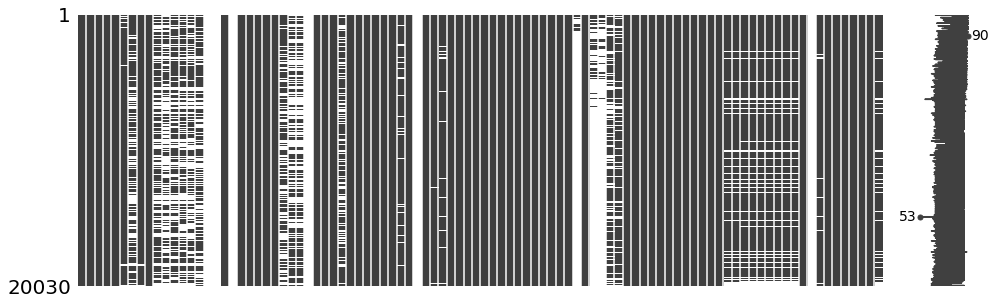

In [4]:
# listings_details.csv NaNs visualization
msno.matrix(listings_det_df, figsize=(16, 5))

<AxesSubplot:>

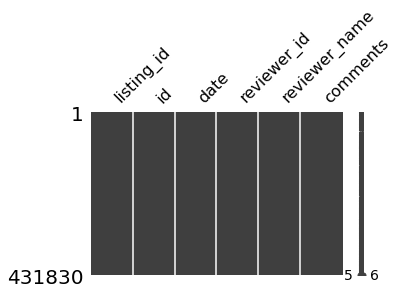

In [5]:
# reviews_details.csv NaNs visualization
msno.matrix(reviews_det_df, figsize=(5, 3))

<AxesSubplot:>

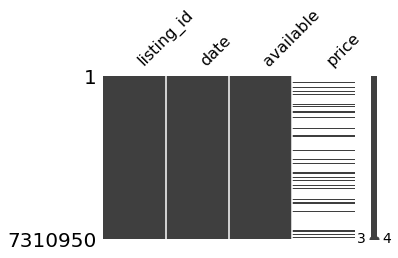

In [6]:
# calendar.csv NaNs visualization
msno.matrix(calendar_df, figsize=(5, 3))

<AxesSubplot:>

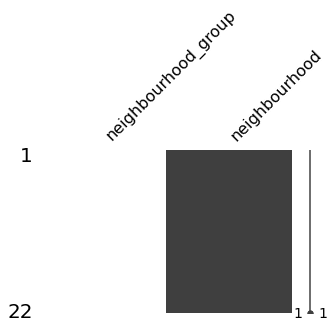

In [7]:
# neighbourhoods.csv NaNs visualization
msno.matrix(neigh_df, figsize=(5, 3))

We see that in general there are **many NaNs** (white lines indicate NaNs). In particular, **there are columns with 100% NaNs** (white columns). These, naturally, won't be of any use for the analysis. Nor will be the columns with close to 100% NaNs. Let's put the **threshold at >95% NaNs**, namely, let's delete the columns with over a 95% NaNs. This might seem like a very high threshold, however, it is better to be careful not to delete too much information at the beggining. Now, we are simply doing a basic check of the useful information that we have a priori.

In [8]:
# Deleting the non-useful attributes (>95% NaNs)
for dataset in [listings_det_df, reviews_det_df, calendar_df, neigh_df]:
    for atr in dataset.columns:
        nan_ratio = dataset[atr].isnull().sum()/len(listings_det_df)
        if (nan_ratio > 0.95):
            dataset.drop(atr, axis=1, inplace=True)

Let's count the attributes again.

In [9]:
# Counting the unique attributes after deleting the non-useful attributes
len(set(list(listings_det_df.columns) +\
        list(reviews_det_df.columns) +\
        list(calendar_df.columns) +\
        list(neigh_df)))

96

So we are left with <span style="color:red"> **4 datasets containing 96 different attributes** </span> (in total) <span style="color:red"> **that are potentially useful** </span>.

## <span style="color:navy"> 4. The goal of this analysis </span>

We haven't yet defined what's the goal of this analysis. Let's do it now that we know how much (a priori) useful data we have (see section 3).

**The goal**, which might come in the form of a variable that we want to predict, for example, **is not estipulated in the dataset's Kaggle webpage**. Therefore, we will have to look for ideas. **We would like our goal (or goals) to direct ourselves to the extraction of useful, relevant and even actionable information from the dataset**. This is why **we need to study the attributes in more detail** and see what they tell us. This is what we are going to do next. **Then, we will identify and define the goal (or goals)**.

### <span style="color:#32CAEC"> 4.1 Analysis of the attributes in more depth </span>

Next, we will **analyse each attribute**, make a very brief comment about whether it might be useful and why, and then decide if it is worth keeping it or not. All of this, **keeping in mind a possible goal**. Incidentally, we will also comment if the attribute might serve as a target. In bold are the questions that might be interesting to anwser and might eventually become a well defined goal.

The general properties taken into account for making this analaysis will be, among others, the amount of NaNs, the variance, the redundancy, if they are interesting, etc. We will also use the information available in the Kaggle dataset's webpage, in particular, the information in the section "About dataset".

### listings_details:

|     Useful/Interesting Attributes     | Comments | Non-useful/Non-interesting Attributes  | Comments |
|-------------------------------------|------------------|--------------------------------------|-----------------|
| <span style="color:green"> **id** </span> | useful to keep track of advertisement | <span style="color:red"> **scrape_id** </span> | one unique value |
| <span style="color:green"> **name** </span> | maybe study length or words that appear  | <span style="color:red"> **last_scraped** </span> | only 2 different values, not useful anyway |
| <span style="color:green"> **interaction** </span> | maybe study if it appears or not  | <span style="color:red"> **listing_url** </span> | random, not useful |
| <span style="color:green"> **host_since** </span> | **is being a veteran host good?**  | <span style="color:red"> **space** </span> | already contained in summary or description |
| <span style="color:green"> **host_about** </span> | text, but study if appears or not maybe  | <span style="color:red"> **esperiences_offered** </span> | unique value "none" |
| <span style="color:green"> **summary** </span> | text, but maybe study length or others  | <span style="color:red"> **neighbourhood_overview** </span> | interesting but is text and many NaNs|
| <span style="color:green"> **description** </span> | text, but maybe study length or others  | <span style="color:red"> **notes** </span> | text and too many NaNs |
| <span style="color:green"> **host_response_time** </span> | **does answering fast make a difference?**  | <span style="color:red"> **transit** </span> | interesting but too many NaNs and is text |
| <span style="color:green"> **host_is_superhost** </span> | **does being superhost make a difference?**  | <span style="color:red"> **house_rules** </span> | NaNs and not clear what to do with this info |
| <span style="color:green"> **host_verifications** </span> | **does having certain verifications help?**  | <span style="color:red"> **picture_url** </span> | image processing needed, maybe too complex |
| <span style="color:green"> **host_has_profile_pic** </span> | **does having a profile pic help?**  | <span style="color:red"> **host_id** </span> | random, not useful |
| <span style="color:green"> **host_identity_verified** </span> | **does having a vierified identity help?**  | <span style="color:red"> **host_url** </span> | random, not useful |
| <span style="color:green"> **neibourhood_cleansed** </span> | **clean neigbourhoods help?**  | <span style="color:red"> **host_name** </span> | random, not useful |
| <span style="color:green"> **is_location_exact** </span> | **does the location being exact help?**  | <span style="color:red"> **host_location** </span> | all very similar and not relevant |
| <span style="color:green"> **property_tipe** </span> | **what's the difference between property type?**  | <span style="color:red"> **host_response_rate** </span> | almost all of them are 100%, not useful |
| <span style="color:green"> **room_type** </span> | **what are the best room types?**  | <span style="color:red"> **host_acceptance** </span> | too many NaNs |
| <span style="color:green"> **accomodates** </span> | **does it help?**  | <span style="color:red"> **host_thumbnail_url** </span> | random, hard to analyse |
| <span style="color:green"> **bathrooms** </span> | **many bathrooms better?**  | <span style="color:red"> **host_picture_url** </span> | would need image processing, too complex |
| <span style="color:green"> **bedrooms** </span> | **many bedrooms better?**  | <span style="color:red"> **host_listings_count** </span> | not interesting in principle |
| <span style="color:green"> **beds** </span> | **many beds better?**  | <span style="color:red"> **host_total_listings_count** </span> | the same info as host_listings_count? |
| <span style="color:green"> **amenities** </span> | -  | <span style="color:red"> **street** </span> | too specific |
| <span style="color:green"> **square_feet** </span> | **bigger house better?**  | <span style="color:red"> **neighbourhood** </span> | we already have neighbourhood_cleansed |
| <span style="color:green"> **price** </span> | **target?** / **how much of a difference if expensive?**  | <span style="color:red"> **city** </span> | it's always Amsterdam (ofc) |
| <span style="color:green"> **security_desposit** </span> | maybe not that interesting but could make a difference  | <span style="color:red"> **state** </span> | it's always the same |
| <span style="color:green"> **cleaning_fee** </span> | could make a difference  | <span style="color:red"> **zipcode** </span> | info similar to neighbourhood |
| <span style="color:green"> **guests_included** </span> | could be important  | <span style="color:red"> **market** </span> | always "Amsterdam" |
| <span style="color:green"> **extra_people** </span> | could make a difference | <span style="color:red"> **smart_location** </span> | 98% the same |
| <span style="color:green"> **minimum_nights** </span> | **higher minimum nights better?**  | <span style="color:red"> **country_code** </span> | Always the Netherlands, naturally |
| <span style="color:green"> **maximum_nights** </span> | **higher maximum nights better?**  | <span style="color:red"> **country** </span> | always the same |
| <span style="color:green"> **calenadar_upated** </span> | maybe not that interesting but could make a difference  | <span style="color:red"> **latitude** </span> | too specific |
| <span style="color:green"> **has_availability** </span> | **target?** | <span style="color:red"> **longitud** </span> | too specific |
| <span style="color:green"> **availability_30** </span> | **target?** | <span style="color:red"> **bed_type** </span> | 99% the same |
| <span style="color:green"> **availability_60** </span> | **target?** | <span style="color:red"> **weekly_price** </span> | too many NaNs, hard to analyse |
| <span style="color:green"> **availability_90** </span> | **target?** | <span style="color:red"> **monthly_price** </span> | too many NaNs, hard to analyse |
| <span style="color:green"> **availability_365** </span> | **target?**  | <span style="color:red"> **calenadar_last_scraped** </span> | not useful |
| <span style="color:green"> **number_of_reviews** </span> | **target?**  | <span style="color:red"> **jurisdiction names** </span> | only two values, not interesting |
| <span style="color:green"> **first_review** </span> | might be interesting, what's the effect on the customer?  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **last_review** </span> | similar to first_review  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_scores_rating** </span> | very interesting, **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_accuracy** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_cleanliness** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_checkin** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_communication** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_location** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **review_score_value** </span> | **target?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **requieres_license** </span> | maybe not that interesting but useful?  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **instant_bookable** </span> | **does it make a difference to be instantly bookable?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **is_business_travel_ready** </span> | **-**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **cancellation_policy** </span> | maybe study them separately | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **requiere_guest_profile_picture** </span> | **does it make a differene?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **requiere_guest_phone_verification** </span> | **does it make a difference?**  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **calculated_host_listings_count** </span> | weird but could help predict  | <span style="color:red"> **-** </span> | - |
| <span style="color:green"> **reviews_per_month** </span> | could serve as predictor and predictee  | <span style="color:red"> **-** </span> | - |

### calendar:

|     Useful/Interesting Attributes     | Comments | Non-useful/Non-interesting Attributes  | Comments |
|-------------------------------------|------------------|--------------------------------------|-----------------|
| <span style="color:green"> **-** </span> | - | <span style="color:red"> **available** </span> | Although more specific, largely redundant if compared with the information available in the file listings_details. |
| <span style="color:green"> **-** </span> | - | <span style="color:red"> **date** </span> | In a similar fashion as the attribute available, we might have more specific info but is mainly redundant. |
| <span style="color:green"> **-** </span> | - | <span style="color:red"> **price** </span> | If we don't have the two previous attributes, this one is not useful either. |
| <span style="color:green"> **-** </span> | - | <span style="color:red"> **listing_id** </span> | Same as the attribute price. It is no longer useful if we don't have the rest of the attributes |

### reviews_details:

|     Useful/Interesting Attributes     | Comments | Non-useful/Non-interesting Attributes  | Comments |
|-------------------------------------|------------------|--------------------------------------|-----------------|
| <span style="color:green"> **listing_id** </span> | Necessary to keep track of the advertisement | <span style="color:red"> **id** </span> | Not necessary, we don't care about particular reviews |
| <span style="color:green"> **date** </span> | Might be useful to define a new attribute "recent reviews" | <span style="color:red"> **reviewer_id** </span> | Not important nor useful |
| <span style="color:green"> **comments** </span> | Might be useful to define a new attribute "nice words per review" | <span style="color:red"> **reviewer_name** </span> | Not interesting nor useful |

### neighbourhoods:

|     Useful/Interesting Attributes     | Comments | Non-useful/Non-interesting Attributes  | Comments |
|-------------------------------------|------------------|--------------------------------------|-----------------|
| <span style="color:green"> **-** </span> | - | <span style="color:red"> **neighbourhood** </span> | We already have the neighbourhood of each advertisement in the listing_details file |

This analysis has major consequences: we will delete two files altogether, so we are **left with 2 files**: one of them is the main file, and the other one will be useful to define new attributes (feature engineering) that we will add to the first file. As per the number of attributes, we have deleted many of them, and now we are **left with 52 attributes**.

### <span style="color:#32CAEC"> 4.2. Definition of the goal </span>

With what we have seen about the attributes in mind, it's high time to define the goal. We will do it based on **first principles**, this is, based on fundamental, axiomatic-like ideas.

In keeping with this mode of working, we have to anwser the following questions: **who** might the information extracted be useful for, and **why** might the information extracted be relevant for these people or groups of people.

After some thought, we can come up with the following **goals** in the form of **questions**, summarized in the following scheme:

<img src="images/questions.png" alt="drawing" width="700"/>

### <span style="color:#32CAEC"> 4.3 Deleting the information that won't be useful for the goal </span>

We can delete the attributes that we have seen will not be useful for our purposes.

In [10]:
# listing_details dataset
bad_atr = ['scrape_id', 'last_scraped', 'listing_url', 'space', 'experiences_offered', 'notes', 
           'transit', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
           'host_location', 'host_response_rate', 'host_thumbnail_url', 'neighborhood_overview',
           'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'street',
           'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location',
           'country_code', 'country', 'latitude', 'longitude','bed_type', 'weekly_price',
           'monthly_price', 'calendar_last_scraped', 'jurisdiction_names']
for atr in bad_atr:
    listings_det_df.drop(atr, axis=1, inplace=True)

In [11]:
# reviews_details dataset
bad_atr = ['id', 'reviewer_id', 'reviewer_name']
for atr in bad_atr:
    reviews_det_df.drop(atr, axis=1, inplace=True)

The data is now much cleaner and we are ready to move on to the **next stage** of this analysis.

Next, we will answer the questions proposed earlier, one by one, using ML models or more simple data analysis techniques, when appropiate.

The questions are ordered by complexity, but this is an a priori ordering, so it might turn out that the simplest questions are the hardest.

## <span style="color:navy"> 5. Information relevant to the guests </span>

It is safe to assume that the guests might be interested in which the best neighbourhood is to stay in (or at least what good neighbourhoods are), and also what is a good option to stay in but without spending too much money. We will try to extract information relevant to these interests through the anwsers of the following questions.

### <span style="color:#32CAEC"> 5.1 What is the best neighbourhood? </span>

What makes a good neighbourhood? We don't have that much information about the neighbourhoods themselves, but we can infer how good they are based on inderect metrics.

The most prominent attribute we have to take into account for this task is `review_score_location`. This is essentially what people think about the sourroundings of their homestay, so it is sensible to take this into account. We will thus focus on studying this attribute, but we can also check other ones potentially interesting to anwser this question. These other attributes will be `review_score_rating`, which is the overall score of the homestay (we assume better homestays indirectly measure how good the neighbourhood they are in is), and `host_since`. This last attribute might be interesting for those guests interested in reliability, since we assume that older hosts are more reliable, and thus, it might be interesting to see which neighbourhoods contain the oldest hosts. We could add more attributes to this analysis, but we can't be sure they correctly reflect how good a neighbourhood is, and so it is better not to add them, since we don't want to obtain flawed results.

We will start with the most important one, `review_score_location`.

Sophisticated machine learning won't be necessary for this task. We will simply group the observations by neighbourhood, and calculate the mean of the `review_score_location`. Then we will sort by (averaged) score.

In [12]:
# Selecting the attribute we want, grouping by neighbourhood and then taking the mean
df_aux = listings_det_df[['neighbourhood_cleansed','review_scores_location']].groupby(['neighbourhood_cleansed']).mean()
# Sorting by review scores location mean
df_aux = df_aux.sort_values(by=['review_scores_location'], ascending=False)

Here are the **neighbourhoods ordered by (average) location score**: 

In [13]:
df_aux

review_scores_location
neighbourhood_cleansed                                        
Centrum-West                                          9.897087
Centrum-Oost                                          9.753516
De Pijp - Rivierenbuurt                               9.620224
De Baarsjes - Oud-West                                9.476452
Zuid                                                  9.470199
Westerpark                                            9.396513
Oud-Oost                                              9.323993
IJburg - Zeeburgereiland                              9.205882
Oostelijk Havengebied - Indische Buurt                9.184397
Watergraafsmeer                                       9.164474
Oud-Noord                                             9.074000
Noord-Oost                                            9.018868
Bos en Lommer                                         9.010989
De Aker - Nieuw Sloten                                8.945946
Slotervaart                                           8.934718
Noord-West                                            8.926740
Buitenveldert - Zuidas                                8.865000
Geuzenveld - Slotermeer                               8.739884
Gaasperdam - Driemond                                 8.724771
Bijlmer-Centrum                                       8.693182
Osdorp                                                8.585714
Bijlmer-Oost                                          8.451220

In a more visual manner, we can **plot the results** in a bar plot, showing the points avobe 8 so we can see the differences between the scores better.

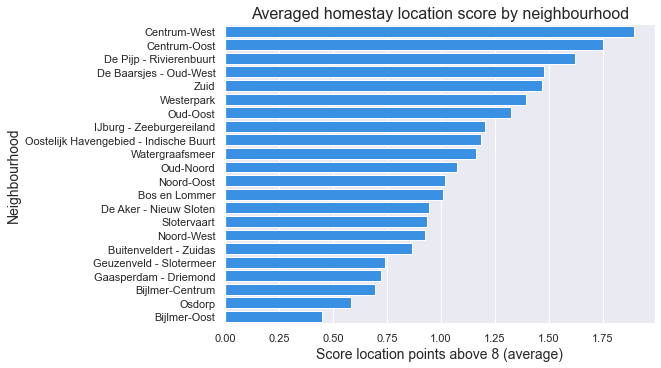

In [14]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(data=df_aux, x=df_aux['review_scores_location']-8, y=df_aux.index, color='dodgerblue')
# Plot title
ax.set_title("Averaged homestay location score by neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Score location points above 8 (average)', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

Interestingly, **the neighbourhoods corresponding to the center of the city are those with the best average location score**. These are followed by other neighbourhoods that might be a good choice for the guests if they want to be in a good location but not in the center.

Now, we can do a similar analysis with the variable `review_scores_rating`.

In [15]:
# Selecting the attribute we want, grouping by neighbourhood and then taking the mean
df_aux_2 = listings_det_df[['neighbourhood_cleansed','review_scores_rating']].groupby(['neighbourhood_cleansed']).mean()
# Sorting by review scores rating mean
df_aux_2 = df_aux_2.sort_values(by=['review_scores_rating'], ascending=False)

Here are the **neighbourhoods ordered by (average) rating score**: 

In [16]:
df_aux_2

review_scores_rating
neighbourhood_cleansed                                      
De Aker - Nieuw Sloten                             95.747748
IJburg - Zeeburgereiland                           95.618667
Zuid                                               95.506612
Bos en Lommer                                      95.323353
De Baarsjes - Oud-West                             95.289075
Oud-Oost                                           95.214161
Slotervaart                                        95.071217
Westerpark                                         95.065102
Noord-West                                         95.040146
Watergraafsmeer                                    94.927632
De Pijp - Rivierenbuurt                            94.904141
Oostelijk Havengebied - Indische Buurt             94.706021
Centrum-Oost                                       94.616879
Centrum-West                                       94.240175
Noord-Oost                                         94.037736
Oud-Noord                                          93.830339
Gaasperdam - Driemond                              93.581818
Geuzenveld - Slotermeer                            93.520231
Bijlmer-Centrum                                    92.898876
Bijlmer-Oost                                       92.743902
Buitenveldert - Zuidas                             92.636816
Osdorp                                             91.735714

Let's visualize the data, this time showing the score points above 90.

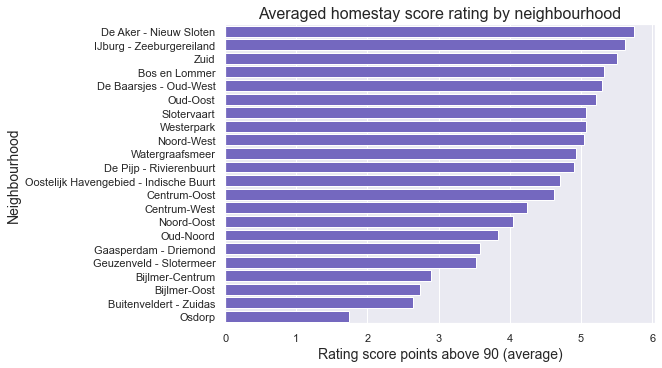

In [17]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(data=df_aux_2, x=df_aux_2['review_scores_rating']-90, y=df_aux_2.index, color='slateblue')
# Plot title
ax.set_title("Averaged homestay score rating by neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Rating score points above 90 (average)', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

This time, the central neighbourhoods no longer appear as the top ones. However, we should keep in mind that this way of quantifying how good a neighbourhood is, is less accurate than the previous one, so **it should be seen as complementary**.

Let's now analyse the attribute `host_since`.

This attribute is a string containing a date.

In [18]:
# Example of one date from "host_since" attribute
listings_det_df['host_since'][0]

'2008-09-24'

In order to extract information from it, we will do some **feature engineering** and convert it to days (number of days). In particular, we will calculate the difference between the day the data was taken in, and the "host_since" date.

In [19]:
# Feature engineering: new attribute counting the difference (in days) between now and host since date
# First, we convert the string containing the date to pandas date format
listings_det_df['days_host_since'] = pd.to_datetime(listings_det_df['host_since'], format='%Y-%m-%d')
# Then we can directly calculate the difference in days
listings_det_df['days_host_since'] = (pd.to_datetime('2018-12-06', format='%Y-%m-%d') - listings_det_df['days_host_since'])/ np.timedelta64(1, 'D')

Here are the first 5 entries of this new attribute:

In [20]:
listings_det_df['days_host_since'][0:5]

0    3725.0
1    3695.0
2    3291.0
3    3303.0
4    3180.0
Name: days_host_since, dtype: float64

Now we can group by neighbourhood and calculate the mean just like we did with the previous two attributes.

In [21]:
# Selecting the attribute we want, grouping by neighbourhood and then taking the mean
df_aux_3 = listings_det_df[['neighbourhood_cleansed','days_host_since']].groupby(['neighbourhood_cleansed']).mean()
# Sorting by review scores rating mean
df_aux_3 = df_aux_3.sort_values(by=['days_host_since'], ascending=False)

In [22]:
df_aux_3

days_host_since
neighbourhood_cleansed                                 
De Baarsjes - Oud-West                      1510.256330
Westerpark                                  1506.556376
Oud-Oost                                    1482.297192
Bos en Lommer                               1474.064685
Oostelijk Havengebied - Indische Buurt      1461.099062
Zuid                                        1450.192228
De Pijp - Rivierenbuurt                     1450.015644
Slotervaart                                 1444.096692
Centrum-West                                1403.845228
Centrum-Oost                                1403.111625
Watergraafsmeer                             1396.117754
Oud-Noord                                   1368.952715
Noord-Oost                                  1333.855469
Noord-West                                  1332.400000
IJburg - Zeeburgereiland                    1298.121681
Buitenveldert - Zuidas                      1264.950382
Geuzenveld - Slotermeer                     1188.754717
De Aker - Nieuw Sloten                      1159.091549
Gaasperdam - Driemond                       1133.942623
Osdorp                                      1101.841772
Bijlmer-Centrum                             1101.324324
Bijlmer-Oost                                1072.802083

And, if we visualize the data:

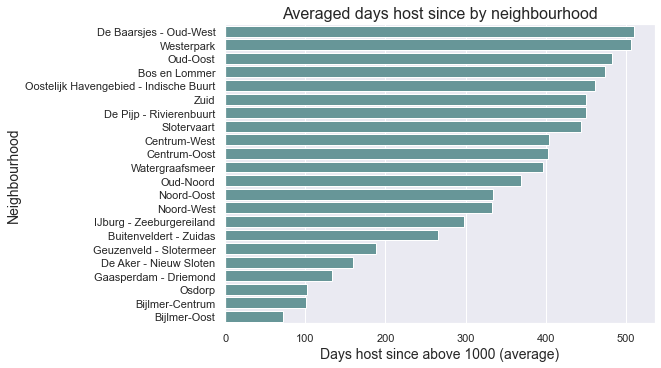

In [23]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(data=df_aux_3, x=df_aux_3['days_host_since']-1000, y=df_aux_3.index, color='cadetblue')
# Plot title
ax.set_title("Averaged days host since by neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Days host since above 1000 (average)', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

We see that, in average, we have, in one extreme hosts that have 1510 days of experience (4.1 years), and hosts that have 1072 days of experience (2.9 years). So, if you assume veteran hosts are more reliable, maybe you should consider visiting the neighbourhood De Baarsjes - Oud West.

If we wish to take into account the three previous attributes simultaneously, we can define a basic custom metric. Let's call it $\Phi$. After standarizing the values, the metric might look like the following: $\Phi_i=A_1 X_i + A_2 Y_i + A_3 Z_i$, where $A_1$, $A_2$, $A_3$ are the coefficients (weights), and $X_i$, $Y_i$, $Z_i$ are the values for each neighbourhood (standarized). Since the first attribute is much more important, we will give it much more weight. The metric we will use looks like this:

$$\Phi_i = 6X_i + 2Y_i + Z_i$$

Let's generate these values for each neighbourhood.

In [24]:
# Standarization of the attributes
df_aux_std = df_aux/df_aux['review_scores_location'][0]
df_aux_2_std = df_aux_2/df_aux_2['review_scores_rating'][0]
df_aux_3_std = df_aux_3/df_aux_3['days_host_since'][0]

In [25]:
# For example, we show the first one once its standarized
df_aux_std[0:3]

review_scores_location
neighbourhood_cleansed                         
Centrum-West                           1.000000
Centrum-Oost                           0.985494
De Pijp - Rivierenbuurt                0.972026

In [26]:
# Define a new data frame and calculate the Phi metric given its definition
df_phi = df_aux
df_phi['review_scores_location'] = 6*df_aux_std['review_scores_location'] + 2*df_aux_2_std['review_scores_rating'] + df_aux_3_std['days_host_since']
df_phi.rename(columns = {'review_scores_location':'Phi'}, inplace = True)

In [27]:
# Sort the values
df_phi = df_phi.sort_values(by=['Phi'], ascending=False)

Here are the neighbourhoods and their associated $\Phi$ metric.

In [28]:
df_phi

Phi
neighbourhood_cleansed                          
Centrum-West                            8.898051
Centrum-Oost                            8.818395
De Pijp - Rivierenbuurt                 8.774645
De Baarsjes - Oud-West                  8.735413
Zuid                                    8.696396
Westerpark                              8.679823
Oud-Oost                                8.622909
Oostelijk Havengebied - Indische Buurt  8.513631
Watergraafsmeer                         8.463155
IJburg - Zeeburgereiland                8.437806
Bos en Lommer                           8.429984
Oud-Noord                               8.367398
Slotervaart                             8.358636
Noord-Oost                              8.315068
Noord-West                              8.279191
De Aker - Nieuw Sloten                  8.190861
Buitenveldert - Zuidas                  8.146900
Geuzenveld - Slotermeer                 8.039051
Gaasperdam - Driemond                   7.994881
Bijlmer-Centrum                         7.939868
Osdorp                                  7.850763
Bijlmer-Oost                            7.771058

Let's visualize this data, too, just like we did previously:

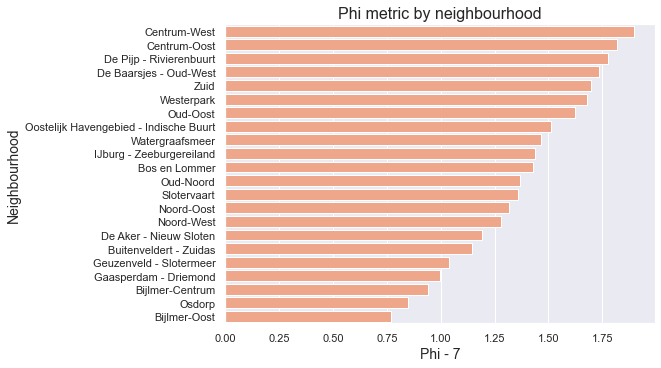

In [29]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(data=df_phi, x=df_phi['Phi']-7, y=df_phi.index, color='lightsalmon')
# Plot title
ax.set_title("Phi metric by neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Phi - 7', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

So, if someone agrees with the weights given to $\Phi$, their ideal neighbourhood choice would be Centrum-West. Of course, these weights can be adjusted to the interests of the guest.

Here is a picture of the Amsterdam Centrum: *soruce: https://en.wikipedia.org/wiki/Amsterdam-Centrum*

<img src="images/amsterdamcentrum.jpg" alt="drawing" width="450"/>

### <span style="color:#32CAEC"> 5.2 What are the best places based on money/rating ratio? </span>

Another piece of information that would certainly be useful for guests is **what the best options are based on ratings that, at the same time, are not expensive**. This is what we will do next. Again, this won't need sophisicated ML, but the information is interesting nonetheless.

It is relatively simple to calculate this. We only need two pieces of information, this is, two attributes: the **price per night** and the **rating** for that advertisement.

The rating is a nice float:

In [30]:
# A sample of some rating
print(listings_det_df['review_scores_rating'][0])
# It's data type
print(type(listings_det_df['review_scores_rating'][0]))

97.0
<class 'numpy.float64'>


But the price is a string with a dollar sing in front. We need a number (int, float, etc.) in order to compute the ratio, so we will change its data type first.

In [31]:
# A sample of some price
print(listings_det_df['price'][0])
# It's data type
print(type(listings_det_df['price'][0]))

$59.00
<class 'str'>


Below is a function that converts string prices to numbers.

In [32]:
# Converts a price from the column prices in listings_det_df to floats
def price_to_num(price):
    price = price[1:]
    if (len(price) < 8):
        return float(price)
    # We take into account the thousands comma
    else:
        price = price[:-7] + price[-6:]
        return float(price)

Then we apply this function to every row in the column prices.

In [33]:
listings_det_df['price'] = listings_det_df['price'].apply(price_to_num)

Here are the first 5 values of the column modified.

In [34]:
listings_det_df['price'][0:5]

0     59.0
1    160.0
2     80.0
3    125.0
4    150.0
Name: price, dtype: float64

As per the calculation of the ratio, the numerator will correspond to the rating, and the denominator to the price. This way, the higher the ratio the better the option, since a higher rating is better, which will make the ratio increase, and a lower price is better, which will also make the ratio increase. Mathematically:

$$R = \frac{Rating}{Price}$$

Before calculating the ratio, however, we can get more insight into these variables, and check for unsual values, like negative or zero prices.

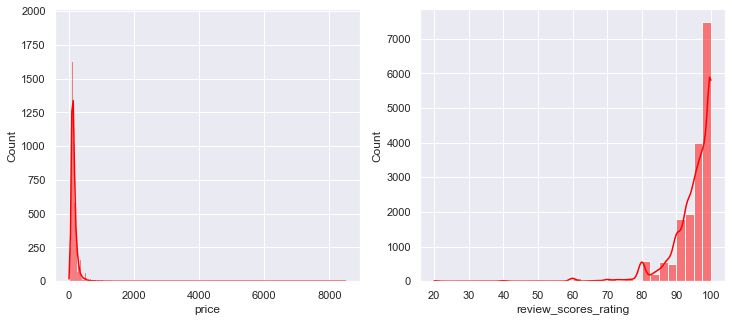

In [35]:
# Histograms for price and ratings
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=listings_det_df, x="price", kde=True, color="red", binwidth=10, ax=axs[0])
sns.histplot(data=listings_det_df, x="review_scores_rating", kde=True, color="red", binwidth=2.5, ax=axs[1])
plt.show()

In [36]:
# General statistical info
listings_det_df['review_scores_rating'].describe()

count    17391.000000
mean        94.849520
std          6.648685
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [37]:
# General statistical info
listings_det_df['price'].describe()

count    20030.000000
mean       152.181178
std        145.828976
min          0.000000
25%         96.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64

We see that there are prices that are 0, so we remove them.

In [38]:
# Seeing how many rows there are with price == 0
listings_det_df[listings_det_df.price == 0].shape[0]

2

In [39]:
# Removing rows with price == 0
listings_det_df = listings_det_df[listings_det_df.price != 0]

In [40]:
# Seeing again how many rows there are with price == 0
listings_det_df[listings_det_df.price == 0].shape[0]

0

In [41]:
# Check general statistical info again 
listings_det_df['price'].describe()

count    20028.000000
mean       152.196375
std        145.828327
min          8.000000
25%         96.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64

Now, we can finally compute the ratio. Notice that this will serve as **feature engineering** for further analysis of the dataset.

In [42]:
listings_det_df['ratioRP'] = listings_det_df['review_scores_rating']/listings_det_df['price']

Let's take a look at its basic statistics using `describe()`

In [43]:
listings_det_df['ratioRP'].describe()

count    17389.000000
mean         0.813243
std          0.404062
min          0.009000
25%          0.548571
50%          0.756303
75%          1.000000
max         12.250000
Name: ratioRP, dtype: float64

And here are the **top 10 entries ordered by ratio rating/price**. We only show its name, id, price and rating.

In [44]:
listings_det_df[listings_det_df['ratioRP']>3.7][['name', 'id', 'price', 'review_scores_rating','ratioRP']].sort_values(by=['ratioRP'], ascending=False)

name        id  price  \
13879  Very central 120m2 apartment with big roof ter...  20644162    8.0   
2535    Appartementje in het veelzijdige Amsterdam-Noord   4009850   12.0   
6635                               Minimalist White Room  11147683   19.0   
9418                               Cheap Cosy Place West  14659123   25.0   
11614                   Small room close to Amsterdam CS  18100432   24.0   
10970            Small Room Z close to Amsterdam Station  17093014   23.0   
9234           Spacious Modren Room for One In Amsterdam  14368264   26.0   
17168                          Shared Room .Bed is yours  25863400   26.0   
15118         Private room in a rooftop design apartment  22159480   25.0   
4537                    Cozy room, 10min from the Center   7447719   27.0   

       review_scores_rating    ratioRP  
13879                  98.0  12.250000  
2535                   98.0   8.166667  
6635                   90.0   4.736842  
9418                  100.0   4.000000  
11614                  94.0   3.916667  
10970                  90.0   3.913043  
9234                  100.0   3.846154  
17168                 100.0   3.846154  
15118                  96.0   3.840000  
4537                  100.0   3.703704

We can take a brief look at the distribution of ratioRP, too.

<AxesSubplot:xlabel='ratioRP', ylabel='Count'>

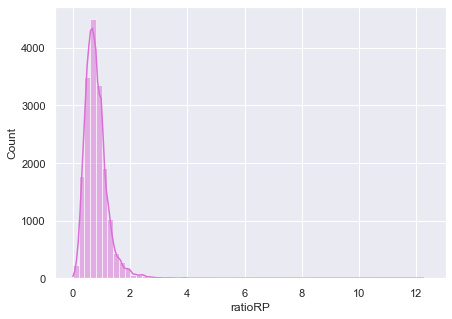

In [45]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=listings_det_df, x="ratioRP", kde=True, color="orchid", binwidth=0.2)

As we can see, the very first one has an extraordinary ratio of 12.25, but its price is very suspcious, which is only of $8 per night. For this reason, **we would also like to take into account**, for example, **the number of reviews**, which would give us some more confidence of this being true.

For example, if we add the number of reviews to the previous table, we see the following.

In [46]:
listings_det_df[listings_det_df['ratioRP']>3.7][['name','id','price', 'review_scores_rating','ratioRP','number_of_reviews']].sort_values(by=['ratioRP'], ascending=False)

name        id  price  \
13879  Very central 120m2 apartment with big roof ter...  20644162    8.0   
2535    Appartementje in het veelzijdige Amsterdam-Noord   4009850   12.0   
6635                               Minimalist White Room  11147683   19.0   
9418                               Cheap Cosy Place West  14659123   25.0   
11614                   Small room close to Amsterdam CS  18100432   24.0   
10970            Small Room Z close to Amsterdam Station  17093014   23.0   
9234           Spacious Modren Room for One In Amsterdam  14368264   26.0   
17168                          Shared Room .Bed is yours  25863400   26.0   
15118         Private room in a rooftop design apartment  22159480   25.0   
4537                    Cozy room, 10min from the Center   7447719   27.0   

       review_scores_rating    ratioRP  number_of_reviews  
13879                  98.0  12.250000                 20  
2535                   98.0   8.166667                  9  
6635                   90.0   4.736842                  4  
9418                  100.0   4.000000                  4  
11614                  94.0   3.916667                 62  
10970                  90.0   3.913043                 52  
9234                  100.0   3.846154                  1  
17168                 100.0   3.846154                  2  
15118                  96.0   3.840000                 10  
4537                  100.0   3.703704                  1

It is now not so appealing to see that many of these apparently nice homestays have only been reviewed less than 5 times.

Let's calculate a more sophisticated ratio now, let's call it $\rho$ (rho), that takes into account the number of reviews as well:

$$\rho = \frac{Num.Reviews \cdot Rating}{Money}$$

Before, however, let's check for unusual values for the `number_of_reviews` attribute.

In [47]:
# First 5 values for the attribute number_of_reviews
listings_det_df['number_of_reviews'][0:5]

0    248
1     42
2    233
3      1
4    171
Name: number_of_reviews, dtype: int64

In [48]:
# Basic statistical information about the attribute number_of_reviews
listings_det_df['number_of_reviews'].describe()

count    20028.000000
mean        21.562113
std         43.242124
min          0.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        695.000000
Name: number_of_reviews, dtype: float64

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

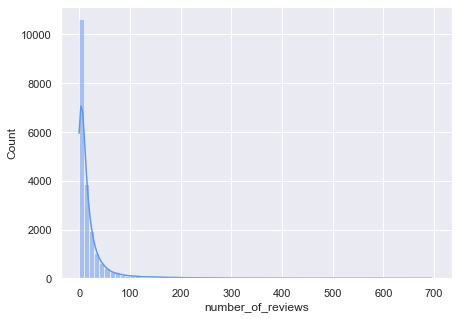

In [49]:
# Histogram of number_of_reviews
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=listings_det_df, x="number_of_reviews", kde=True, color="cornflowerblue", binwidth=10)

The value of the attribute `number_of_reviews` look okay. So now **we can compute the ratio $\rho$**.

In [50]:
listings_det_df['ratioNRP'] = listings_det_df['ratioRP']*listings_det_df['number_of_reviews']

Let's look at some of its entries and its basic statistical information.

In [51]:
# Here are the five 5 entries (non ordered)
listings_det_df['ratioNRP'][0:5]

0    407.728814
1     25.200000
2    253.387500
3      0.800000
4    112.860000
Name: ratioNRP, dtype: float64

In [52]:
# Basic statistical information
listings_det_df['ratioNRP'].describe()

count    17389.000000
mean        22.667141
std         52.889034
min          0.026667
25%          3.040000
50%          7.594937
75%         18.571429
max        832.866667
Name: ratioNRP, dtype: float64

Here are the **top 10 entries of the new ratio $\rho$**, showing the name, id, price, rating and number of review for each of them.

In [53]:
listings_det_df[listings_det_df['ratioNRP']>655][['name','id', 'price', 'review_scores_rating', 'number_of_reviews', 'ratioNRP']].sort_values(by=['ratioNRP'], ascending=False)

name       id  price  \
55               Single attic room for one person only    83498   45.0   
2219                Cosy Amstel guesthouse with garden  3508800   49.0   
2391                  Little room close to City Centre  3786000   35.0   
917                         B&B in de Amsterdamse Pijp  1247334   65.0   
211                 Room in Jordaan Heart of Amsterdam   396125   70.0   
2771  Room + own shower and toilet, breakfast included  4449764   69.0   
7                              Comfortable single room    29051   55.0   
4423                      Clean, Quiet, Lovers Retreat  7276869   59.0   
1086                 Private room on the Keizersgracht  1469096   90.0   
332                       Cats'n'Rooms, Amsterdam West   582280   32.0   

      review_scores_rating  number_of_reviews    ratioNRP  
55                    93.0                403  832.866667  
2219                  96.0                398  779.755102  
2391                  93.0                285  757.285714  
917                   94.0                492  711.507692  
211                   97.0                503  697.014286  
2771                  98.0                467  663.275362  
7                     95.0                383  661.545455  
4423                  97.0                402  660.915254  
1086                  94.0                631  659.044444  
332                   87.0                241  655.218750

And here is it's histogram.

<AxesSubplot:xlabel='ratioNRP', ylabel='Count'>

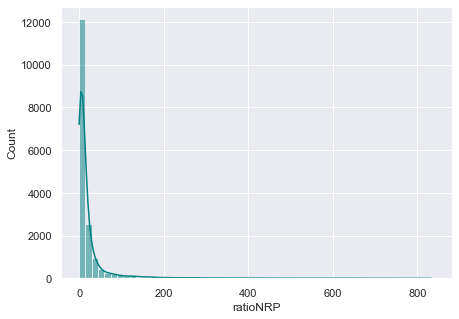

In [54]:
# Histogram of the ratio rho
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=listings_det_df, x="ratioNRP", kde=True, color="teal", binwidth=15)

Taking a look at the top 10 entries, we still see relatively low prices, and relatively high ratings, but these entries have a much larger number of reviews, which, for a guest, is probably important, as it feels more reliable.

### <span style="color:#32CAEC"> 5.3 Suggestions and recommendations for the guests </span>

Summarizing the insights from anwsering the questions for this section, we can come up with suggestions and recommendations for the guests interested in staying in amsterdam.

- **Good locations**: Based on location ratings of the homestay given by the users, the three best neighbourhoods are Centrum-West (average 9.90), Cnetrum-Oost (average 9.75) and De Pijp - Rivierenbuurt (9.62). The interested guest can find the complete list above.


- **Bad locations**: Similarly, based on location ratings of the homestay given by the users, the three worst neighbourhoods are Bijlmer-Oost (8.45), Osdorop (average 8.59), Bijlmer-Centrum (average 8.69). Just like before, the interested guest can find the complete list above.


- **Mixed metric**: The results above coincide with a custom, mixed metric that not only takes into account the location ratings, but also the overall rating and how veteran the host is. The interested guest might adjust the parameters of the metric in order to match their interests and, thus, change the results.


- **Ratio Rating/Money**: Based on the Rating/Money ratio, we can sort the homestays and identify several optimal options. The best three are "Very central 120m2 apartment..." (ID: 20644162), "Appartementje in het veelzijdige..." (ID:4009850) and "Minimalist White Room" (ID: 11147683). However someone might want, at the same time, filter these results by price, rating (or any other attribute), to obtain more personalized results.


- **Ratio Reviews\*Rating/Money**: Another, slightly more sophisticated ratio can be computed, namely one that also takes into account the number of reviews. With this ratio, we can also sort the homestays, and obtain good results that also have many reviews. This might be interesting for those guests interested in reliability. The best three are "Single attic room..." (ID: 83498), "Cosy Amstel guesthouse..." (ID: 3508800) and "Little room close to the city centre" (ID: 3786000). The interested guest can check the complete list above.


- **Average price**: The average price for a homestay in Amsterdam is about \$152. This can be useful to take into account in order to make comparisons between prices.

## <span style="color:navy"> 6. Information relevant to Airbnb </span>

Airbnb is a company, and companies seek growth. When we speak about growth regarding a company, it usually means economic growth, namely, money. In this section, this is what we will tackle: how Airbnb can grow; how Airbnb can get more money.

According to the source cited below, "Airbnb makes money by charging both hosts and guests for using its platform (...). Airbnb charges guests as a percentage of the value of the booking (...), around 14% of the booking subtotal. Most Hosts pay a flat service fee of 3%."
*Source: https://thestrategystory.com/2022/03/29/how-does-airbnb-make-money-business-model/#:~:text=Airbnb%20makes%20money%20by%20charging,the%20value%20of%20the%20booking.*

So the goal is clear: **promote new experiences (homestays) that are successful**, simply because Airbnb's earnings are very much proportional to the number of people that book a homestay.

### <span style="color:#32CAEC"> 6.1 Where should Airbnb promote new apartments? </span>

Let's imagine Airbnb wanted to make an **advertisement campaign and had to choose between the different neighbourhoods** of Amsterdam. Where should it be? This is the question that we'll try to anwser in this section.

The general strategy to answer this question will be to check the **averaged availability per neighbourhood**. If there is low availabilty, that potentially means many people is trying to book a experience there, so promoting new apartments in that neighbourhood will probably result in more people using Airbnb (rather than, let's say, promoting new apartments in a random neighbourhood).

Before doing the calculations, we'll do some exploratory data analysis and maybe define some useful variables.

Let's check how many different neighbourhoods there are.

In [55]:
len(listings_det_df['neighbourhood_cleansed'].unique())

22

And let's see how many advertisements (listings) there are per neighbourhood.

In [56]:
neigh_df = listings_det_df.pivot_table(columns=['neighbourhood_cleansed'], aggfunc='size').sort_values(ascending=False)
neigh_df

neighbourhood_cleansed
De Baarsjes - Oud-West                    3515
De Pijp - Rivierenbuurt                   2493
Centrum-West                              2326
Centrum-Oost                              1730
Westerpark                                1490
Zuid                                      1440
Oud-Oost                                  1282
Bos en Lommer                             1144
Oostelijk Havengebied - Indische Buurt     959
Oud-Noord                                  571
Watergraafsmeer                            552
IJburg - Zeeburgereiland                   452
Slotervaart                                393
Noord-West                                 320
Buitenveldert - Zuidas                     262
Noord-Oost                                 257
Geuzenveld - Slotermeer                    212
Osdorp                                     159
De Aker - Nieuw Sloten                     142
Gaasperdam - Driemond                      122
Bijlmer-Centrum                      

Visually, we have the following.

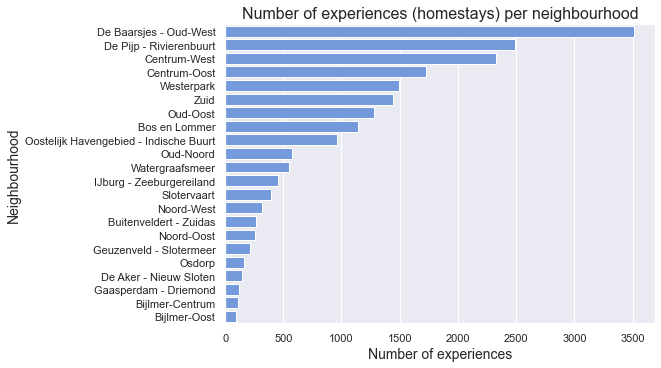

In [57]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=list(neigh_df.values), y=list(neigh_df.index), color='cornflowerblue')
# Plot title
ax.set_title("Number of experiences (homestays) per neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Number of experiences', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

We see that the amount of advertisements (experiences) per neighbourhood is not homogeneously distributed. **Some neighbourhoods have 10 to 30 times more experiences than others**. We can highlight **De Baarsjes - Oud-West to be the neuighbourhood that hosts the most experiences**, and, on the other hand **Bijlmer-Oost the neighbourhood that hosts the less experiencess**.

As per the availability, we can use, for example, `availability_90`, which is the attribute that counts the days a certain experience is available from the day the data was taken in, to 90 days ahead. Let's see some basic statistical information about it.

In [58]:
listings_det_df['availability_90'].describe()

count    20028.000000
mean        18.167865
std         27.705922
min          0.000000
25%          0.000000
50%          0.000000
75%         28.000000
max         90.000000
Name: availability_90, dtype: float64

We can check how the data is distributed too.

<AxesSubplot:xlabel='availability_90', ylabel='Count'>

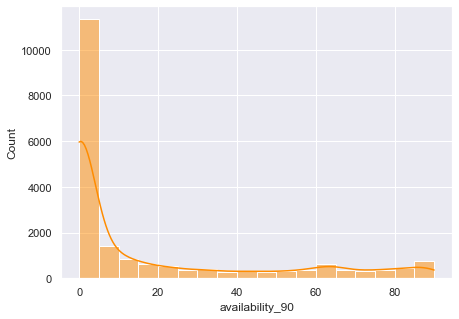

In [59]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=listings_det_df, x="availability_90", kde=True, color="darkorange", binwidth=5)

Perhaps surprisingly, we see that **many experiences are not available in a 90 days window**.

Now, we can calculate the average availability per neighbourhood, and determine which is the neighbourhood with less availability.

In [60]:
av90_df = listings_det_df[['neighbourhood_cleansed','availability_90']].groupby(['neighbourhood_cleansed']).mean().sort_values(by=['availability_90'], ascending=False)
av90_df

availability_90
neighbourhood_cleansed                                 
Gaasperdam - Driemond                         34.811475
Osdorp                                        29.314465
De Aker - Nieuw Sloten                        28.612676
Bijlmer-Oost                                  27.843750
Geuzenveld - Slotermeer                       27.330189
Centrum-West                                  26.576956
Centrum-Oost                                  24.484393
Noord-West                                    23.453125
Buitenveldert - Zuidas                        21.809160
Noord-Oost                                    21.677043
Oud-Noord                                     20.964974
Bijlmer-Centrum                               20.810811
IJburg - Zeeburgereiland                      18.986726
Slotervaart                                   18.320611
Zuid                                          18.219444
De Pijp - Rivierenbuurt                       15.494184
Oostelijk Havengebied - Indische Buurt        14.477581
Watergraafsmeer                               14.266304
Bos en Lommer                                 14.010490
De Baarsjes - Oud-West                        13.919772
Westerpark                                    13.845638
Oud-Oost                                      13.409516

Visually:

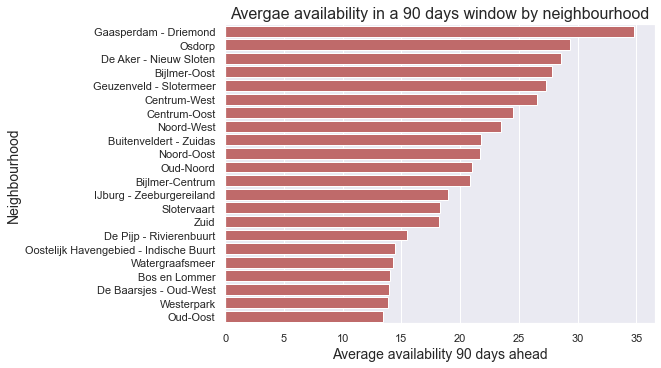

In [61]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=av90_df['availability_90'], y=list(av90_df.index), color='indianred')
# Plot title
ax.set_title("Avergae availability in a 90 days window by neighbourhood", fontsize=16)
# Plot horizontal label
plt.xlabel('Average availability 90 days ahead', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

We see that **there are some neighbourhoods whose availability, in average, is twice as great as other neighbourhoods**. These are already "well served", and we have to focus, instead, on those that have low availability, such as Oud-Oost, for example.

Before taking a decision, however, **we might also want to take into account the average price on that neighbourhood**. If we have two neighbourhoods that have the same average availability, but in the second one the average price is higher, it is probably more interesting to Airbnb to promote experiences in the later neighbourhood than the former.

Let's analyse what the average price by neighbourhood is of experiences for 2 people. (We only take into account those that are for 2 people so the averages are more reliable, since those for, let's say, 10 people, will probably be higher, and we would be introducing a bias if we counted them in too. We could have chosen any other number different than 2, but there is simply more data available for 2. We analyse in more depth the variable that accounts for this information in the next section).

In [62]:
acc2_df = listings_det_df[listings_det_df['accommodates']==2]
avr_acc2_df = acc2_df[['neighbourhood_cleansed','price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by=['price'], ascending=False)
avr_acc2_df

price
neighbourhood_cleansed                            
Centrum-West                            145.875583
Centrum-Oost                            137.312977
IJburg - Zeeburgereiland                128.890511
Oud-Oost                                126.405817
De Pijp - Rivierenbuurt                 121.473496
Zuid                                    117.614874
Westerpark                              117.396996
De Baarsjes - Oud-West                  115.532875
Oud-Noord                               106.601770
Geuzenveld - Slotermeer                 106.262626
Oostelijk Havengebied - Indische Buurt  106.027076
Watergraafsmeer                         102.254237
Bos en Lommer                           101.606017
Buitenveldert - Zuidas                  100.351351
Noord-West                               92.644628
Slotervaart                              88.816514
De Aker - Nieuw Sloten                   85.838710
Noord-Oost                               83.578313
Osdorp                                   78.387500
Bijlmer-Centrum                          70.761905
Gaasperdam - Driemond                    69.464286
Bijlmer-Oost                             61.478261

And, visually:

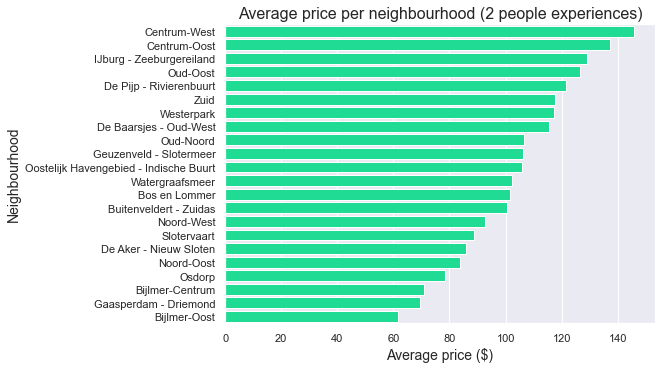

In [63]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=avr_acc2_df['price'], y=list(avr_acc2_df.index), color='mediumspringgreen')
# Plot title
ax.set_title("Average price per neighbourhood (2 people experiences)", fontsize=16)
# Plot horizontal label
plt.xlabel('Average price ($)', fontsize=14)
# Plot vertical label
plt.ylabel('Neighbourhood', fontsize=14)
# Showing the plot
plt.show()

Not surprisingly, **the central neighbourhoods are more expensive**. And the cheapest neighbourhood, in average, is more than 2 times less expensive than the most expensive neighbourhood.

In order to take a more informed decision about where to promote more experiences, let's combine the price and the availability plots.

In [64]:
av90Price = av90_df
av90Price['avPrice'] = avr_acc2_df['price']
av90Price[0:5]

availability_90     avPrice
neighbourhood_cleansed                              
Gaasperdam - Driemond          34.811475   69.464286
Osdorp                         29.314465   78.387500
De Aker - Nieuw Sloten         28.612676   85.838710
Bijlmer-Oost                   27.843750   61.478261
Geuzenveld - Slotermeer        27.330189  106.262626

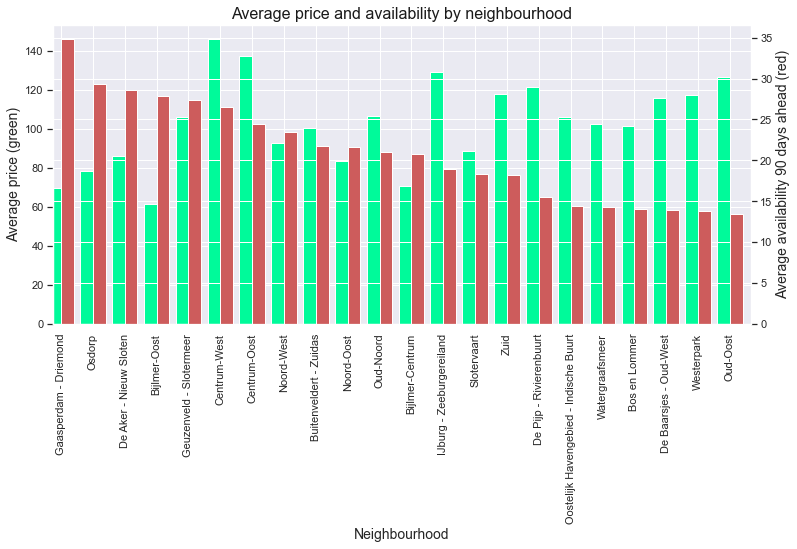

In [65]:
sns.set(rc={'figure.figsize':(12.5,5.5)})

fig = plt.figure()

plt.title(label="Average price and availability by neighbourhood",
          fontsize=16,
          color="k")

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4
av90Price.avPrice.plot(kind='bar', color='mediumspringgreen', ax=ax, width=width, position=1)
av90Price.availability_90.plot(kind='bar', color='indianred', ax=ax2, width=width, position=0)

ax2.set_ylabel('Average availability 90 days ahead (red)', fontsize=14)
ax.set_ylabel('Average price (green)',  fontsize=14)

ax.set_xlabel('Neighbourhood',  fontsize=14)
plt.show()

From this graph, the last 3 neighbourhoods, namely **Oud-Oost, Westerpark and De Baarsjes - Oud-West are potentially good places to advertise and promote new experiences**, since the availability is the lower, meaning that many people is trying to book experiences there, and the average price is high, meaning more income for Airbnb.

### <span style="color:#32CAEC"> 6.2 Which type of apartments should Airbnb promote? </span>

Of course, Airbnb doesn't only provide one type of apartment. **There are many different homestays or experiences available**. This is essential information, in combination with the location, to decide how the ideal advertisement should look like in order to get the most people to use Aribnb in Amsterdam.

In this section, we will essentially take a look at the availability of different advertisements and, at the same time, take into account some important variables regarding the type of the experience, such as the type of the property (house, apartment, etc.), the room type (private, shared, etc.) and the amount of people allowed in the property (2, 3, etc.).

The outline of the strategy we will follow looks like this: we will do some exploratory data analsys with the relevant variables, then do a regression with the availability as target, and finally, explore the coefficients and determine which variable has a greater impact on availability.

First, let's take a look at the variable `property_type`.

In [66]:
len(listings_det_df['property_type'].unique())

31

There are **many different property types**, in particular, 31.

Let's count how many advertisements of each type there are.

In [67]:
prop_type = listings_det_df.pivot_table(columns=['property_type'], aggfunc='size').sort_values(ascending=False)
prop_type

property_type
Apartment                 15581
House                      1522
Townhouse                   649
Bed and breakfast           455
Loft                        384
Boat                        372
Condominium                 323
Houseboat                   225
Guest suite                 152
Aparthotel                   73
Serviced apartment           63
Other                        51
Guesthouse                   43
Villa                        32
Boutique hotel               28
Cabin                        14
Cottage                      12
Bungalow                     12
Hotel                         7
Casa particular (Cuba)        5
Tiny house                    5
Barn                          4
Hostel                        4
Chalet                        3
Campsite                      2
Camper/RV                     2
Tent                          1
Lighthouse                    1
Nature lodge                  1
Castle                        1
Earth house               

Visually:

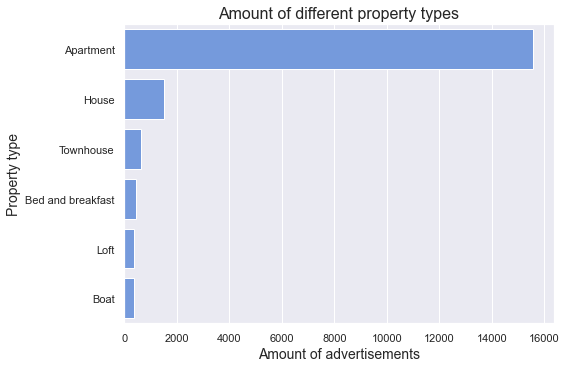

In [68]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=list(prop_type.values)[0:6], y=list(prop_type.index)[0:6], color='cornflowerblue')
# Plot title
ax.set_title("Amount of different property types", fontsize=16)
# Plot horizontal label
plt.xlabel('Amount of advertisements', fontsize=14)
# Plot vertical label
plt.ylabel('Property type', fontsize=14)
# Showing the plot
plt.show()

By far, **most of the advertisements are about apartments**. Followed by house and townhouse.

Now let's look at the variable `room_type`.

In [69]:
len(listings_det_df['room_type'].unique())

3

There are **three different types of room**.

Let's count how many advertisements of each type there are.

In [70]:
room_types = listings_det_df.pivot_table(columns=['room_type'], aggfunc='size').sort_values(ascending=False)
room_types

room_type
Entire home/apt    15887
Private room        4076
Shared room           65
dtype: int64

Visually:

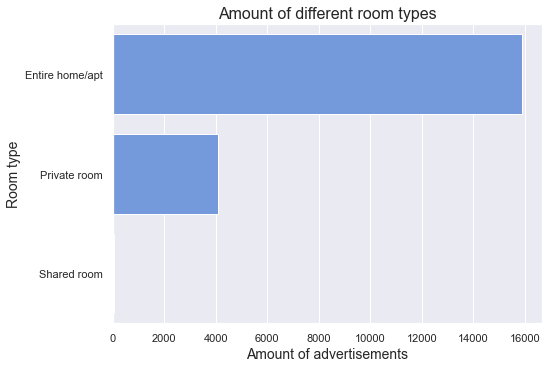

In [71]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=list(room_types.values), y=list(room_types.index), color='cornflowerblue')
# Plot title
ax.set_title("Amount of different room types", fontsize=16)
# Plot horizontal label
plt.xlabel('Amount of advertisements', fontsize=14)
# Plot vertical label
plt.ylabel('Room type', fontsize=14)
# Showing the plot
plt.show()

**Most rooms are "entire"**, meaning that you have the entire appartment, as opposed to a single room. The "shared room" type is almost non-existant. **Only 65 advertisements, out of about 20 thousand, are shared rooms**.

Now, let's check the `accommodates` variable.

In [72]:
len(listings_det_df['accommodates'].unique())

15

There are **15 different options**.

Let's see how many advertisements of each type there are.

In [73]:
acco_num = listings_det_df.pivot_table(columns=['accommodates'], aggfunc='size')
acco_num

accommodates
1       419
2     10834
3      1677
4      6093
5       371
6       411
7        54
8        94
9         5
10       16
11        3
12       17
14        5
16       28
17        1
dtype: int64

Visually:

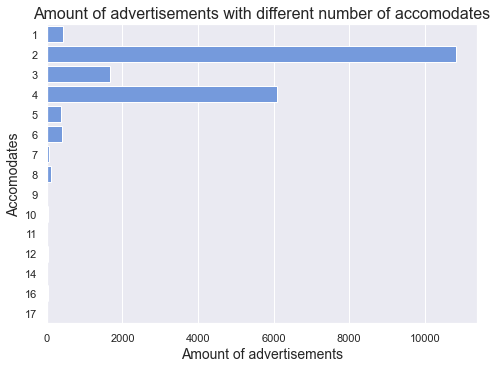

In [74]:
# Plot size
sns.set(rc={'figure.figsize':(7.7,5.5)})
# Plot data and color
ax = sns.barplot(x=list(acco_num.values), y=[str(x) for x in acco_num.index], color='cornflowerblue')
# Plot title
ax.set_title("Amount of advertisements with different number of accomodates", fontsize=16)
# Plot horizontal label
plt.xlabel('Amount of advertisements', fontsize=14)
# Plot vertical label
plt.ylabel('Accomodates', fontsize=14)
# Showing the plot
plt.show()

**Most of the advertisements** are properties that **can support up to 2 or 4 people** in their property.

Now, let's **prepare the data to perform a regression**. We will reduce the amount of cathegories of `property_type` as well as of `accommodates`. Then we will transform the cathegories to dummy variables.

First, we create a new dataframe only with the variables of interest.

In [75]:
# Making a data frame only with the attributes of interest
reg_df = listings_det_df[['property_type', 'room_type','accommodates','availability_90']]

We check for NaNs.

<AxesSubplot:>

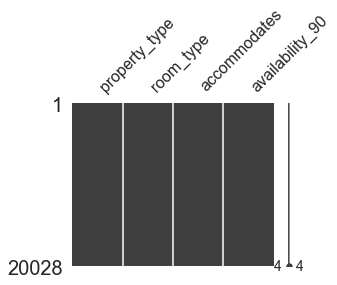

In [76]:
msno.matrix(reg_df, figsize=(4, 3))

In [77]:
reg_df.isnull().sum()/len(reg_df)

property_type      0.0
room_type          0.0
accommodates       0.0
availability_90    0.0
dtype: float64

There are no NaNs.

In order to reduce the number of cathegories of `property_type`, we will group up all those cathegories that have less than 60 instances in a cathegory called `others`.

In [78]:
pt = reg_df.pivot_table(columns=['property_type'], aggfunc='size')
pt_matrix = []
for i in range(len(pt)):
    pt_matrix.append([pt.index[i], pt.values[i]])
for t in pt_matrix:
    if (t[1]<60):
        reg_df['property_type'] = reg_df['property_type'].replace(t[0],'Others')

We count again how many advertisements of each property type there are to make sure the transformation we applied is correct.

In [79]:
new_prop_type = reg_df.pivot_table(columns=['property_type'], aggfunc='size').sort_values(ascending=False)
new_prop_type

property_type
Apartment             15581
House                  1522
Townhouse               649
Bed and breakfast       455
Loft                    384
Boat                    372
Condominium             323
Others                  229
Houseboat               225
Guest suite             152
Aparthotel               73
Serviced apartment       63
dtype: int64

Everything seems correct, we have grouped the cathegories with less than 60 instances in a new cathegory called "others".

We will do a similar thing with the variable `accommodates`. This time, we would like to group the cathegories greater than 5 in a new cathegory called `plus_5`.

In [80]:
ac = reg_df['accommodates']
ac_matrix = []
for i in range(len(ac)):
    ac_matrix.append([ac.index[i], ac.values[i]])
for a in ac_matrix:
    if (type(a[1])==int):
        if (a[1]>5):
            reg_df['accommodates'][a[0]]=='plus_5'

In [81]:
for num in [k for k in [x for x in list(reg_df['accommodates'].unique()) if (x != 'Others')] if (k>5)]:
    reg_df['accommodates'] = reg_df['accommodates'].replace(num, 'plus5')

We count again how many advertisements of each accomodate type there are to make sure the transformation we applied is correct.

In [82]:
new_acco_num = reg_df.pivot_table(columns=['accommodates'], aggfunc='size')
new_acco_num

accommodates
1          419
2        10834
3         1677
4         6093
5          371
plus5      634
dtype: int64

Everything seems correct.

Now we can **create dummy variables** for each cathegory of each column.

In [83]:
reg_df = pd.get_dummies(reg_df, columns=["property_type"], prefix=["Prop_type"])
reg_df = pd.get_dummies(reg_df, columns=["accommodates"], prefix=["Accom"])
reg_df = pd.get_dummies(reg_df, columns=["room_type"], prefix=["Room_type"])
reg_df

availability_90  Prop_type_Aparthotel  Prop_type_Apartment  \
0                   44                     0                    1   
1                    0                     0                    1   
2                   24                     0                    0   
3                   44                     0                    1   
4                   54                     0                    0   
...                ...                   ...                  ...   
20025               11                     0                    0   
20026               16                     0                    1   
20027               22                     0                    1   
20028               31                     0                    1   
20029               14                     0                    1   

       Prop_type_Bed and breakfast  Prop_type_Boat  Prop_type_Condominium  \
0                                0               0                      0   
1                                0               0                      0   
2                                0               0                      0   
3                                0               0                      0   
4                                0               0                      0   
...                            ...             ...                    ...   
20025                            0               0                      0   
20026                            0               0                      0   
20027                            0               0                      0   
20028                            0               0                      0   
20029                            0               0                      0   

       Prop_type_Guest suite  Prop_type_House  Prop_type_Houseboat  \
0                          0                0                    0   
1                          0                0                    0   
2                          0                0                    0   
3                          0                0                    0   
4                          0                0                    1   
...                      ...              ...                  ...   
20025                      0                1                    0   
20026                      0                0                    0   
20027                      0                0                    0   
20028                      0                0                    0   
20029                      0                0                    0   

       Prop_type_Loft  ...  Prop_type_Townhouse  Accom_1  Accom_2  Accom_3  \
0                   0  ...                    0        0        1        0   
1                   0  ...                    0        0        0        0   
2                   0  ...                    1        0        1        0   
3                   0  ...                    0        0        0        1   
4                   0  ...                    0        0        1        0   
...               ...  ...                  ...      ...      ...      ...   
20025               0  ...                    0        0        0        0   
20026               0  ...                    0        0        0        1   
20027               0  ...                    0        0        1        0   
20028               0  ...                    0        0        1        0   
20029               0  ...                    0        0        0        0   

       Accom_4  Accom_5  Accom_plus5  Room_type_Entire home/apt  \
0            0        0            0                          0   
1            0        1            0                          1   
2            0        0            0                          1   
3            0        0            0                          1   
4            0        0            0                          0   
...        ...      ...          ...                        ...   
20025 

Now, without doing any regression yet, as a first look at the correlation between the different options and availability, we can create a heatmap. This is perhaps an easy way to see the correlation, but it'll give us more information than we might need, and the correlation coefficient used is by default the Pearson correlation coefficient, which is perhaps not be the best option. This is why we will try to measure the correlation in another way later.

<AxesSubplot:>

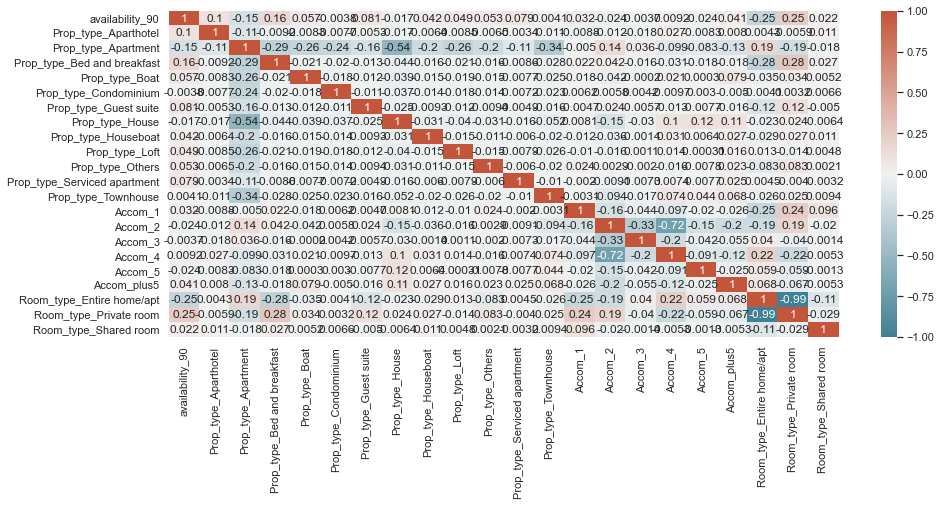

In [84]:
cerrlation = reg_df.corr()
sns.set(rc={'figure.figsize':(15,6)})
plt.figure()
sns.heatmap(cerrlation, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see the correlation between the different homestays types and availability_90 is rather weak. We highlight the attributes `Room_type_Private_room` and `Room_type_Entire home/apt`.

However, this looks a bit confusing and could not be accurate.

Instead, use the Point Biserial Coeficient for calculating the correlation. This is a coeficient specialized for cathegorical data, which is our case. Also, we will only calculate the correlation between `availability_90` and the different cathegoriacal attributes, and not between the attributes.

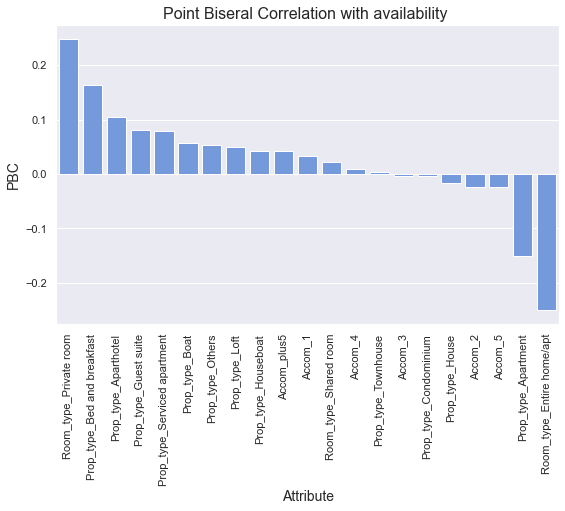

In [85]:
availability = reg_df['availability_90']
pbcs = []

for i in range(len(reg_df.columns)-1):
    catvar = reg_df[reg_df.columns[i+1]]
    pbc = pointbiserialr(catvar, availability)[0]
    pbcs.append(pbc)
    
pbc_df = pd.DataFrame(list(zip(reg_df.columns[1:], pbcs)), columns =['Attributes', 'PBC'])
pbc_prop = pbc_df[0:12]
pbc_acc = pbc_df[12:18]
pbc_room = pbc_df[18:]
pbc_df = pbc_df.sort_values(by='PBC', ascending=False)

sns.set(rc={'figure.figsize':(9,5.5)})
ax = sns.barplot(y=pbc_df['PBC'], x=pbc_df['Attributes'], color='cornflowerblue')
ax.set_title("Point Biseral Correlation with availability ", fontsize=16)
plt.xlabel('Attribute', fontsize=14)
plt.ylabel('PBC', fontsize=14)
plt.xticks(rotation=90)
plt.show()

The results are interesting. Remember that **if the correlation is positive, that means that, that particular attribute being true means that it is more likely for the particular homestay to be available**. This means that, in order to get the more customers to book the experience, Airbnb shouldn't promote experiences with the positively correlated attributes being true and, inversely, **Airbnb should promote experiences with the negatively correlated attributes being true**.

With the results obtained, for example, we see that those homestays whose room type is "entire home/apt", the property type is "apartment" and the number of accomodations is "5", are less likely to be available. So Airbnb should promote this type of experiences.

We can make the results even more clear if we split them into different blocks, one for property type, another for room type and another for number of accomodations.

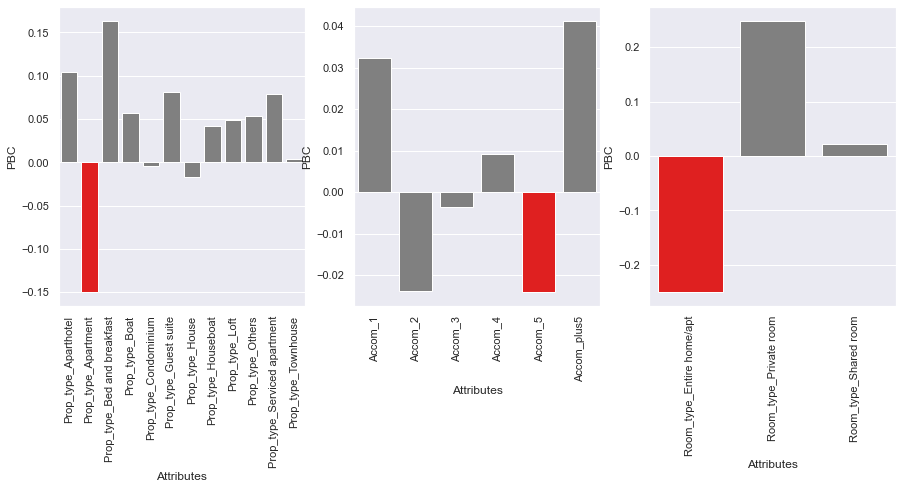

In [86]:
sns.set(rc={'figure.figsize':(15,5.5)})
fig, axs = plt.subplots(ncols=3)
clrs_1 = ['grey' if (x > min(pbc_prop['PBC'])) else 'red' for x in pbc_prop['PBC'] ]
clrs_2 = ['grey' if (x > min(pbc_acc['PBC'])) else 'red' for x in pbc_acc['PBC'] ]
clrs_3 = ['grey' if (x > min(pbc_room['PBC'])) else 'red' for x in pbc_room['PBC'] ]
sns.barplot(y=pbc_prop['PBC'], x=pbc_prop['Attributes'], palette=clrs_1,  data=pbc_prop, ax=axs[0])
sns.barplot(y=pbc_acc['PBC'], x=pbc_acc['Attributes'], palette=clrs_2,  data=pbc_acc, ax=axs[1])
sns.barplot(y=pbc_room['PBC'], x=pbc_room['Attributes'], palette=clrs_3,  data=pbc_room, ax=axs[2])
axs[0].set_xticklabels(axs[0].get_xmajorticklabels(), rotation=90)
axs[1].set_xticklabels(axs[1].get_xmajorticklabels(), rotation=90)
axs[2].set_xticklabels(axs[2].get_xmajorticklabels(), rotation=90)
plt.show()

The attributes corresponding to those whose bars (in the bar plot) are red, are potentially good characteristics for an experience in Airbnb, if the goal is to attract more people and, thus, have lower availability. 

Now, we will **compare these findings with another method**. We will **fit a Random Forest Regressor** using the binary attributes, with `availability_90` as target. Then, we will **check how important each attribute is** (feature importance).

First, we arrange the data, so we can give it to the Random Forest fit function.

In [87]:
y_reg = reg_df['availability_90']
X_reg = reg_df[reg_df.columns[1:]]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)

print("Training feature set size:",X_train_reg.shape)
print("Test feature set size:",X_test_reg.shape)
print("Training variable set size:",y_train_reg.shape)
print("Test variable set size:",y_test_reg.shape)

Training feature set size: (16022, 21)
Test feature set size: (4006, 21)
Training variable set size: (16022,)
Test variable set size: (4006,)


Then, we fit the Random Forest.

In [88]:
regressor = RandomForestRegressor(n_estimators=10, random_state=123)
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)
y_pred_train_reg = regressor.predict(X_train_reg)
R2_train = r2_score(y_train_reg, y_pred_train_reg)
R2_test = r2_score(y_test_reg, y_pred_reg)

print("-"*50)
print('R2 score (on train):', R2_train)
print('R2 score (on test):', R2_test)
print("-"*50)

--------------------------------------------------
R2 score (on train): 0.12960512787320144
R2 score (on test): 0.08941135987204807
--------------------------------------------------


The $R^2$ score is very low. However, our main objective is not to predict, but to use the feature importance tool to check which attributes is the RF giving more weight to. In any case, though, having such a score means that we can't reliably predict `availability_90` by these attributes.

We check the importance of each feature below.

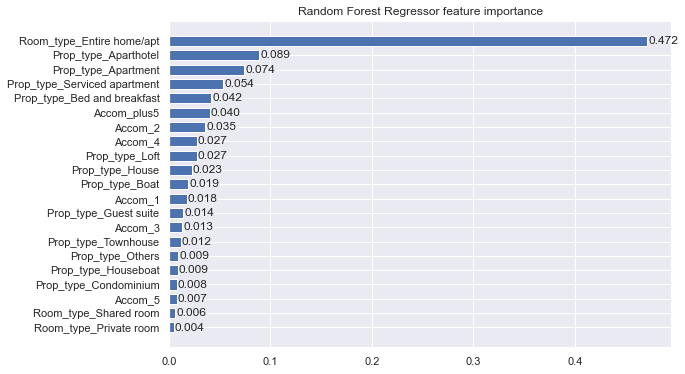

In [89]:
plt.rcParams["figure.figsize"] = (9,6)
sorted_index = regressor.feature_importances_.argsort()
parameters = list(X_train_reg.columns)
plt.barh([parameters[i] for i in sorted_index], regressor.feature_importances_[sorted_index], height=.7)
plt.title('Random Forest Regressor feature importance')
for x, y_ in zip(regressor.feature_importances_[sorted_index], np.arange(len(parameters))):
    plt.text(x + .001, y_, f'{x:.3f}', va='center')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

The `Room_type_Entire home/apt` is by far the most important attribute for the RF. However, from this information, we can't know "in which direction" these attributes are being used. Therefore, we can use a different plot, using SHAP values, which are based on cooperative game theory and are usually used to interpret ML models.

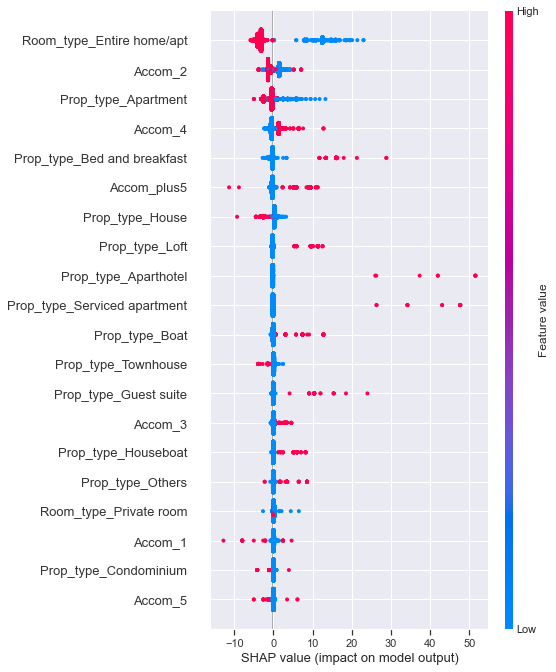

In [90]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test_reg)
shap.summary_plot(shap_values, X_test_reg)

**These results generally agree with those found using PB Correlation**. For example, we see that the "Entire home/apt" room type, which was the most important feature, is impacting the model output negatively, which we can interpret as a negative correlatioin with availability. Also, the apartment, as the property type, is also impacting the model negatively. We can highlight, as a new insight separated from the PBC analysis, the second most important feature, which greatly impacts the model positively, so in this case Airbnb should avoid promoting this characteristic in their experiences.

### <span style="color:#32CAEC"> 6.3 Suggestions and recommendations for Airbnb </span>

Summarizing the results obtained throughout the previous analysis, we can make the following recommendations to Airbnb, if their objective is to earn more money:

**Main facts and advise**

- **A good place to promote new experiences**: taking into account the average price per night and the average availability in a 90-days window, three potentially good options (neighbourhoods) to promote more experiences are **De Baarsjes - Oud-West, Westerpark and Out-Oost**.


- **Characteristics leading to more bookings**: analysing the correlation with the availability in a 90-day window, the following characteristics are those that make it more likely that someone books the experience: **property type: apartment, accommodation quantity: 5 people or 2 people, room type: entire home/apartment**. Also, inversely, the characteristics that make it less likely are: propety type: bed and breakfast, accomodation quantity: more than 5, room type: private room.

**Other interesting facts**

- The **number of experiences is not homegeneously distributed among neighbourhoods**. Some of them have 10 to 30 times more experiences available than others.


- The **neighbourhood** where there is a **higher average availability in a 90-days window is Gaasperdam-Driemond** (around 35 days out of 90). Conversely, the one where there is the **lowest is Oud-Oost** (around 13 days out of 90).


- The **average price per night** (for 2 people) is **higher in the central neighbourhoods** (around 130 to 150 dollars). Conversely, the **cheapest is in Bijlmer-Oost** (around 60 dollars).


- **Most property types** are **appartments** (around 80%).


- **Most types of room** are **entire home/apartments** (around 80%).


- **Most experiences provide lodging only for 2 people** (accommodations) (around 50%).


Finally, coming back to the imaginary **advertisement campaign scenario**, this is what a possible advertisement might look like, taking into account the insights from the previous sections:

<img src="images/amsterdamad.jpg" alt="drawing" width="400"/>

## <span style="color:navy"> 7. Information relevant to the hosts </span>

The hosts are the third block of this data analysis. In this section we would like to **understand what the most important characteristics of an experience are to take into account in order to have success as a host**. Then, with this understanding, **make recommendations** for new hosts or already existent hosts that want to do as best as possible in the platform.

Given the nature of the strategy we will follow to answer **the questions posed in this section, we can pack them and answer them at the same time**, with the same analysis. They are very similar, after all, but it is important to realise that the answers to them might be useful/ interesting to two different groups of people.

The **strategy** will be the following: we will **measure "success" by a mixture of the amount of recent reviews and how good these are**, this is, by their rating. Then, we will **select relevant attributes that define the experience of the advertisement**. Especially, attributes that can be chosen or modified by hosts (in order for an attribute to be interesting to hosts, it must be readily malleable by them). Once we have the attributes, we will essentially **measure their correlation with our measure of succes**. In particular, we will **see if they can *predict* success**. If they do, then they are important. We will do this through a series of steps: feature engineering, EDA, modelling, etc.

### <span style="color:#32CAEC"> 7.1 If you want to be a host, where and how? + 7.2 If you are already a host, how to improve? </span>

#### Choosing the relevant attributes

Let's remind ourselves of what attributes we have available.

In [91]:
listings_det_df.columns

Index(['id', 'name', 'summary', 'description', 'access', 'interaction',
       'host_since', 'host_about', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'is_business_trav

In [92]:
reviews_det_df.columns

Index(['listing_id', 'date', 'comments'], dtype='object')

From these attributes, we will create a **new dataset only with those relevant for our purposes**. So, for example, we will delete the review scores, except the `review_scores_rating` (which will be part of our target), the attributes that quantify the availability, the id, name and other random information about the host, redundant information such as `days_host_since`, or things that can't be changed by the host, such as `first_review`.

We create the dataset next.

In [93]:
atts = ['id','summary', 'description', 'access', 'interaction', 'host_response_time', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'is_location_exact',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'review_scores_rating',
        'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
        'maximum_nights', 'calendar_updated', 'requires_license', 'instant_bookable',
        'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture',
        'require_guest_phone_verification']
hosts_df = listings_det_df[atts]
hosts_df

id                                            summary  \
0          2818           Quiet Garden View Room & Super Fast WiFi   
1          3209  You will love our spacious (90 m2) bright apar...   
2         20168  Cozy studio on your own private floor, 100% in...   
3         25428                                                NaN   
4         27886  Stylish and romantic houseboat on fantastic hi...   
...         ...                                                ...   
20025  30576148  Spacious (160m2) family house + FREE private p...   
20026  30577727  My Home Sweet Home is a beautiful apartment th...   
20027  30578037  Lightful apartment with 1 room available in th...   
20028  30579673  My Home Sweet Home is a beautiful apartment th...   
20029  30580413  Live like a local in our cosy 50m2 appartment ...   

                                             description  \
0      Quiet Garden View Room & Super Fast WiFi I'm r...   
1      You will love our spacious (90 m2) bright apar...   
2      Cozy studio on your own private floor, 100% in...   
3      This nicely furnished, newly renovated apt  is...   
4      Stylish and romantic houseboat on fantastic hi...   
...                                                  ...   
20025  Spacious (160m2) family house + FREE private p...   
20026  My Home Sweet Home is a beautiful apartment th...   
20027  Lightful apartment with 1 room available in th...   
20028  My Home Sweet Home is a beautiful apartment th...   
20029  Live like a local in our cosy 50m2 appartment ...   

                                                  access  \
0                                                    NaN   
1            You will have the entire house to yourself.   
2                                                    NaN   
3      The apartment is about 75 meters or 800 square...   
4                     Your own apartment, nothing shared   
...                                                  ...   
20025  You have access to our house all privately. Wi...   
20026                                                NaN   
20027                                                NaN   
20028  The small and cosy bedroom will be your room t...   
20029     Guests will have full access to the apartment.   

                                             interaction  host_response_time  \
0                                                    NaN      within an hour   
1      We will meet you in person for check in whenev...      within an hour   
2      No curfew, free entrance 27/7 with your own ke...  within a few hours   
3                                                    NaN  within a few hours   
4      As much as they want, and is possible. I speak...      within an hour   
...                                                  ...                 ...   
20025  as much as possible before their stay. and ava...                 NaN   
20026  We rent our Home Sweet Home during our holiday...                 NaN   
20027                                                NaN                 NaN   
20028  I rent my sweet spare room in my Home Sweet Ho...                 NaN   
20029  Will be available for questions or fixing prob...                 NaN   

                                      host_verifications host_has_profile_pic  \
0      ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1                 ['email', 'phone', 'reviews', 'jumio']                    t   
2      ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
3                          ['email', 'phone', 'reviews']                    t   
4                 ['email', 'phone', 'reviews', 'jumio']                    t   
...                                                  ...                  ...   
20025                                 ['email', 'phone']                    t   
20026                      ['email', 'phone', 'reviews']                    t   
20027          ['email', 'phone', 'faceb

Now we have a new dataset that fits our purposes.

Let's see some basic info about it:

In [94]:
hosts_df.describe()

id  accommodates     bathrooms      bedrooms          beds  \
count  2.002800e+04  20028.000000  20018.000000  20020.000000  20021.000000   
mean   1.541670e+07      2.891851      1.137651      1.445055      1.849208   
std    8.569648e+06      1.318802      0.793938      0.885598      1.389733   
min    2.818000e+03      1.000000      0.000000      0.000000      0.000000   
25%    8.187348e+06      2.000000      1.000000      1.000000      1.000000   
50%    1.562950e+07      2.000000      1.000000      1.000000      1.000000   
75%    2.202639e+07      4.000000      1.000000      2.000000      2.000000   
max    3.058041e+07     17.000000    100.500000     12.000000     32.000000   

       review_scores_rating         price  guests_included  minimum_nights  \
count          17389.000000  20028.000000     20028.000000    20028.000000   
mean              94.849790    152.196375         1.469043        3.328790   
std                6.648966    145.828327         0.937925       12.538033   
min               20.000000      8.000000         1.000000        1.000000   
25%               93.000000     96.000000         1.000000        2.000000   
50%               97.000000    125.000000         1.000000        2.000000   
75%              100.000000    175.000000         2.000000        3.000000   
max              100.000000   8500.000000        16.000000     1001.000000   

       maximum_nights  
count    20028.000000  
mean       631.176403  
std        541.344520  
min          1.000000  
25%         21.000000  
50%       1125.000000  
75%       1125.000000  
max       9999.000000

We can see **there might be some outliers**. For example, the maximum value for the minimum number of nights is 1001, and the maximum value for the maximum number of nights is 9999. These are suspicious values and we will treat them later.

In [95]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20028 entries, 0 to 20029
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20028 non-null  int64  
 1   summary                           19508 non-null  object 
 2   description                       19904 non-null  object 
 3   access                            12227 non-null  object 
 4   interaction                       11974 non-null  object 
 5   host_response_time                10546 non-null  object 
 6   host_verifications                20028 non-null  object 
 7   host_has_profile_pic              20024 non-null  object 
 8   host_identity_verified            20024 non-null  object 
 9   neighbourhood_cleansed            20028 non-null  object 
 10  is_location_exact                 20028 non-null  object 
 11  property_type                     20028 non-null  object 
 12  room

We see that we have **many attributes that are of the type "object"**. We will probably have to treat these more carefully later on.

#### Feature engineering

First, we will create the target attribute from the attributes `date` (from the reviews_details dataset) and `review_scores_rating`.

The target attribute will be a combination of "how many recent reviews the advertisement has" and "what its rating is". We have the second information readily available, it's simply the attribute `review_scores_rating`. But we'll have to create the first.

In order to do this, first, using the "reviews_details" dataset, and using the attribute `date`, we calculate the number of days that have passed since the reveiw was published. Of course, we will consider "today" the day the data was taken in.

In [96]:
reviews_det_df['days_since'] = pd.to_datetime(reviews_det_df['date'], format='%Y-%m-%d')
reviews_det_df['days_since'] = (pd.to_datetime('2018-12-06', format='%Y-%m-%d') - reviews_det_df['days_since'])/ np.timedelta64(1, 'D')
reviews_det_df

listing_id        date  \
0             2818  2009-03-30   
1             2818  2009-04-24   
2             2818  2009-05-03   
3             2818  2009-05-18   
4             2818  2009-05-25   
...            ...         ...   
431825    30435529  2018-12-04   
431826    30439111  2018-12-02   
431827    30518120  2018-12-04   
431828    30525429  2018-12-05   
431829    30550093  2018-12-06   

                                                 comments  days_since  
0       Daniel is really cool. The place was nice and ...      3538.0  
1       Daniel is the most amazing host! His place is ...      3513.0  
2       We had such a great time in Amsterdam. Daniel ...      3504.0  
3       Very professional operation. Room is very clea...      3489.0  
4       Daniel is highly recommended.  He provided all...      3482.0  
...                                                   ...         ...  
431825  The host canceled this reservation the day bef...         2.0  
431826  The host canceled this reservation 20 days bef...         4.0  
431827  The host canceled this reservation 22 days bef...         2.0  
431828  I loved this house! It is truly incredible and...         1.0  
431829                              I love it I recommend         0.0  

[431830 rows x 4 columns]

Now, we can calculate how many recent reviews the advertisement has, counting how many reviews have been published in the last X days, and then, group by advertisement. In our case, we **will consider a review to be "recent" if it has been published less than a year ago**. This way, we will take into account yearly fluctuations.

In [97]:
# Group by "listing_id" and count number of "days_since" less than 365 days
df_count = reviews_det_df.groupby('listing_id')['days_since'].apply(lambda x: (x<=365).sum()).reset_index(name='recent_reviews')
df_count.rename(columns = {'listing_id':'id'}, inplace = True)
df_count

id  recent_reviews
0          2818              30
1          3209               8
2         20168              50
3         25428               1
4         27886              52
...         ...             ...
17619  30435529               1
17620  30439111               1
17621  30518120               1
17622  30525429               1
17623  30550093               1

[17624 rows x 2 columns]

Let's take a quick look at its distribution.

<AxesSubplot:xlabel='recent_reviews', ylabel='Count'>

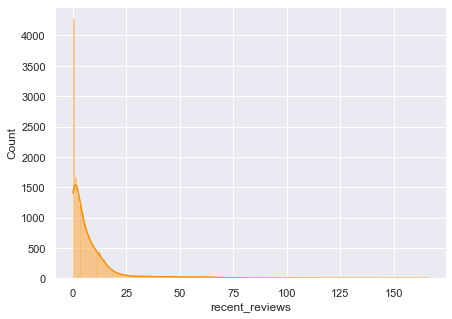

In [98]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=df_count, x="recent_reviews", kde=True, color="darkorange", binwidth=1)

It looks like most advertisements haven't got any recent reviews. And some of them have more than 50.

Now, let's also remember how the ratings distribution looked like.

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

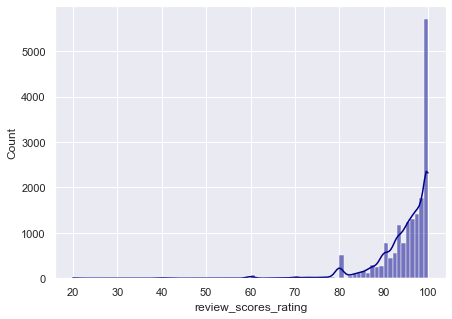

In [99]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=listings_det_df, x="review_scores_rating", kde=True, color="darkblue", binwidth=1)

In [100]:
hosts_df[['id','review_scores_rating']]

id  review_scores_rating
0          2818                  97.0
1          3209                  96.0
2         20168                  87.0
3         25428                 100.0
4         27886                  99.0
...         ...                   ...
20025  30576148                   NaN
20026  30577727                   NaN
20027  30578037                   NaN
20028  30579673                   NaN
20029  30580413                   NaN

[20028 rows x 2 columns]

We are close to finish making the target. Now, we will **merge the main dataset and the dataset where we performed the counting of the recent reviews**, so the advertisements ID match.

In [101]:
hosts_df = pd.merge(hosts_df, df_count, on='id')
hosts_df[['id','review_scores_rating','recent_reviews']]

id  review_scores_rating  recent_reviews
0          2818                  97.0              30
1          3209                  96.0               8
2         20168                  87.0              50
3         25428                 100.0               1
4         27886                  99.0              52
...         ...                   ...             ...
17617  30435529                   NaN               1
17618  30439111                   NaN               1
17619  30518120                   NaN               1
17620  30525429                 100.0               1
17621  30550093                 100.0               1

[17622 rows x 3 columns]

And now, we will **create the new target attribute called "success"**, since this is some kind of measure of how successful an advertisement (an experience in Airbnb) is.

We want this measure to take into account both the amount of recent reviews and the rating. We propose the following definition:

$$Success = \frac{Num. recentreviews}{(101-Rating)^C}$$

And we will choose C to be 1. Further experiments could be done to see how C affects the results. Defining the success like this, puts the number of reveiews foward, but creates a penalization for being "away" from the perfect "100-rating". The 101 in the denominator is there in order to avoid division by 0, in case an advertisements has a 100-rating. In this case, there would be no penalization.

With this definition, for example, the following three advertisements will have the same "success" value (namely, 1):

- Ad. 1: 31 recent reviews and 70 rating score
- Ad. 2: 11 recent reviews and 90 rating score
- Ad. 3: 2 recent reviews and 99 rating score

Which is fairly reasonable.

We create the success column next:

In [102]:
hosts_df['success'] = hosts_df['recent_reviews']/(101-hosts_df['review_scores_rating'])
hosts_df[['id','success']]

id    success
0          2818   7.500000
1          3209   1.600000
2         20168   3.571429
3         25428   1.000000
4         27886  26.000000
...         ...        ...
17617  30435529        NaN
17618  30439111        NaN
17619  30518120        NaN
17620  30525429   1.000000
17621  30550093   1.000000

[17622 rows x 2 columns]

And here is its distribution:

<AxesSubplot:xlabel='success', ylabel='Count'>

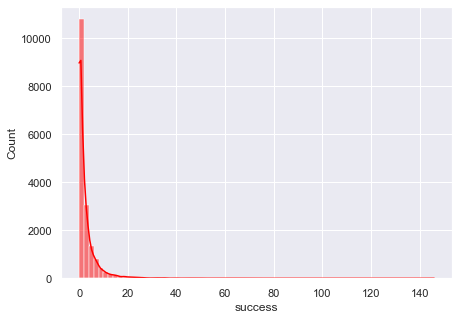

In [103]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=hosts_df, x="success", kde=True, color="red", binwidth=2)

Now, we will continue doing some feature engineering, specially for the attributes that contain text. We could delete them, since it's complicated to treat text, but we will keep them and use some of their information. Namely, it's length or whether there is text at all or not.

For the next variable, we will count how long its text is. If there is no text, we will say it's of 0 length.

In [104]:
hosts_df['summary']

0                 Quiet Garden View Room & Super Fast WiFi
1        You will love our spacious (90 m2) bright apar...
2        Cozy studio on your own private floor, 100% in...
3                                                      NaN
4        Stylish and romantic houseboat on fantastic hi...
                               ...                        
17617    Cosy 1BR Appartement, located in the most beau...
17618    December 20-27 ONLY Studio for sale 25 square ...
17619                                                    .
17620    Or House could not be better situated, real am...
17621    1 private bedroom for two people (two single b...
Name: summary, Length: 17622, dtype: object

In [105]:
hosts_df['summary'] = hosts_df['summary'].replace(np.nan, '')

In [106]:
hosts_df['summary_len'] = hosts_df['summary'].apply(len)
hosts_df = hosts_df.drop(['summary'], axis=1)
hosts_df[['id', 'summary_len']]

id  summary_len
0          2818           40
1          3209          421
2         20168          423
3         25428            0
4         27886          288
...         ...          ...
17617  30435529          498
17618  30439111          350
17619  30518120            1
17620  30525429          302
17621  30550093           98

[17622 rows x 2 columns]

We will do the same for the attribute `description`, which is of similar nature.

In [107]:
hosts_df['description'] = hosts_df['description'].replace(np.nan, '')
hosts_df['description_len'] = hosts_df['description'].apply(len)
hosts_df = hosts_df.drop(['description'], axis=1)
hosts_df[['id', 'description_len']]

id  description_len
0          2818             1000
1          3209             1000
2         20168             1000
3         25428             1000
4         27886             1000
...         ...              ...
17617  30435529             1000
17618  30439111              759
17619  30518120                1
17620  30525429             1000
17621  30550093              780

[17622 rows x 2 columns]

For the attribute `access`, however, we will simply say if it exists or not, this is, if the host provided access information or not.

In [108]:
def exists(element):
    if len(element)==0:
        return 0
    else:
        return 1

hosts_df['access'] = hosts_df['access'].replace(np.nan, '')
hosts_df['access_description'] = hosts_df['access'].apply(exists)
hosts_df = hosts_df.drop(['access'], axis=1)
hosts_df[['id', 'access_description']]

id  access_description
0          2818                   0
1          3209                   1
2         20168                   0
3         25428                   1
4         27886                   1
...         ...                 ...
17617  30435529                   0
17618  30439111                   0
17619  30518120                   0
17620  30525429                   1
17621  30550093                   1

[17622 rows x 2 columns]

We will do the same to `interaction`.

In [109]:
hosts_df['interaction'] = hosts_df['interaction'].replace(np.nan, '')
hosts_df['interaction_description'] = hosts_df['interaction'].apply(exists)
hosts_df = hosts_df.drop(['interaction'], axis=1)
hosts_df[['id', 'interaction_description']]

id  interaction_description
0          2818                        0
1          3209                        1
2         20168                        1
3         25428                        0
4         27886                        1
...         ...                      ...
17617  30435529                        1
17618  30439111                        0
17619  30518120                        0
17620  30525429                        1
17621  30550093                        1

[17622 rows x 2 columns]

As per the attribute `host_verifications`, we will count how many verifications the host has, since this attribute is a list. However, it is a "stringified" list.

In [110]:
hosts_df['host_verifications']

0        ['email', 'phone', 'reviews', 'jumio', 'offlin...
1                   ['email', 'phone', 'reviews', 'jumio']
2        ['email', 'phone', 'reviews', 'jumio', 'offlin...
3                            ['email', 'phone', 'reviews']
4                   ['email', 'phone', 'reviews', 'jumio']
                               ...                        
17617                                   ['email', 'phone']
17618                                   ['email', 'phone']
17619    ['email', 'phone', 'google', 'reviews', 'jumio...
17620    ['email', 'phone', 'reviews', 'jumio', 'offlin...
17621    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, Length: 17622, dtype: object

So we will have to transform it to an actual list. Also, there seem to be a few "None" values. We will also treat that.

In [111]:
hosts_df['num_host_ver'] = hosts_df['host_verifications'].apply(ast.literal_eval)
for i in range(len(hosts_df)):
    if hosts_df['num_host_ver'][i] is None:
        hosts_df['num_host_ver'][i] = []
hosts_df['num_host_ver'] = hosts_df['num_host_ver'].apply(len)
hosts_df = hosts_df.drop(['host_verifications'], axis=1)
hosts_df[['id', 'num_host_ver']]

id  num_host_ver
0          2818             8
1          3209             4
2         20168             8
3         25428             3
4         27886             4
...         ...           ...
17617  30435529             2
17618  30439111             2
17619  30518120             7
17620  30525429             6
17621  30550093             9

[17622 rows x 2 columns]

In the case of the attribute `amenities`, it is also a "stringified" type of data. In this case, it is a dictionary. However, it is poorly formed, and very hard to treat. In order to save time, we will simply calculate its string length. This will serve as a measure of "quantity of aminities".

In [112]:
hosts_df['amenities_len'] = hosts_df['amenities'].apply(len)
hosts_df = hosts_df.drop(['amenities'], axis=1)
hosts_df[['id', 'amenities_len']]

id  amenities_len
0          2818            701
1          3209            362
2         20168            345
3         25428            237
4         27886            347
...         ...            ...
17617  30435529            274
17618  30439111            153
17619  30518120            136
17620  30525429            565
17621  30550093            285

[17622 rows x 2 columns]

Let's continue with the feature engineering. Now, let's do some basic **text mining** with the attribute `comments` from the "reviews_details" dataset. There is one comment for each review, and these are usually quite long. Here's an example:

In [113]:
reviews_det_df['comments'][5]

"Daniel was a great host! He made everything so easy for us! The room was super clean and well equipped, the beds were very comfortable! Daniel also gave us good advices,  tips and tools (maps, compass, umbrella..) for getting around the city. The place is located in the quiet neighbourhood so we are away from all the noises, but it is also very close to all the public transportations so getting into the city is fairly easy and fast. I highly recommend Daniele's place!\r\n\r\n"

This is hard to work through and would require very sohpisticated methods to properly analyse it. We can, however, extract some basic info. Namely, some sort of "quantification" of the "nice" words. In particular, we can keep a list with words that are usually used in positive contexts, and count how many of them there are for each comment and then sum them up grouping them by advertisement. The next is a function that counts the number of nice words. The words we considered as being "nice" are:

- cool, nice, clean, quiet, good, perfect, thank, fantastic, wonderful, great, lovely, comfortable and beautiful.

In [114]:
def count_nice_words(string):
    if (type(string)!=str):
        return 0
    nice_words = ['cool', 'nice', 'clean', 'quiet', 'good', 'perfect',
              'thank', 'fantastic', 'wonderful', 'great', 'lovely',
              'comfortable', 'beautiful']
    w = 0
    for word in nice_words:
        w += string.lower().count(word)
    return w

Here is an example of the usage of this function with the comment we showed before:

In [115]:
count_nice_words(reviews_det_df['comments'][5])

5

The function has found 5 nice words for this comment.

Let's apply it to the whole column corresponding to the comments.

In [116]:
reviews_det_df['nice_words'] = reviews_det_df['comments'].apply(count_nice_words)

Now we will group the results by advertisement (by their ID), so we can see how many words they have recieved in the comments posted by the users.

In [117]:
count_df = reviews_det_df.groupby('listing_id')['nice_words'].apply(sum).reset_index(name='num_nice_words')
count_df.rename(columns = {'listing_id':'id'}, inplace = True)
count_df

id  num_nice_words
0          2818             580
1          3209              72
2         20168             501
3         25428               3
4         27886             386
...         ...             ...
17619  30435529               0
17620  30439111               0
17621  30518120               0
17622  30525429               2
17623  30550093               0

[17624 rows x 2 columns]

It is necessary to merge the data frame we created to the main data frame, so we make sure the ID's match.

In [118]:
hosts_df = pd.merge(hosts_df, count_df, on='id')
hosts_df[['id','num_nice_words']]

id  num_nice_words
0          2818             580
1          3209              72
2         20168             501
3         25428               3
4         27886             386
...         ...             ...
17617  30435529               0
17618  30439111               0
17619  30518120               0
17620  30525429               2
17621  30550093               0

[17622 rows x 2 columns]

Here the distribution of the number of nice words per advertisement.

<AxesSubplot:xlabel='num_nice_words', ylabel='Count'>

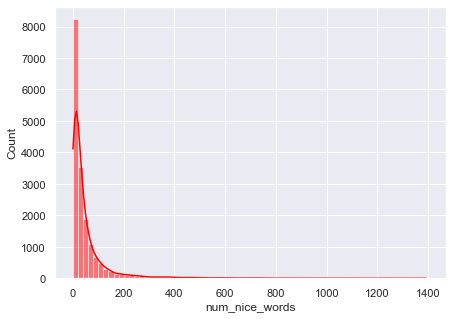

In [119]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=hosts_df, x="num_nice_words", kde=True, color="red", binwidth=20)

However, we might be more interested in the **ratio of nice words per comment**, because the number of nice words *per se* depends in part on the number of comments.

In [120]:
hosts_df['nice_words_per_review'] = hosts_df['num_nice_words']/listings_det_df['number_of_reviews']
hosts_df['nice_words_per_review'].replace([np.inf, -np.inf], 0, inplace=True)
hosts_df = hosts_df.drop(['num_nice_words'], axis=1)
hosts_df[['id', 'nice_words_per_review']]

id  nice_words_per_review
0          2818               2.338710
1          3209               1.714286
2         20168               2.150215
3         25428               3.000000
4         27886               2.257310
...         ...                    ...
17617  30435529               0.000000
17618  30439111               0.000000
17619  30518120               0.000000
17620  30525429               2.000000
17621  30550093                    NaN

[17622 rows x 2 columns]

Let's move on to some Exploratory Data Analysis now that we are done with the feature engineering.

#### Quick Exploratory Data Analysis (EDA)

Let's recap on the basic information about the dataset.

In [121]:
hosts_df.head()

id  host_response_time host_has_profile_pic host_identity_verified  \
0   2818      within an hour                    t                      f   
1   3209      within an hour                    t                      t   
2  20168  within a few hours                    t                      f   
3  25428  within a few hours                    t                      f   
4  27886      within an hour                    t                      t   

                   neighbourhood_cleansed is_location_exact property_type  \
0  Oostelijk Havengebied - Indische Buurt                 f     Apartment   
1                              Westerpark                 t     Apartment   
2                            Centrum-Oost                 t     Townhouse   
3                            Centrum-West                 f     Apartment   
4                            Centrum-West                 t     Houseboat   

         room_type  accommodates  bathrooms  ...  \
0     Private room             2        1.5  ...   
1  Entire home/apt             5        1.0  ...   
2  Entire home/apt             2        1.0  ...   
3  Entire home/apt             3        1.0  ...   
4     Private room             2        1.0  ...   

   require_guest_phone_verification  recent_reviews    success  summary_len  \
0                                 f              30   7.500000           40   
1                                 f               8   1.600000          421   
2                                 f              50   3.571429          423   
3                                 f               1   1.000000            0   
4                                 f              52  26.000000          288   

  description_len access_description  interaction_description num_host_ver  \
0            1000                  0                        0            8   
1            1000                  1                        1            4   
2            1000                  0                        1            8   
3            1000                  1                        0            3   
4            1000                  1                        1            4   

   amenities_len  nice_words_per_review  
0            701               2.338710  
1            362               1.714286  
2            345               2.150215  
3            237               3.000000  
4            347               2.257310  

[5 rows x 36 columns]

In [122]:
hosts_df.shape

(17622, 36)

We have 17662 observations and 36 different variables.

In [123]:
hosts_df.describe()

id  accommodates     bathrooms      bedrooms          beds  \
count  1.762200e+04  17622.000000  17613.000000  17615.000000  17616.000000   
mean   1.465335e+07      2.871865      1.133481      1.432529      1.835093   
std    8.272890e+06      1.285230      0.829633      0.868286      1.356264   
min    2.818000e+03      1.000000      0.000000      0.000000      0.000000   
25%    7.547061e+06      2.000000      1.000000      1.000000      1.000000   
50%    1.479683e+07      2.000000      1.000000      1.000000      1.000000   
75%    2.120904e+07      4.000000      1.000000      2.000000      2.000000   
max    3.055009e+07     17.000000    100.500000     12.000000     32.000000   

       review_scores_rating         price  guests_included  minimum_nights  \
count          17389.000000  17622.000000     17622.000000    17622.000000   
mean              94.849790    148.688798         1.495801        3.173022   
std                6.648966    137.791829         0.937378       12.421753   
min               20.000000      8.000000         1.000000        1.000000   
25%               93.000000     96.000000         1.000000        2.000000   
50%               97.000000    125.000000         1.000000        2.000000   
75%              100.000000    175.000000         2.000000        3.000000   
max              100.000000   8500.000000        16.000000     1001.000000   

       maximum_nights  recent_reviews       success   summary_len  \
count    17622.000000    17622.000000  17389.000000  17622.000000   
mean       622.631483        8.563216      2.630062    322.292532   
std        541.948398       14.568486      4.927853    137.843812   
min          1.000000        0.000000      0.000000      0.000000   
25%         21.000000        1.000000      0.048780    233.000000   
50%       1124.000000        4.000000      1.000000    306.500000   
75%       1125.000000       10.000000      3.000000    461.000000   
max       9999.000000      166.000000    146.000000   1000.000000   

       description_len  access_description  interaction_description  \
count     17622.000000        17622.000000             17622.000000   
mean        814.227556            0.637158                 0.624730   
std         291.050945            0.480833                 0.484206   
min           0.000000            0.000000                 0.000000   
25%         632.000000            0.000000                 0.000000   
50%        1000.000000            1.000000                 1.000000   
75%        1000.000000            1.000000                 1.000000   
max        1000.000000            1.000000                 1.000000   

       num_host_ver  amenities_len  nice_words_per_review  
count  17622.000000   17622.000000           17557.000000  
mean       4.739530     288.019351               6.812963  
std        1.892498     157.169385              22.877749  
min        0.000000       2.000000               0.000000  
25%        3.000000     178.000000               0.363636  
50%        4.000000     256.000000               1.500000  
75%        6.000000     363.000000               5.150000  
max       11.000000    1206.000000            1017.000000

We can see **some strange values**, such as 100.5 bathrooms (max value). We'll treat these later.

In [124]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17621
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                17622 non-null  int64  
 1   host_response_time                9612 non-null   object 
 2   host_has_profile_pic              17619 non-null  object 
 3   host_identity_verified            17619 non-null  object 
 4   neighbourhood_cleansed            17622 non-null  object 
 5   is_location_exact                 17622 non-null  object 
 6   property_type                     17622 non-null  object 
 7   room_type                         17622 non-null  object 
 8   accommodates                      17622 non-null  int64  
 9   bathrooms                         17613 non-null  float64
 10  bedrooms                          17615 non-null  float64
 11  beds                              17616 non-null  float64
 12  revi

We can see we have a mix of **objects, int64 and float64**.

Now we can make some plots. Let's **explore the cathegorical variables**, namely, those labeled as "objects" by the previous function. We can create a function to automatize this task.

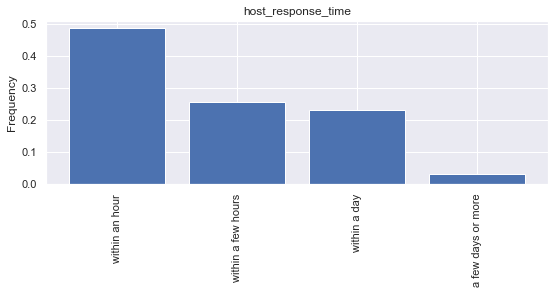

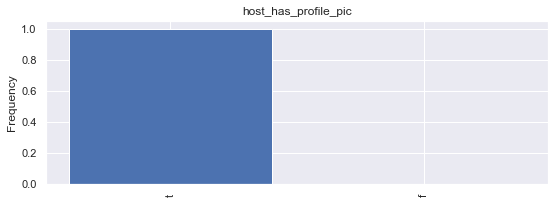

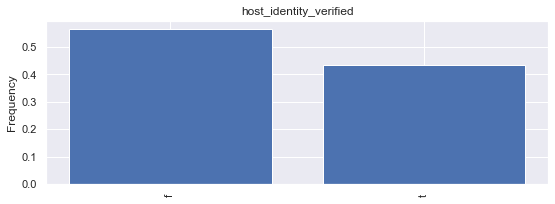

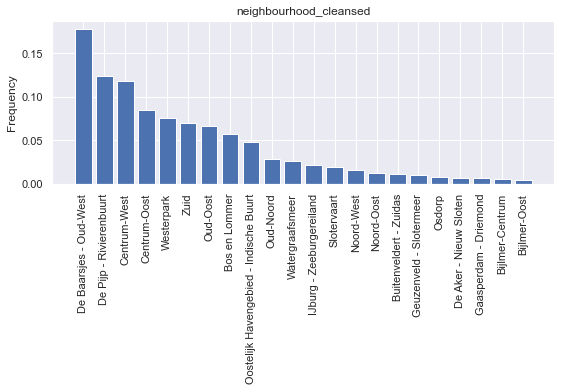

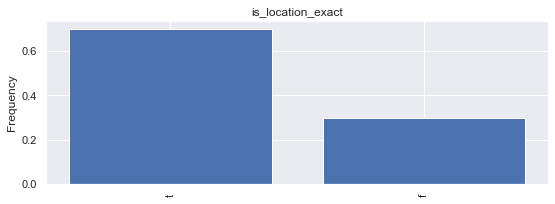

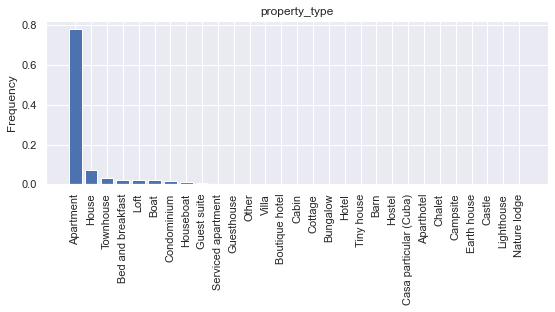

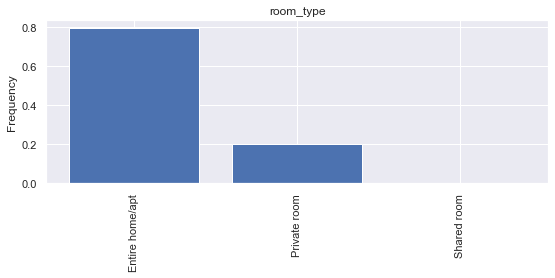

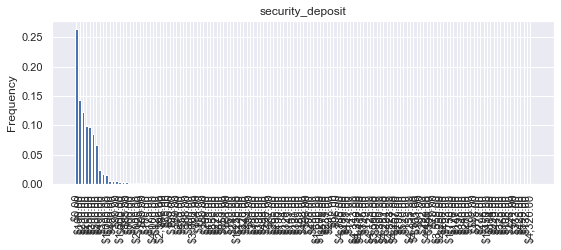

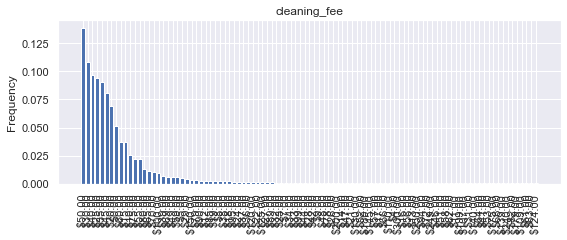

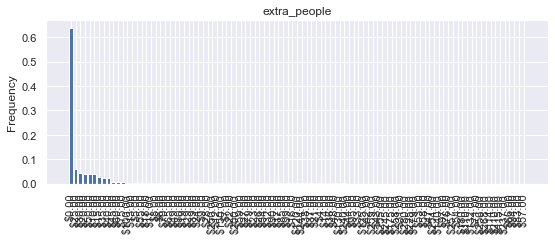

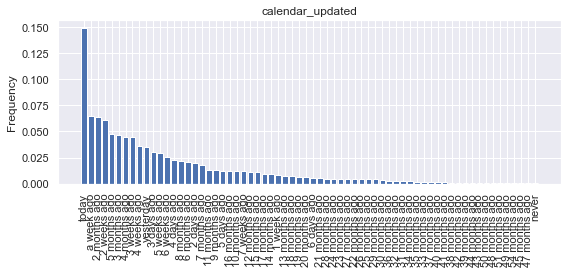

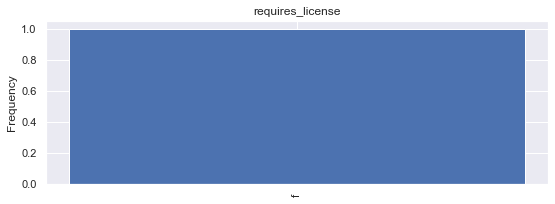

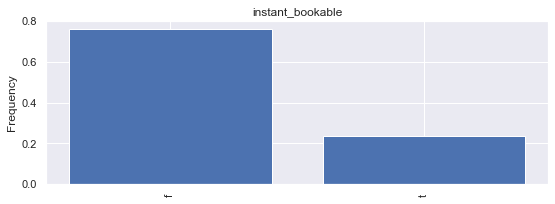

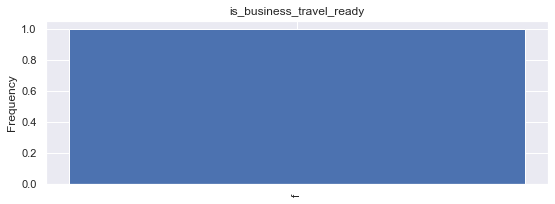

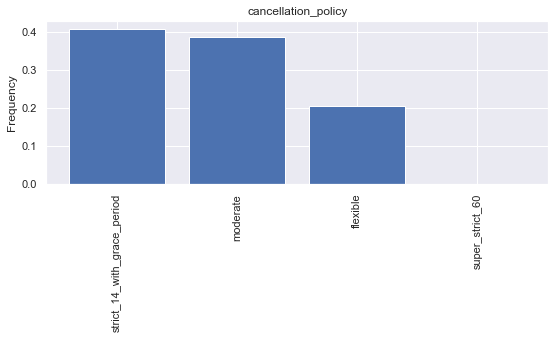

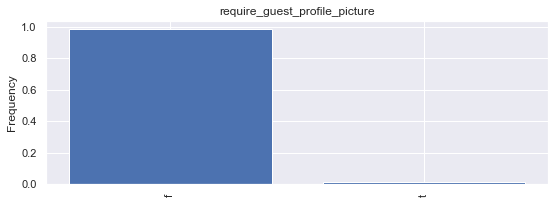

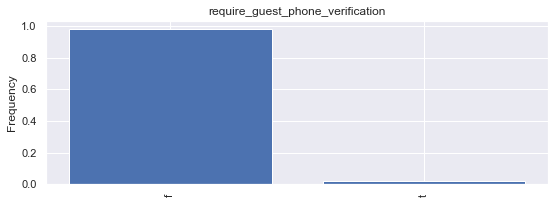

In [125]:
def bar_plot(variable, data):
    var = data[variable]
    varValue = var.value_counts(normalize=True)
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation=90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

cathegorical = ['host_response_time', 'host_has_profile_pic','host_identity_verified',
             'neighbourhood_cleansed', 'is_location_exact', 'property_type',
             'room_type', 'security_deposit', 'cleaning_fee', 'extra_people',
             'calendar_updated', 'requires_license', 'instant_bookable',
             'is_business_travel_ready', 'cancellation_policy',
             'require_guest_profile_picture', 'require_guest_phone_verification']
for c in cathegorical:
    bar_plot(variable=c, data=hosts_df)

From these plots we can see some important things:

**We will delete the following variables** because they only (or mostly) take one unique value, so they are not useful:

- host_has_profile_pic
- requires_license
- is_business_travel_ready
- require_guest_profile_picture
- require_guest_phone_verification

**We will treat the following variables as floats, and not as objects** because from the plots we can see they can (and should) be readily transformed to numerical values.

- security_deposit
- cleaning_fee
- extra_people
- calendar_updated

Let's do these things now:

First, deleting the variables mentioned above.

In [126]:
hosts_df = hosts_df.drop(['host_has_profile_pic'], axis=1)

In [127]:
hosts_df = hosts_df.drop(['requires_license'], axis=1)

In [128]:
hosts_df = hosts_df.drop(['is_business_travel_ready'], axis=1)

In [129]:
hosts_df = hosts_df.drop(['require_guest_profile_picture'], axis=1)

In [130]:
hosts_df = hosts_df.drop(['require_guest_phone_verification'], axis=1)

Now, modifying the type of the variables that should be floats.

For `security_deposit`, `cleaning_fee` and `extra_people`, we define a common custom function.

In [131]:
def convert_string(string):
    if type(string) == str:
        string = string[1:]
        if (len(string) < 8):
            return float(string)
        # We take into account the thousands comma
        else:
            string = string[:-7] + string[-6:]
            return float(string)

In [132]:
hosts_df['security_deposit'] = hosts_df['security_deposit'].apply(convert_string)

In [133]:
hosts_df['cleaning_fee'] = hosts_df['cleaning_fee'].apply(convert_string)

In [134]:
hosts_df['extra_people'] = hosts_df['extra_people'].apply(convert_string)

For `calendar_update` we will define another custom function, different from the one for the previous three attributes.

Let's check how many unique values there are, and if we can see some patterns.

In [135]:
hosts_df['calendar_updated'].unique()

array(['today', '7 weeks ago', '2 days ago', '2 months ago', 'yesterday',
       '16 months ago', '3 days ago', '2 weeks ago', '4 days ago',
       '11 months ago', '5 weeks ago', 'a week ago', '1 week ago',
       '4 weeks ago', '6 weeks ago', '4 months ago', '8 months ago',
       '6 months ago', '5 days ago', '6 days ago', '3 weeks ago',
       '7 months ago', '9 months ago', '15 months ago', '20 months ago',
       '5 months ago', '12 months ago', '25 months ago', '22 months ago',
       '3 months ago', '24 months ago', '18 months ago', '10 months ago',
       '32 months ago', '17 months ago', '13 months ago', '14 months ago',
       '42 months ago', '36 months ago', '27 months ago', '34 months ago',
       '31 months ago', '35 months ago', '19 months ago', '33 months ago',
       '21 months ago', '29 months ago', '23 months ago', '47 months ago',
       '28 months ago', '26 months ago', '37 months ago', '30 months ago',
       '41 months ago', '50 months ago', '38 months ago', '51

There are not that many unique values. We can, for example, turn them into lists, and parse them easily using the information from the previous cell (where we used the function unique).

Let's turn the values into lists first:

In [136]:
hosts_df['calendar_updated'] = hosts_df['calendar_updated'].apply(lambda x: x.split())

In [137]:
hosts_df['calendar_updated']

0                [today]
1        [7, weeks, ago]
2                [today]
3         [2, days, ago]
4                [today]
              ...       
17617            [today]
17618     [5, days, ago]
17619            [today]
17620            [today]
17621            [today]
Name: calendar_updated, Length: 17622, dtype: object

Now, let's define the function:

In [138]:
def calendar_transform(element):
    if len(element)==1:
        if element[0]=='today':
            return 0
        elif element[0]=='yesterday':
            return 1
        else:
            return 10000
    else:
        if element[0]=='a':
            days=1
        else:
            days=int(element[0])
        if element[1]=='days':
            return days
        elif element[1]=='weeks':
            return days*7
        else:
            return days*30

And let's apply it:

In [139]:
hosts_df['calendar_updated'] = hosts_df['calendar_updated'].apply(calendar_transform)

Let's move on with the EDA. Now we will generate some **more plots**. This time for the **numerical variables**.

We will use a similar technique as with the cathegorical variables in order to automatize this process, namely, programming a function.

In [140]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17621
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       17622 non-null  int64  
 1   host_response_time       9612 non-null   object 
 2   host_identity_verified   17619 non-null  object 
 3   neighbourhood_cleansed   17622 non-null  object 
 4   is_location_exact        17622 non-null  object 
 5   property_type            17622 non-null  object 
 6   room_type                17622 non-null  object 
 7   accommodates             17622 non-null  int64  
 8   bathrooms                17613 non-null  float64
 9   bedrooms                 17615 non-null  float64
 10  beds                     17616 non-null  float64
 11  review_scores_rating     17389 non-null  float64
 12  price                    17622 non-null  float64
 13  security_deposit         12538 non-null  float64
 14  cleaning_fee          

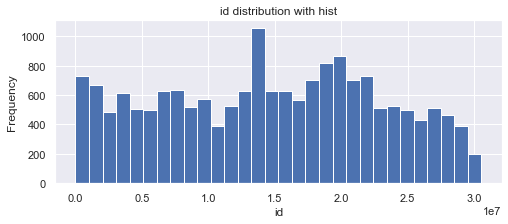

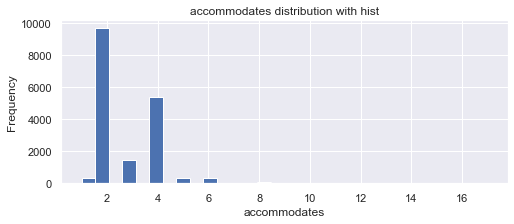

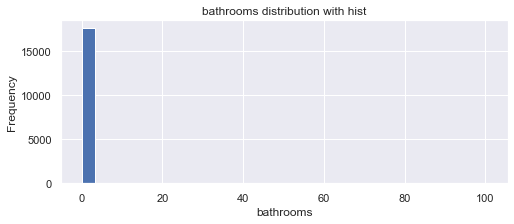

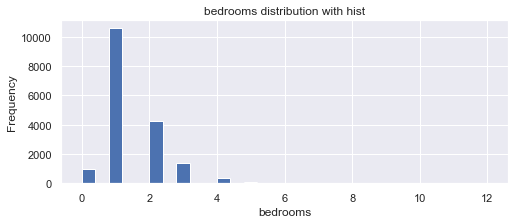

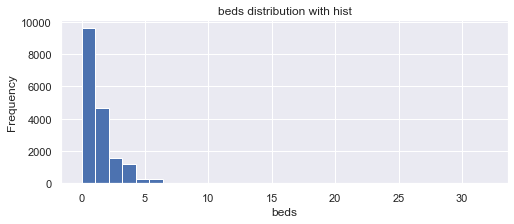

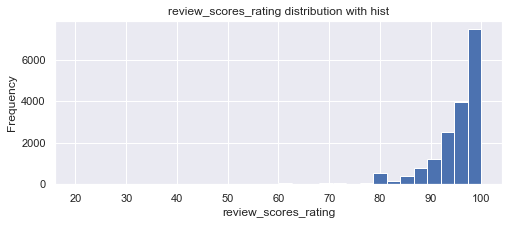

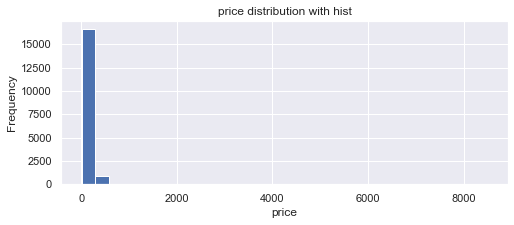

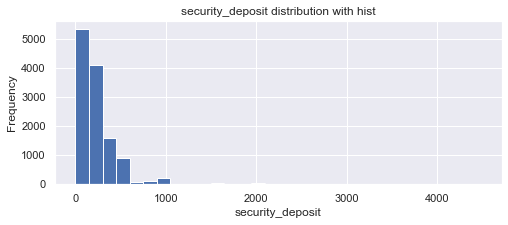

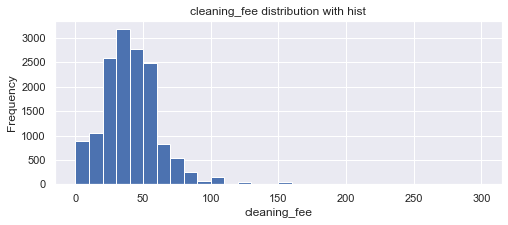

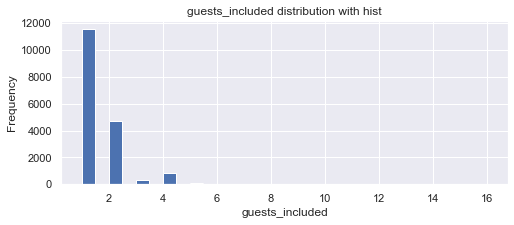

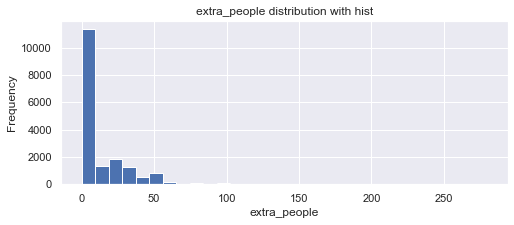

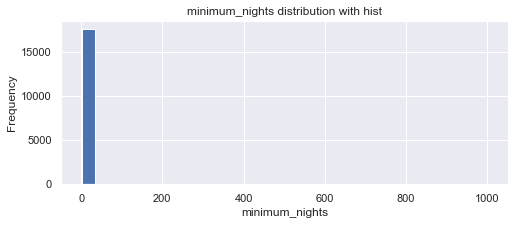

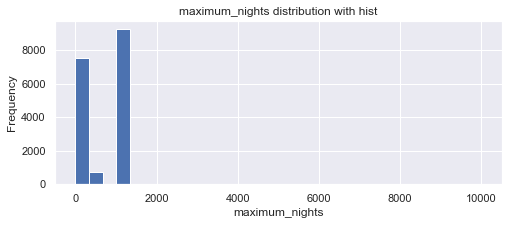

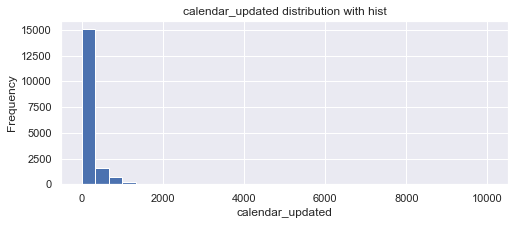

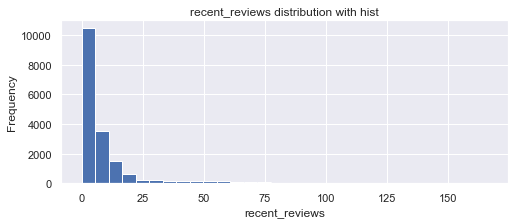

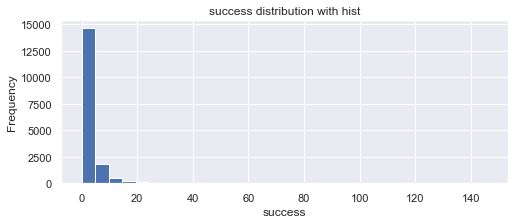

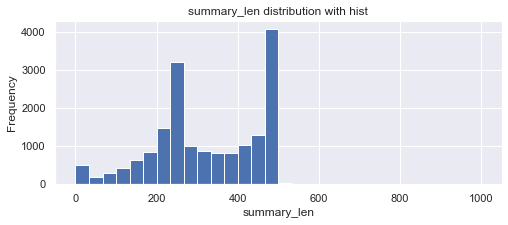

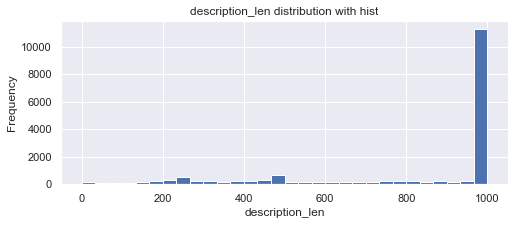

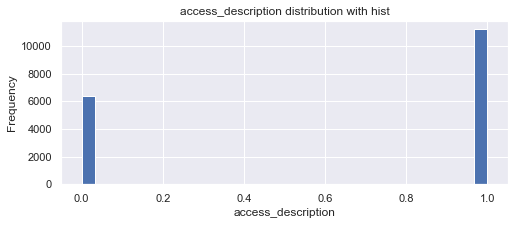

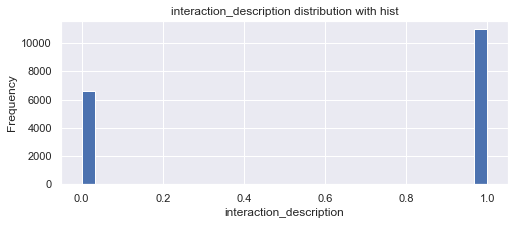

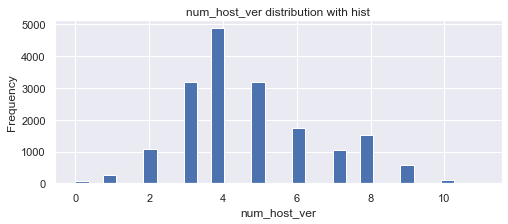

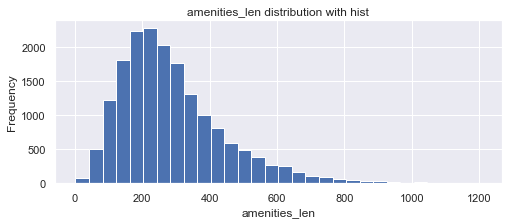

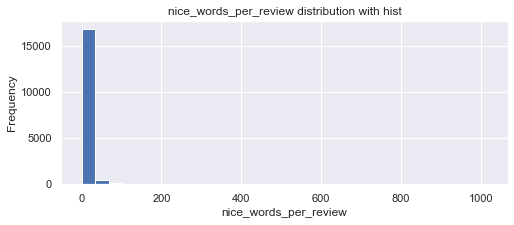

In [141]:
def plot_hist(variable):
    plt.figure(figsize = (8,3))
    plt.hist(hosts_df[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

for n in hosts_df.columns:
    if is_numeric_dtype(hosts_df[n]):
        plot_hist(n)

From these plots we can highlight some gaussian-shaped distributions: the ones of `amenities_len`, `num_host_ver` and `cleaning_fee`. The rest of the distributions don't have that much variance, and we see `minimum_nights` and `bathrooms` clearly contain some type of outlier. We will treat them soon. Also, we note that we have already seen some of these distributions previously in answering other questions.

Now let's analyse the **correlations between the variables** using a heatmap.

<AxesSubplot:>

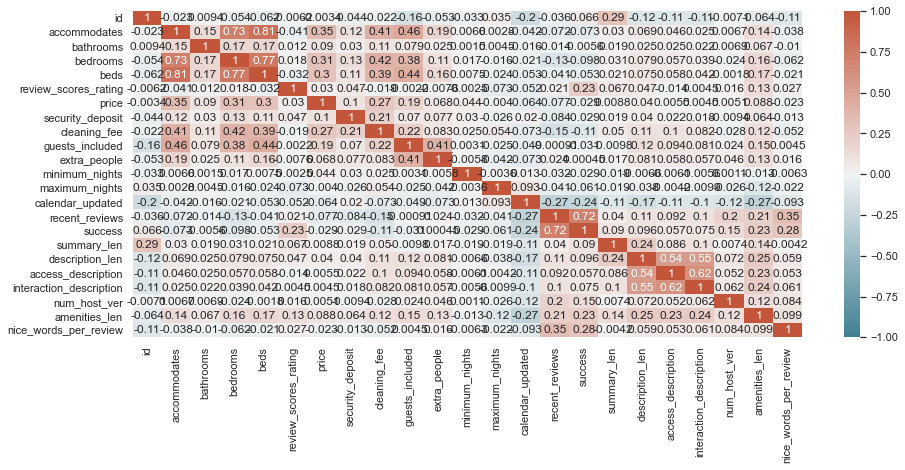

In [142]:
cerrlation = hosts_df.corr()
sns.set(rc={'figure.figsize':(15,6)})
plt.figure()
sns.heatmap(cerrlation, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can extract some relevant information from the heatmap:

**Correlations with the target ("success")**

- `recent_reviews` (0.72): It is the **highest correlated with the target** by far. This is because it is measuring something similar to the target variable. One could argue that the same information is being used to calculate both this attribute and the target, which would invalidate it, and this is in part true; some information is the same in both attributes. However, they're (in my opinion), different enough as to keep recent_reviews. It is not necessarily true that more recent reviews would imply a lot of well-rated reviews overall. But the high correlation between this attribute and the target is indicating us that there is in fact some correlation between these two outcomes.


- `nice_words_per_review` (0.28): It is interesting that this attribute is correlated. This supports the intuition that **nicer reviews are correlated with more "success"**.


- `calendar_updated` (-0.24): A negative correlation, meaning that **the more days ago the calendar was updated, the less likely it is to have success** (as we defined it) as a host.


- `amenities_len` (0.23): It makes perfect sense that the **more amenities an experience has, the more likely it is to be successful**. Amenities include, for example, "Internet", "TV", "Kitchen", "Hair dryer", among others.


- `review_scores_rating` (0.23): This variable is, naturally, correlated with the target, since it was used to define it. For this reason **we won't keep it**. However, it is interesting to note that **it is not as highly correlated as one could expect**. For example, we could've expected `recent_reviews` to be less correlated with the target than `review_socres_rating`. This is telling us that **`recent_reviews` is more important than we thought**. Put it simply: that having recent reviews means you're probably doing well as a host.


- `num_host_ver` (0.15): The attribute is not very correlated, but still, it stands out from most of the others. This is telling us that **the higher the number of verifications the host hast, the more likely it is for the host to be successful**. It is very reasonable.


- `cleaning_fee` (-0.11): Perhaps surprisingly, as it was not completely clear whether this correlation would come out to be positive or negative, **having a higher cleaning fee might indicate less "success"**.

**Other correlations between variables that are not the target**

- `beds` - `accommodates` (0.81): It makes sense that the more people an experience is able to give lodging to, the higher the number of beds.


- `bedrooms` - `accommodates` (0.77): For the same reason as before, it makes sense that these two variables are correlated.


- `beds` - `bedrooms` (0.73): A bedrooms usually has a bed, so it makes perfect sense that the more bedrooms, the more beds.


- `interaction_description` - `access_description` (0.66) and
- `interaction_description` - `description_len` (0.55) and
- `access_description` - `description_len` (0.54): all of the previous correlations involve descriptions. It makes sense for them to be correlated: if the host isn't willing to write one of the descriptions, it is likely that the host won't be willing to write the others either.

Some of the previous relations are certainly high, but not high enough as to considering removing one of the variables, so we will keep them all.

We remove `review_scores_rating` as commented above.

In [143]:
hosts_df = hosts_df.drop(['review_scores_rating'], axis=1)

Now it's high time to **treat the outliers**.

#### Outlier detection

In order to quickly calculate whether there is an outlier or not, we will **use the method called IQR** (Interquartile range), which is a common way to identify outliers in statistical data. The IQR is calculated by **finding the difference between the 75th percentile and the 25th percentile of a data set**. This value is then used to determine if any values in the data set are outside of a certain range, which is defined as the IQR multiplied by a constant (usually 1.5) plus or minus the 75th and 25th percentiles. In our case, we will use the 1.5 as the constant.

In [144]:
outliers_list = []

numericvars = []
for variable in hosts_df.columns:
    if is_numeric_dtype(hosts_df[variable]):
        numericvars.append(variable)

for variable in numericvars:
    Q1 , Q3 = np.percentile(hosts_df[variable], [25,75])
    IQR = Q3 - Q1
    out = list((hosts_df[variable] > Q3 + 1.5*IQR) | (hosts_df[variable] < Q1 - 1.5*IQR))
    outliers_list.append(out)


outliers_list = list(map(list, zip(*outliers_list)))
outliers = pd.DataFrame(outliers_list, columns=numericvars)
outliers

id  accommodates  bathrooms  bedrooms   beds  price  \
0      False         False      False     False  False  False   
1      False         False      False     False  False  False   
2      False         False      False     False  False  False   
3      False         False      False     False  False  False   
4      False         False      False     False  False  False   
...      ...           ...        ...       ...    ...    ...   
17617  False         False      False     False  False  False   
17618  False         False      False     False  False  False   
17619  False         False      False     False  False  False   
17620  False         False      False     False  False  False   
17621  False         False      False     False  False  False   

       security_deposit  cleaning_fee  guests_included  extra_people  ...  \
0                 False         False            False         False  ...   
1                 False         False            False         False  ...   
2                 False         False            False         False  ...   
3                 False         False            False         False  ...   
4                 False         False            False         False  ...   
...                 ...           ...              ...           ...  ...   
17617             False         False            False         False  ...   
17618             False         False            False         False  ...   
17619             False         False            False         False  ...   
17620             False         False            False         False  ...   
17621             False         False            False         False  ...   

       calendar_updated  recent_reviews  success  summary_len  \
0                 False            True    False        False   
1                 False           False    False        False   
2                 False            True    False        False   
3                 False           False    False        False   
4                 False            True    False        False   
...                 ...             ...      ...          ...   
17617             False           False    False        False   
17618             False           False    False        False   
17619             False           False    False        False   
17620             False           False    False        False   
17621             False           False    False        False   

       description_len  access_description  interaction_description  \
0                False               False                    False   
1                False               False                    False   
2                False               False                    False   
3                False               False                    False   
4                False               False                    False   
...                ...                 ...                      ...   
17617            False               False                    False   
17618            False               False                    False   
17619             True               False                    False   
17620            False               False                    False   
17621            False               False                    False   

       num_host_ver  amenities_len  nice_words_per_review  
0             False           True                  False  
1             False          False                  False  
2             False          False                  False  
3             False          False                  False  
4             False          False                  False  
...             ...            ...                    ...  
17617         False          False                  False  
17618         False          False                  False  
17619         False          False                  False  
17620         False          False                  False  
17621     

In [145]:
for variable in numericvars:
    print(variable+':', hosts_df[outliers[variable]].shape[0])

id: 0
accommodates: 136
bathrooms: 0
bedrooms: 0
beds: 0
price: 986
security_deposit: 0
cleaning_fee: 0
guests_included: 974
extra_people: 518
minimum_nights: 1703
maximum_nights: 1
calendar_updated: 2335
recent_reviews: 1439
success: 0
summary_len: 20
description_len: 266
access_description: 0
interaction_description: 0
num_host_ver: 17
amenities_len: 614
nice_words_per_review: 0


Of course, **this method is not perfect**, and **a visual inspection of the data will help us identify the "true" outliers**. That's what we'll do next. We'll define a function and then plot the data points for every attribute whose number of outliers detected is greater than 0.

In [146]:
def visualize_outlier(variable, dataset, outliers):
    plotdata = pd.DataFrame({'index': [i for i in range(dataset.shape[0])], 'value': dataset[variable], 'outlier_boolean': outliers[variable]})
    sns.set(rc={'figure.figsize':(9,5)})
    sns.scatterplot(data=plotdata, x='index', y='value', hue="outlier_boolean", palette=['blue','red']).set(title=variable)

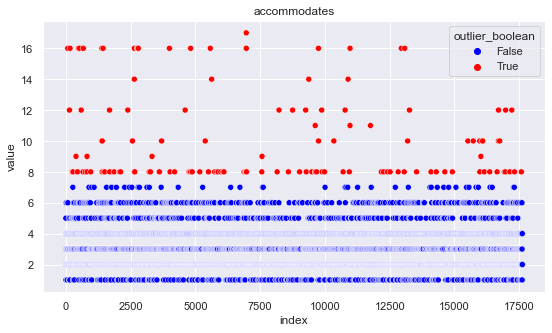

In [147]:
visualize_outlier('accommodates', hosts_df, outliers)

The maximum amount of accomodates is about 16. This is a very reasonable number of accomodates, so **we keep these data points**.

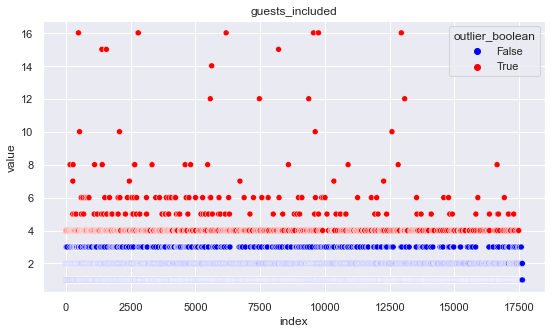

In [148]:
visualize_outlier('guests_included', hosts_df, outliers)

The distribution of data points is similar to the one corresponding to `accommodates` and, again, the number maximum number of guests included is apparently 16. This is okay, so **we keep the data points**.

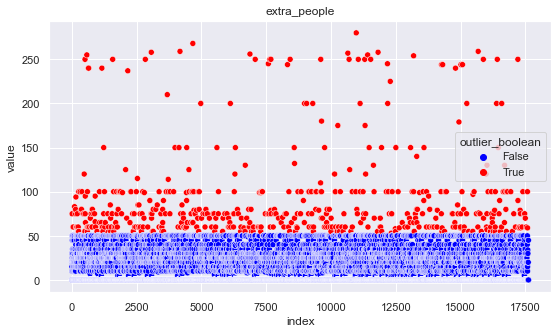

In [149]:
visualize_outlier('extra_people', hosts_df, outliers)

It feels **strange to allow more than 250 extra people** to an experience. Let's **inspect closely** what these rows are about in the dataset:

In [150]:
hosts_df[hosts_df['extra_people'] >= 258]

id  host_response_time host_identity_verified  \
3064    5260611      within an hour                      t   
4172    7198483                 NaN                      f   
4668    7961030                 NaN                      t   
10974  18322100  within a few hours                      f   
11817  19385981      within an hour                      t   
15681  25595762                 NaN                      f   

        neighbourhood_cleansed is_location_exact property_type  \
3064                  Oud-Oost                 f     Apartment   
4172             Bos en Lommer                 f     Apartment   
4668           Watergraafsmeer                 t     Apartment   
10974                Oud-Noord                 t     Apartment   
11817  De Pijp - Rivierenbuurt                 f     Apartment   
15681  De Pijp - Rivierenbuurt                 t     Apartment   

             room_type  accommodates  bathrooms  bedrooms  ...  \
3064   Entire home/apt             4        1.0       2.0  ...   
4172   Entire home/apt             3        1.0       1.0  ...   
4668   Entire home/apt             4        1.0       3.0  ...   
10974     Private room             4        1.0       1.0  ...   
11817  Entire home/apt             2        1.0       1.0  ...   
15681  Entire home/apt             2        1.0       1.0  ...   

               cancellation_policy  recent_reviews   success  summary_len  \
3064   strict_14_with_grace_period               7  3.500000          239   
4172   strict_14_with_grace_period               0  0.000000          418   
4668   strict_14_with_grace_period               4  2.000000          244   
10974                     flexible              43  8.600000          235   
11817  strict_14_with_grace_period               7  0.538462          484   
15681                     moderate               7  7.000000          443   

       description_len  access_description  interaction_description  \
3064              1000                   1                        1   
4172              1000                   1                        1   
4668               699                   1                        1   
10974             1000                   1                        1   
11817             1000                   1                        1   
15681             1000                   1                        1   

       num_host_ver  amenities_len nice_words_per_review  
3064              6            403              0.261261  
4172              3            207              0.000000  
4668              4            213              5.611111  
10974             8            433             10.500000  
11817             6            426              1.937500  
15681             7            183             13.000000  

[6 rows x 30 columns]

The rest of the data appears to be normal. So since we don't have any extra reasons to delete the rows corresponding to these values, we will **keep them**.

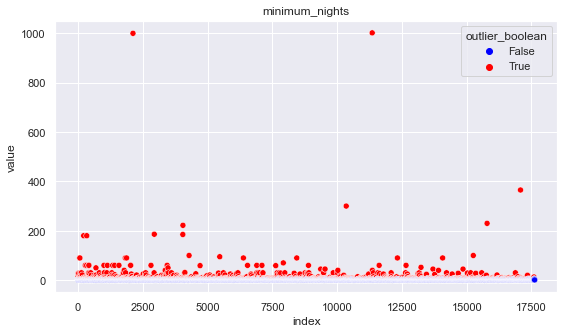

In [151]:
visualize_outlier('minimum_nights', hosts_df, outliers)

The number of minimum nights to be more than 200 is clearly strange. Let's **explore closely what this observations are**:

In [152]:
hosts_df[hosts_df['minimum_nights'] >= 180]

id  host_response_time host_identity_verified  \
218      414917                 NaN                      t   
336      588059        within a day                      f   
2121    3445095                 NaN                      t   
2943    4985612                 NaN                      t   
4045    6971057                 NaN                      f   
4049    6980353                 NaN                      t   
10351  17452735      within an hour                      f   
11354  18816109      within an hour                      t   
15788  25900530                 NaN                      f   
17078  28651212  within a few hours                      f   

        neighbourhood_cleansed is_location_exact property_type  \
218               Centrum-Oost                 t     Apartment   
336               Centrum-Oost                 t   Condominium   
2121    De Baarsjes - Oud-West                 f     Apartment   
2943                Westerpark                 f     Apartment   
4045              Centrum-West                 t     Apartment   
4049    De Baarsjes - Oud-West                 t     Apartment   
10351                     Zuid                 t   Condominium   
11354  De Pijp - Rivierenbuurt                 t     Apartment   
15788   De Aker - Nieuw Sloten                 t         House   
17078   De Baarsjes - Oud-West                 t     Apartment   

             room_type  accommodates  bathrooms  bedrooms  ...  \
218    Entire home/apt             4        2.0       2.0  ...   
336    Entire home/apt             4        1.0       2.0  ...   
2121   Entire home/apt             2        1.0       2.0  ...   
2943   Entire home/apt             2        1.5       1.0  ...   
4045   Entire home/apt             4        1.0       2.0  ...   
4049   Entire home/apt             6        1.0       3.0  ...   
10351  Entire home/apt             2        1.0       1.0  ...   
11354     Private room             4        1.0       2.0  ...   
15788     Private room             2        2.0       1.0  ...   
17078  Entire home/apt             3        1.0       1.0  ...   

               cancellation_policy  recent_reviews   success  summary_len  \
218    strict_14_with_grace_period               0  0.000000          244   
336    strict_14_with_grace_period               0  0.000000          305   
2121   strict_14_with_grace_period               0  0.000000          249   
2943   strict_14_with_grace_period               0  0.000000          222   
4045   strict_14_with_grace_period               0  0.000000          247   
4049   strict_14_with_grace_period               0  0.000000          139   
10351                     flexible               0  0.000000          274   
11354                     moderate              23  2.555556          209   
15788                     flexible               3  0.073171          416   
17078                     moderate              10  2.000000          269   

       description_len  access_description  interaction_description  \
218               1000                   1                        1   
336               1000                   1                        1   
2121              1000                   1                        1   
2943              1000                   1                        1   
4045              1000                   0                        1   
4049              1000                   1                        1   
10351              274                   0                        0   
11354              209                   0                        0   
15788              889                   0                        0   
17078              269                   0                        0   

       num_host_ver  amenities_len nice_words_per_review  
218               4            329             42.285714  
336               3            626             31.250000  
2121              4            248              0.377778  
2943      

The rest of the data appears to be normal-looking.


Let's check if the the number of minimum nights and the number of maximum nights is coherent.

In [153]:
hosts_df[hosts_df['minimum_nights'] >= 180][['minimum_nights', 'maximum_nights']]

minimum_nights  maximum_nights
218               180             365
336               180             365
2121              999            1125
2943              186             365
4045              185             364
4049              222            1125
10351             300             500
11354            1001            1125
15788             230            1125
17078             365            1125

The are coherent (perhaps surprisingly), so **we conclude that the hosts haven't made a mistake** in setting the number of minimum nights to be this high. Otherwise they would've had to make a double mistake (high number of minimum nights and high number of maximum nights, by error). So, since we don't have any further reaon to delete these observations, we **keep them**.

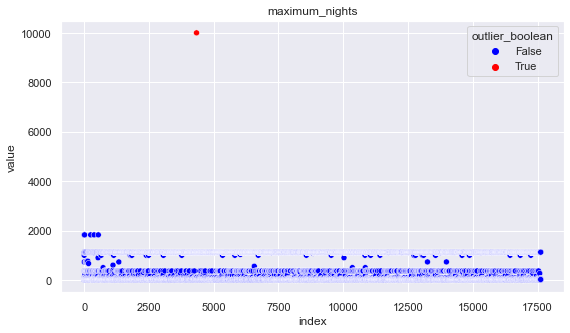

In [154]:
visualize_outlier('maximum_nights', hosts_df, outliers)

There's a clear outlier for this attribute, let's see what the rest of the columns look like for this observation:

In [155]:
hosts_df[hosts_df['maximum_nights'] >= 5000]

id host_response_time host_identity_verified  \
4337  7447773                NaN                      t   

     neighbourhood_cleansed is_location_exact property_type        room_type  \
4337            Slotervaart                 t     Apartment  Entire home/apt   

      accommodates  bathrooms  bedrooms  ...  cancellation_policy  \
4337             3        1.0       2.0  ...             flexible   

      recent_reviews  success  summary_len  description_len  \
4337               0      0.0          289             1000   

      access_description  interaction_description  num_host_ver  \
4337                   1                        1             4   

      amenities_len nice_words_per_review  
4337            359              3.666667  

[1 rows x 30 columns]

The rest of the columns look normal, so we don't have any extra reason to delete this observation. The host might very well have decided to set the number of maximum nights this high. Therefore, we **keep this observation**.

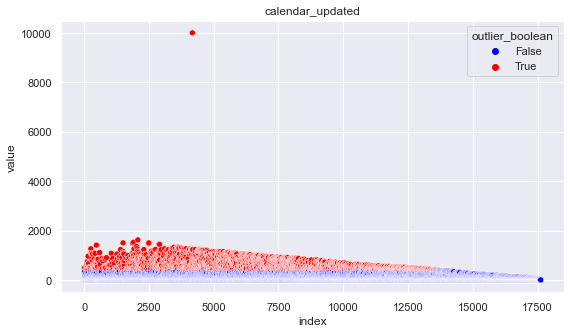

In [156]:
visualize_outlier('calendar_updated', hosts_df, outliers)

The outlier we see with a value of 10000 must be the observation we set ourselves to 10000 when we transformed the original values of `calendar_updated`. The function we defined for this task, assigned 10000 to those observation whose `calendar_updated` value was "never". It is not an outlier, simply a very uncommon value. The rest of the outliers that have been detected are clearly not real outliers, since the increment in their value is steady and very much continuous-looking. So we **keep the data points**.

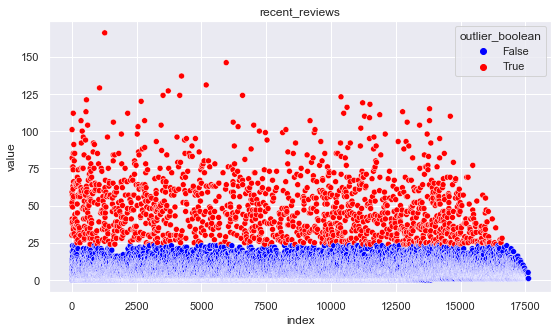

In [157]:
visualize_outlier('recent_reviews', hosts_df, outliers)

We don't see any clear candidate to be a "true" outlier, simply high-but-sensible values. So we **keep the data points**.

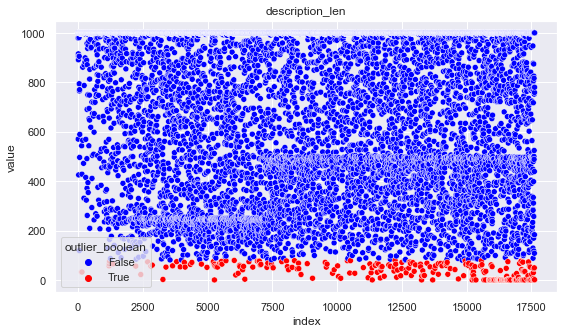

In [158]:
visualize_outlier('description_len', hosts_df, outliers)

The distribution is continous-looking and there's no real reason to believe the red data points are true outliers. Therefore, we **keep the data points**.

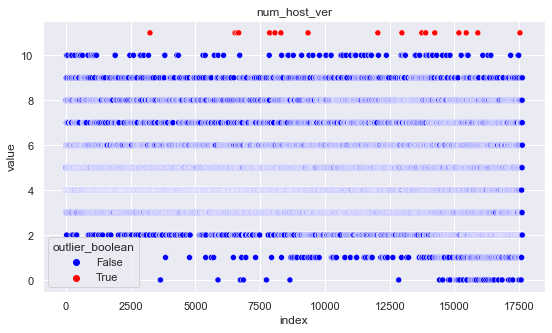

In [159]:
visualize_outlier('num_host_ver', hosts_df, outliers)

The highest value are about 10, which makes sense for a number of host verifications, so we **keep the data points**.

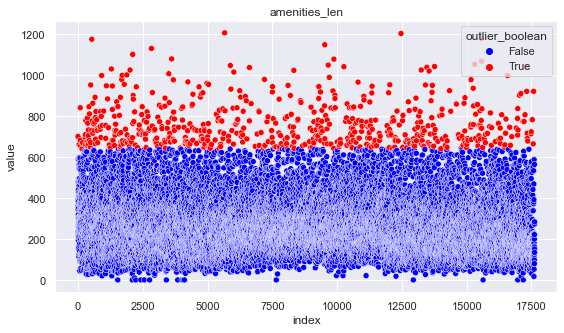

In [160]:
visualize_outlier('amenities_len', hosts_df, outliers)

There are no major signs of "true" outliers. The range of values makes sense, since we are counting the number of characters of a description. So we **keep the data points**.

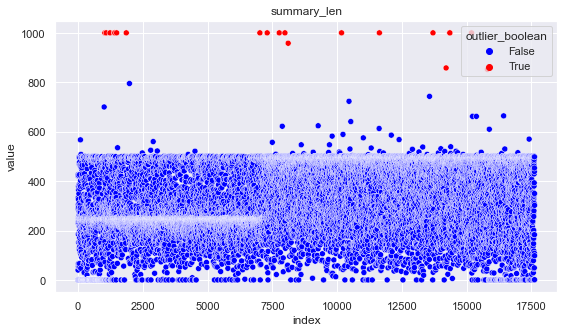

In [161]:
visualize_outlier('summary_len', hosts_df, outliers)

The range of values is within reasonable limits, since the attribute is counting the amount of characters in a string used to keep the summary of the experience. For this reason, we **keep the values**.

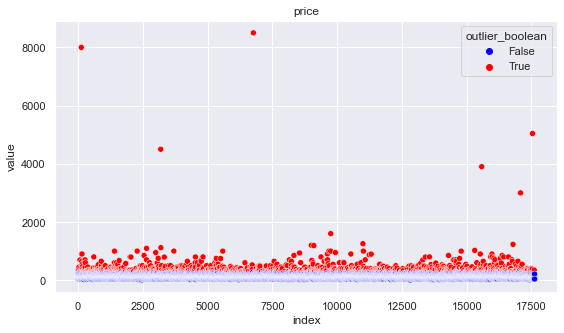

In [162]:
visualize_outlier('price', hosts_df, outliers)

Even though 3000-8000 dollars per night is for most people extremely expensive, it is **still plausible that some experiences in Airbnb are this much luxurious**. However, **let's check** if the rest of the columns for these observations look okay:

In [163]:
hosts_df[hosts_df['price'] >= 2000]

id  host_response_time host_identity_verified  \
126      258273                 NaN                      f   
3191    5587500        within a day                      f   
6768   12213707                 NaN                      f   
15580  25349319  within a few hours                      t   
17078  28651212  within a few hours                      f   
17543  29926643      within an hour                      f   

        neighbourhood_cleansed is_location_exact property_type  \
126    De Pijp - Rivierenbuurt                 t     Apartment   
3191                 Oud-Noord                 f         Other   
6768                  Oud-Oost                 f     Apartment   
15580                     Zuid                 t     Apartment   
17078   De Baarsjes - Oud-West                 t     Apartment   
17543             Centrum-West                 t     Apartment   

             room_type  accommodates  bathrooms  bedrooms  ...  \
126    Entire home/apt             4        1.0       1.0  ...   
3191   Entire home/apt             6        3.0       3.0  ...   
6768   Entire home/apt             2        1.0       1.0  ...   
15580  Entire home/apt             6        1.5       3.0  ...   
17078  Entire home/apt             3        1.0       1.0  ...   
17543  Entire home/apt             2        1.0       0.0  ...   

               cancellation_policy  recent_reviews  success  summary_len  \
126                       moderate               0      0.0            0   
3191   strict_14_with_grace_period               0      0.0          103   
6768   strict_14_with_grace_period               0      0.0            1   
15580                     flexible               1      NaN          497   
17078                     moderate              10      2.0          269   
17543                     flexible               3      3.0          233   

       description_len  access_description  interaction_description  \
126               1000                   0                        0   
3191              1000                   1                        1   
6768               695                   1                        1   
15580             1000                   0                        0   
17078              269                   0                        0   
17543              821                   1                        1   

       num_host_ver  amenities_len nice_words_per_review  
126               4             49              2.500000  
3191              5            340              0.636364  
6768              6            228              1.100000  
15580             7            376              0.000000  
17078             2             80              5.500000  
17543             2            170              2.000000  

[6 rows x 30 columns]

They look okay, so we will **keep the data points**

Finally, for some reason the function to detect outliers hasn't detected that one observation had a fractional amount of bathrooms. In particular, it's the following observation:

In [164]:
hosts_df[hosts_df['bathrooms'] >= 20]

id host_response_time host_identity_verified  \
9049  15199899     within an hour                      f   

      neighbourhood_cleansed is_location_exact property_type        room_type  \
9049  De Aker - Nieuw Sloten                 t     Apartment  Entire home/apt   

      accommodates  bathrooms  bedrooms  ...          cancellation_policy  \
9049             4      100.5       1.0  ...  strict_14_with_grace_period   

      recent_reviews  success  summary_len  description_len  \
9049              21     5.25          274              613   

      access_description  interaction_description  num_host_ver  \
9049                   1                        1             4   

      amenities_len nice_words_per_review  
9049            730              4.026316  

[1 rows x 30 columns]

Since this is clearly an outlier, we will change the value to 1, for example.

In [165]:
hosts_df = hosts_df[hosts_df.bathrooms != 100.5]

We are done with the outlier detection. Let's move on to the following task.

#### Missing data handling

Let's see how many data is missing in our dataset.

<AxesSubplot:>

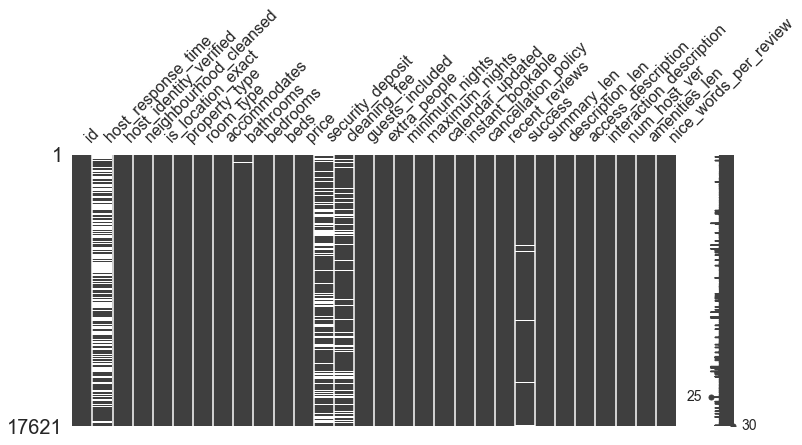

In [166]:
msno.matrix(hosts_df, figsize=(12, 5))

Fortunately, **most of the columns are complete**. But there are **some where there seems to be many missing data**. In order to see what fraction of data is missing, let's generate a different kind of plot, where we can see the fraction of missing data per attribute.

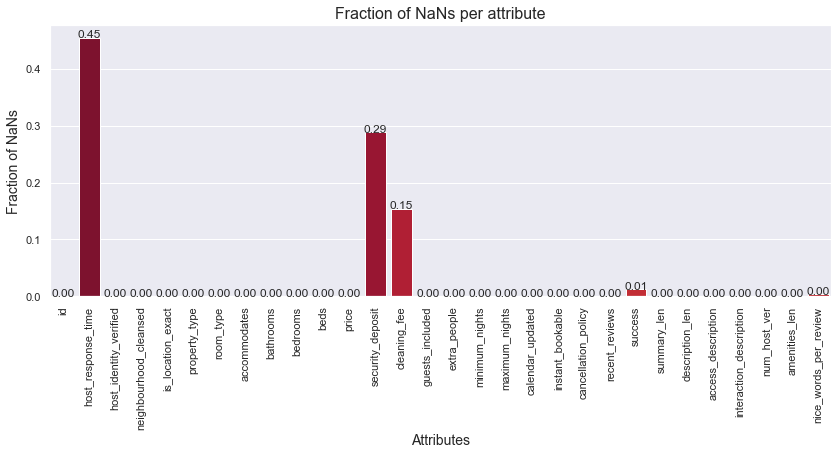

In [167]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

nansdata = hosts_df.isnull().sum()/len(hosts_df)
sns.set(rc={'figure.figsize':(14,5)})
sns.set(color_codes=True)
rank = [int((max(nansdata.values)-elem)*len(nansdata)*0.75/(max(nansdata.values)+1)) for elem in nansdata.values] 
pal = sns.color_palette("YlOrRd",len(nansdata))
ax = sns.barplot(x=nansdata.index, y=nansdata, palette=np.array(pal[::-1])[rank])
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Fraction of NaNs", fontsize=14)
plt.title('Fraction of NaNs per attribute', fontsize=16)
plt.xticks(rotation=90)
show_values_on_bars(ax)

plt.show()

There are **mainly 3 attributes with missing data**. However, we can see small fractions of data missing too for other attributes. Let's calculate with precision which ones are affected, and by how much.

In [168]:
atrs = []
frac = []
vals = []

for atr in range(len(nansdata)):
    if nansdata.values[atr] > 0:
        atrs.append(nansdata.index[atr])
        frac.append(float(str(nansdata.values[atr]*100)[0:7]))
        vals.append(hosts_df[nansdata.index[atr]].isnull().sum())

x = PrettyTable()
x.add_column("Attributes", atrs)
x.add_column("% of NaNs", frac)
x.add_column("Amount of NaNs", vals)
print(x)

+------------------------+-----------+----------------+
|       Attributes       | % of NaNs | Amount of NaNs |
+------------------------+-----------+----------------+
|   host_response_time   |  45.4571  |      8010      |
| host_identity_verified |  0.01702  |       3        |
|       bathrooms        |  0.05107  |       9        |
|        bedrooms        |  0.03972  |       7        |
|          beds          |  0.03405  |       6        |
|    security_deposit    |  28.8519  |      5084      |
|      cleaning_fee      |  15.3907  |      2712      |
|        success         |  1.32228  |      233       |
| nice_words_per_review  |  0.36887  |       65       |
+------------------------+-----------+----------------+


It is clear now which attributes suffer from missing data. In total, there are **9 attributes where there is missing data**, but most of them only lack a very small percentage. To fix this, we will **do some imputation** or **delete some attributes** altogether. Next we explain the strategy for each attribute:

**Column deletions**

- `host_response_time`: We will **delete** it, since it contains too many NaNs (>45%).
- `security_deposit`: We will **delete** it. It contains less NaNs than the previous attribute (>28%), but it is probably not worth it to do imputation, since it wasn't that correlated with the target anyway (0.03 corr. coef.).

**Row deletions**

- `success`: We can't allow missing values on the target variable, so we will **delete the 233 rows** corresponding to these missing values in the target variable.

**Imputation for numerical attributes**

- `bathroom`, `nice_words_per_review`, `bedrooms`, `beds`: These attributes only lack about 1% of the data, and their correlation with the target is not that high, so we don't have to worry too much about the method of imputation. However, we can use a relatively good method, namely the **Iterative Imputer**.

- `cleaning_fee`: This is a more delicate attribute. It contains a relatively high amount of NaNs (>15%), AND is also relatively high correlated with other vairables. So we will be careful and **try 3 different imputation methods and then compare** the distribution of the attribute before and after each imputation. Then, we will select the best imputer.

**Imputation for cathegorical variables**

- `host_identity_verified`: This one only lacks 3 values, so we will simply imput the most frequent values.

First, the **row deletions**:

In [169]:
hosts_df = hosts_df[hosts_df['success'].notna()]

In [170]:
hosts_df['success'].isnull().sum()

0

Next, the **column deletions**:

In [171]:
hosts_df = hosts_df.drop(['host_response_time', 'security_deposit'], axis=1)

In [172]:
if not(('host_response_time' in hosts_df.columns) or 'security_deposit' in hosts_df.columns):
    print('host_response_time and security_deposit are NO LONGER in the dataset')
else:
    print('host_response_time and security_deposit are STILL in the dataset')

host_response_time and security_deposit are NO LONGER in the dataset


Now, the first **numerical variables imputations** using the Iterative Imputer.

In [173]:
numeric_imp = ['bathrooms', 'bedrooms', 'beds', 'nice_words_per_review']
iter_imputer = IterativeImputer(random_state=42)
hosts_df[numeric_imp] = iter_imputer.fit_transform(hosts_df[numeric_imp])

In [174]:
hosts_df[numeric_imp].isnull().sum()

bathrooms                0
bedrooms                 0
beds                     0
nice_words_per_review    0
dtype: int64

Now, in order to choose the imputation method for the attribute `cleaning_fee`, we will try 3 different imputers:
- Iterative Imputer
- KNN Imputer using 2 neighbours
- KNN Imputer using 4 neighbours

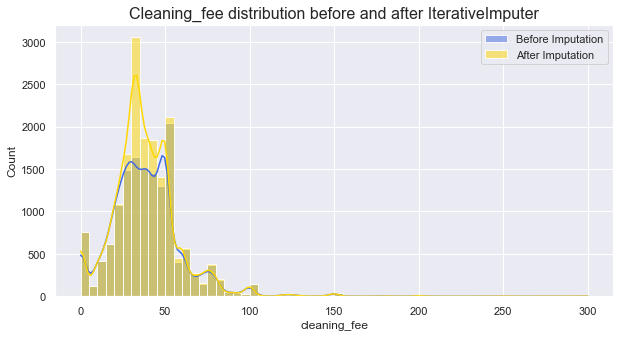

In [175]:
aux_df = hosts_df.copy()

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="royalblue", label="Before Imputation", binwidth=5)

numeric_imp = ['bathrooms', 'bedrooms', 'beds', 'nice_words_per_review','cleaning_fee']
iter_imputer = IterativeImputer(random_state=42)
aux_df[numeric_imp] = iter_imputer.fit_transform(aux_df[numeric_imp])

sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="gold", label="After Imputation", binwidth=5)

plt.title('Cleaning_fee distribution before and after IterativeImputer', fontsize=16)

plt.legend() 
plt.show()

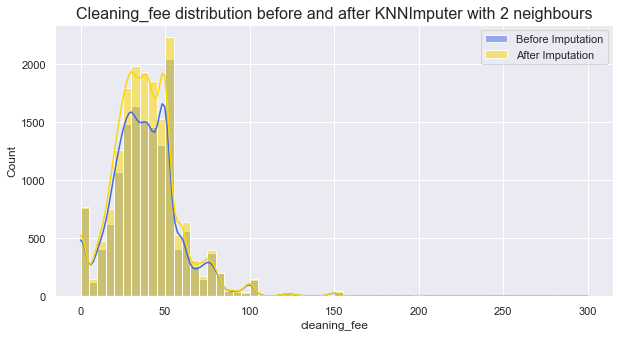

In [176]:
aux_df = hosts_df.copy()

numericcols = []
for n in aux_df.columns:
    if is_numeric_dtype(aux_df[n]):
        numericcols.append(n)

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="royalblue", label="Before Imputation", binwidth=5)

imputer = KNNImputer(n_neighbors=2)
aux_df[numericcols] = imputer.fit_transform(aux_df[numericcols])

sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="gold", label="After Imputation", binwidth=5)

plt.title('Cleaning_fee distribution before and after KNNImputer with 2 neighbours', fontsize=16)

plt.legend() 
plt.show()

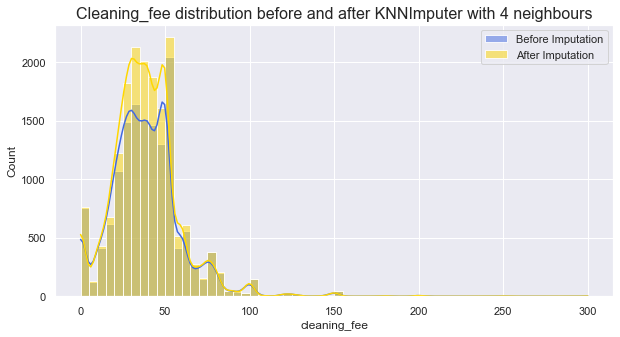

In [177]:
aux_df = hosts_df.copy()

numericcols = []
for n in aux_df.columns:
    if is_numeric_dtype(aux_df[n]):
        numericcols.append(n)

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="royalblue", label="Before Imputation", binwidth=5)

imputer = KNNImputer(n_neighbors=4)
aux_df[numericcols] = imputer.fit_transform(aux_df[numericcols])

sns.histplot(data=aux_df, x="cleaning_fee", kde=True, color="gold", label="After Imputation", binwidth=5)

plt.title('Cleaning_fee distribution before and after KNNImputer with 4 neighbours', fontsize=16)

plt.legend() 
plt.show()

We can see that the KNN Imputers work better: they maintain a more similar distribution after the imputation. Between 2 and 4 neighbours the difference is very small, so we can choose the less computationally demanding method. This is, we will use the **KNN Imputer with 2 neighbours**.

In [178]:
aux_df = hosts_df.copy()

numericcols = []
for n in aux_df.columns:
    if is_numeric_dtype(aux_df[n]):
        numericcols.append(n)

imputer = KNNImputer(n_neighbors=2)
aux_df[numericcols] = imputer.fit_transform(aux_df[numericcols])
hosts_df['cleaning_fee'] = aux_df['cleaning_fee']

In [179]:
hosts_df['cleaning_fee'].isnull().sum()

0

Finally, we will do the **imputation for the cathegorical variable**, using the most frequent value.

In [180]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hosts_df['host_identity_verified'] = imp_mode.fit_transform(hosts_df[['host_identity_verified']])

In [181]:
hosts_df['host_identity_verified'].isnull().sum()

0

We no longer have missing values now. Let's move on to the standarization of the values.

#### Standarization

Standarizing is an important step in the data analysis process. It helps ensure the accuracy and interpretability of the results. It helps to put all the variables on the same scale, makes it easier to compare the variables and reduces the impact of (possibly undetected) outliers.

In order to standarize the values, we will create a function and then, pass on the numerical attributes.

In [182]:
def standarize(data):
    mean = data.mean(0)
    std = data.std(0)
    x = data - np.array([mean])
    x /= np.array([std])
    return x

Incidentally, before continuing, we can delete the variable `id` at this point of the analysis.

In [183]:
hosts_df.drop(['id'], axis=1, inplace=True)

Now, let's **standarize the numerical attributes**:

In [184]:
numericcols = []
for n in hosts_df.columns:
    if is_numeric_dtype(hosts_df[n]):
        numericcols.append(n)
for col in numericcols:
    hosts_df[col] = standarize(hosts_df[col])

We can take a look at basic statistical information for each attribute now, and check that the means are 0 and the standard deviation is 1.

In [185]:
hosts_df.describe()

accommodates     bathrooms      bedrooms          beds         price  \
count  1.738800e+04  1.738800e+04  1.738800e+04  1.738800e+04  1.738800e+04   
mean   1.136018e-16  2.047285e-16 -8.172794e-17 -7.518971e-17  3.350846e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.457499e+00 -3.164503e+00 -1.651842e+00 -1.352320e+00 -1.038887e+00   
25%   -6.785773e-01 -3.582676e-01 -4.990955e-01 -6.153658e-01 -3.805701e-01   
50%   -6.785773e-01 -3.582676e-01 -4.990955e-01 -6.153658e-01 -1.734593e-01   
75%    8.792656e-01 -3.582676e-01  6.536512e-01  1.215886e-01  1.963814e-01   
max    1.100524e+01  3.892903e+01  1.218112e+01  2.223022e+01  6.177487e+01   

       cleaning_fee  guests_included  extra_people  minimum_nights  \
count  1.738800e+04     1.738800e+04  1.738800e+04    1.738800e+04   
mean   7.845883e-17     2.288382e-17 -1.798015e-17   -1.144191e-17   
std    1.000000e+00     1.000000e+00  1.000000e+00    1.000000e+00   
min   -1.814179e+00    -5.316012e-01 -5.280446e-01   -1.735283e-01   
25%   -6.310941e-01    -5.316012e-01 -5.280446e-01   -9.349144e-02   
50%   -1.578603e-01    -5.316012e-01 -5.280446e-01   -9.349144e-02   
75%    5.519905e-01     5.325804e-01  3.624258e-01   -1.345455e-02   
max    1.238284e+01     1.543112e+01  1.193854e+01    7.986335e+01   

       maximum_nights  calendar_updated  recent_reviews       success  \
count    1.738800e+04      1.738800e+04    1.738800e+04  1.738800e+04   
mean    -4.740221e-17      4.576765e-17    4.576765e-17 -4.168125e-17   
std      1.000000e+00      1.000000e+00    1.000000e+00  1.000000e+00   
min     -1.146837e+00     -5.895204e-01   -5.920717e-01 -5.336720e-01   
25%     -1.109928e+00     -5.730740e-01   -5.237522e-01 -5.237733e-01   
50%      9.255867e-01     -4.456143e-01   -3.187934e-01 -3.307480e-01   
75%      9.274321e-01      2.722035e-02    9.112423e-02  7.509987e-02   
max      1.730382e+01      4.052653e+01    1.074898e+01  2.909322e+01   

        summary_len  description_len  access_description  \
count  1.738800e+04     1.738800e+04        1.738800e+04   
mean  -1.397548e-16    -4.903677e-18        9.807353e-17   
std    1.000000e+00     1.000000e+00        1.000000e+00   
min   -2.341333e+00    -2.820676e+00       -1.332410e+00   
25%   -6.490655e-01    -5.995158e-01       -1.332410e+00   
50%   -1.188701e-01     6.336947e-01        7.504765e-01   
75%    1.006887e+00     6.336947e-01        7.504765e-01   
max    4.921618e+00     6.336947e-01        7.504765e-01   

       interaction_description  num_host_ver  amenities_len  \
count             1.738800e+04  1.738800e+04   1.738800e+04   
mean              4.413309e-17 -1.127846e-16  -2.778750e-17   
std               1.000000e+00  1.000000e+00   1.000000e+00   
min              -1.299633e+00 -2.514926e+00  -1.826836e+00   
25%              -1.299633e+00 -9.266671e-01  -7.003752e-01   
50%               7.694037e-01 -3.972474e-01  -2.039687e-01   
75%               7.694037e-01  6.615919e-01   4.769992e-01   
max               7.694037e-01  3.308690e+00   5.835643e+00   

       nice_words_per_review  
count           1.738800e+04  
mean            4.576765e-17  
std             1.000000e+00  
min            -2.999807e-01  
25%            -2.829502e-01  
50%            -2.313495e-01  
75%            -6.786212e-02  
max             4.396212e+01

#### Encoding

Right before using a model, we still need to do one final thing, namely, **encoding the remaining cathegorical variables**.

First, let's see how many cathegorical variables the dataset has, and how many unique values each one takes.

In [186]:
catcol = []
for n in hosts_df.columns:
    if not(is_numeric_dtype(hosts_df[n])):
        catcol.append(n)

numunique = []
for col in catcol:
    numunique.append(len(hosts_df[col].unique()))

x = PrettyTable()
x.add_column("Cathegorical attributes", catcol)
x.add_column("Unique values", numunique)
print(x)

+-------------------------+---------------+
| Cathegorical attributes | Unique values |
+-------------------------+---------------+
|  host_identity_verified |       2       |
|  neighbourhood_cleansed |       22      |
|    is_location_exact    |       2       |
|      property_type      |       29      |
|        room_type        |       3       |
|     instant_bookable    |       2       |
|   cancellation_policy   |       4       |
+-------------------------+---------------+


We see we have a total of 7 cathegorical variables. Most of them take on a small set of different values. For these, we will use the basic **One Hot Encoding technique**, which creates dummy variables.

For the ones that take on many different values, such as `neighbourhood_cleansed` or `property_type`, we could use a different technique that doesn't generate columns for each different value, this is, Mean Encoding. However, we are going to use a model because, **in the first place, we want to analyse which features are more important, so in order to keep things as explicit as possible we will use One Hot Encoding as well**. Nevertheless, we will reduce the number of different values of `property_type` as we did in a previous section, grouping the less common property types in a single "property type" named "Others".

In [187]:
pt = hosts_df.pivot_table(columns=['property_type'], aggfunc='size')
pt_matrix = []
for i in range(len(pt)):
    pt_matrix.append([pt.index[i], pt.values[i]])
for t in pt_matrix:
    if (t[1]<60):
        hosts_df['property_type'] = hosts_df['property_type'].replace(t[0],'Others')


new_prop_type = hosts_df.pivot_table(columns=['property_type'], aggfunc='size').sort_values(ascending=False)
new_prop_type

property_type
Apartment            13582
House                 1249
Townhouse              561
Bed and breakfast      403
Loft                   357
Boat                   340
Condominium            294
Others                 249
Houseboat              205
Guest suite            148
dtype: int64

The number of property types has now been reduced and we can proceed with the encoding of the cathegorical variables.

In [188]:
hosts_df = pd.get_dummies(hosts_df, columns=["host_identity_verified"], prefix=["host_identity_verified"])
hosts_df = pd.get_dummies(hosts_df, columns=["is_location_exact"], prefix=["location_exact"])
hosts_df = pd.get_dummies(hosts_df, columns=["room_type"], prefix=["room_type"])
hosts_df = pd.get_dummies(hosts_df, columns=["instant_bookable"], prefix=["instant_bookable"])
hosts_df = pd.get_dummies(hosts_df, columns=["cancellation_policy"], prefix=["cancel_policy"])
hosts_df = pd.get_dummies(hosts_df, columns=["neighbourhood_cleansed"], prefix=["neigh"])
hosts_df = pd.get_dummies(hosts_df, columns=["property_type"], prefix=["property_type"])

And these are the final variables:

In [189]:
hosts_df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'recent_reviews', 'success',
       'summary_len', 'description_len', 'access_description',
       'interaction_description', 'num_host_ver', 'amenities_len',
       'nice_words_per_review', 'host_identity_verified_f',
       'host_identity_verified_t', 'location_exact_f', 'location_exact_t',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_f', 'instant_bookable_t',
       'cancel_policy_flexible', 'cancel_policy_moderate',
       'cancel_policy_strict_14_with_grace_period',
       'cancel_policy_super_strict_60', 'neigh_Bijlmer-Centrum',
       'neigh_Bijlmer-Oost', 'neigh_Bos en Lommer',
       'neigh_Buitenveldert - Zuidas', 'neigh_Centrum-Oost',
       'neigh_Centrum-West', 'neigh_De Aker - Nieuw Sloten',
       'neigh_De Baarsjes - Oud-

We are ready to use a model now.

#### Modeling

Finally, **in order to extract feature importance information**, we will fit some models. It is important to remember that **the main reason we are training the model is not to predict, but to extract information about how relevant each attribute is in relation to our measure of success**. This, however, is done *through* prediction. If the models we fit allow us to predict well, that would mean that the relations are robust.

The strategy we will follow looks like this:

- We will train some models, increasingly complex:
    - A Linear Model (only with the numeric attributes)
        - With all the attributes
        - With all the attributes except `recent_reviews`
    - A Random Forest.
        - With all the attributes
        - With all the attributes except `recent_reviews`
    - An XGBoost
        - With all the attributes
        - With all the attributes except `recent_reviews`

- Then, we will Cross Validate the most promising model and check that the results are robust.

- Throughout the different trainings, we will comment on the coefficients.

We will evaluate the models using the **$R^2$ coefficient**, which, essentially, is a ratio that indicates the proportion of the variance of the observed values that is explained by the model.

Let's split the data first, using a more or less standard test size of 20%.

In [190]:
y = hosts_df['success']
X = hosts_df.drop(['success'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [191]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (13910, 64)
Test feature set size: (3478, 64)
Training variable set size: (13910,)
Test variable set size: (3478,)


Let's fit a linear model. In particular, let's fit a **Linear Regression** with the **original numeric attributes**.

The intercept term of the linear model: -0.0036394945824929073
R2 score (on train): 0.537902554723129
R2 score (on test): 0.5338049109691536


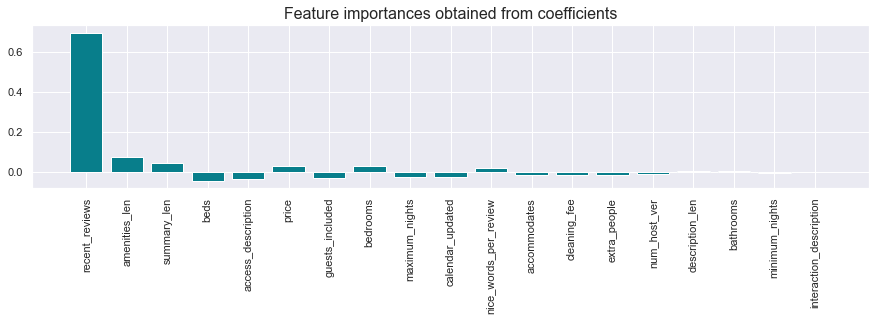

In [192]:
numericcols = ['recent_reviews', 'amenities_len', 'summary_len', 'beds', 'price',
               'access_description', 'guests_included', 'maximum_nights', 'calendar_updated',
               'nice_words_per_review', 'bedrooms', 'accommodates', 'cleaning_fee', 'bathrooms',
               'description_len', 'extra_people', 'num_host_ver', 'minimum_nights', 'interaction_description']

lm = LinearRegression()
lm.fit(X_train[numericcols],y_train)

# Mostrem els coeficients
print("The intercept term of the linear model:", lm.intercept_)
cdf = pd.DataFrame(data=lm.coef_, index=X_train[numericcols].columns, columns=["Coefficients"])

y_pred = lm.predict(X_test[numericcols])
y_pred_train = lm.predict(X_train[numericcols])
R2_train_R1 = r2_score(y_train, y_pred_train)
R2_test_R1 = r2_score(y_test, y_pred)

print('R2 score (on train):', R2_train_R1)
print('R2 score (on test):', R2_test_R1)

importances = cdf.sort_values(by='Coefficients', key=abs, ascending=False)
sns.set(rc={'figure.figsize':(15,3)})
plt.bar(x=importances.index, height=importances['Coefficients'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=16)
plt.xticks(rotation='vertical')
plt.show()

Since our **main goal is not to develop a highly accuracte model**, an $R^2$ score of about **0.53 in the test set is okay**.

All the values have been standarized, so we can directly compare the coefficients.

The **most relevant attribute by far is `recent_reviews`**, and it is positively correlated with `success`. It is followed by the number of amenities and the length of the summary, wich are also positively correlated. The next most important feature, however, is negatively correlated and corresponds to the number of beds.

Let's continue with the modeling.

This time, let's suppose that for some reason we don't have information corresponding to the recent reviews (number of reviews in the last year). This is, let's **fit the same model but without `recent_reviews`**.

The intercept term of the linear model: -0.006726093379041327
R2 score (on train): 0.1705719168137163
R2 score (on test): 0.19853727782778896


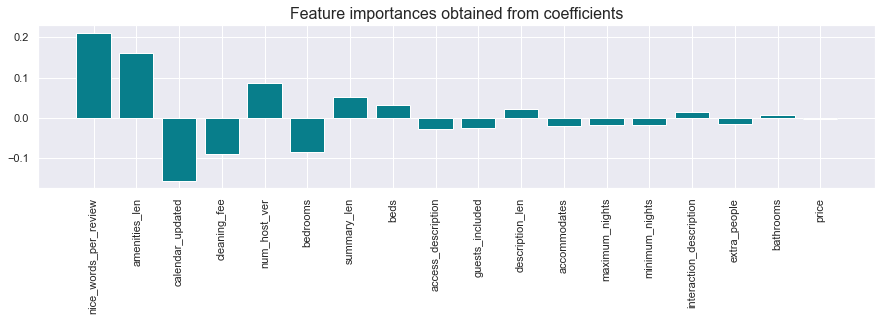

In [193]:
numericcols = ['amenities_len', 'summary_len', 'beds', 'price',
               'access_description', 'guests_included', 'maximum_nights', 'calendar_updated',
               'nice_words_per_review', 'bedrooms', 'accommodates', 'cleaning_fee', 'bathrooms',
               'description_len', 'extra_people', 'num_host_ver', 'minimum_nights', 'interaction_description']

lm = LinearRegression()
lm.fit(X_train[numericcols],y_train)

# Mostrem els coeficients
print("The intercept term of the linear model:", lm.intercept_)
cdf = pd.DataFrame(data=lm.coef_, index=X_train[numericcols].columns, columns=["Coefficients"])

y_pred = lm.predict(X_test[numericcols])
y_pred_train = lm.predict(X_train[numericcols])
R2_train_R1R = r2_score(y_train, y_pred_train)
R2_test_R1R = r2_score(y_test, y_pred)

print('R2 score (on train):', R2_train_R1R)
print('R2 score (on test):', R2_test_R1R)

importances = cdf.sort_values(by='Coefficients', key=abs, ascending=False)
sns.set(rc={'figure.figsize':(15,3)})
plt.bar(x=importances.index, height=importances['Coefficients'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=16)
plt.xticks(rotation='vertical')
plt.show()

We observe an **expected reduction in the $R^2$ score**. However, now we can see better how relevant the different attributes are.

Now that there is no `recent_reviews`, the **ratio of nice words per review is the most important feature**, closely followed by the amount of amenities. These two are positively correlated. The next most important attribute is negatively correlated and corresponds to how many days ago the calendar was updated.

Now, we will try to fit a **Random Forest** (with all the attributes). We will specify `max_depth=4` to avoid overfitting.

In [194]:
regressor = RandomForestRegressor(n_estimators=100, max_depth = 4, random_state=123)
regressor.fit(X_train, y_train)

# Calculem les metriques d'error
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
R2_train_R2 = r2_score(y_train, y_pred_train)
R2_test_R2 = r2_score(y_test, y_pred)

print('R2 score (on train):', R2_train_R2)
print('R2 score (on test):', R2_test_R2)

R2 score (on train): 0.6050099593905371
R2 score (on test): 0.5488697400492941


The $R^2$ is about 0.55, but this, as we commented previously, is okay.

Let's see what's the importance of each feature now:

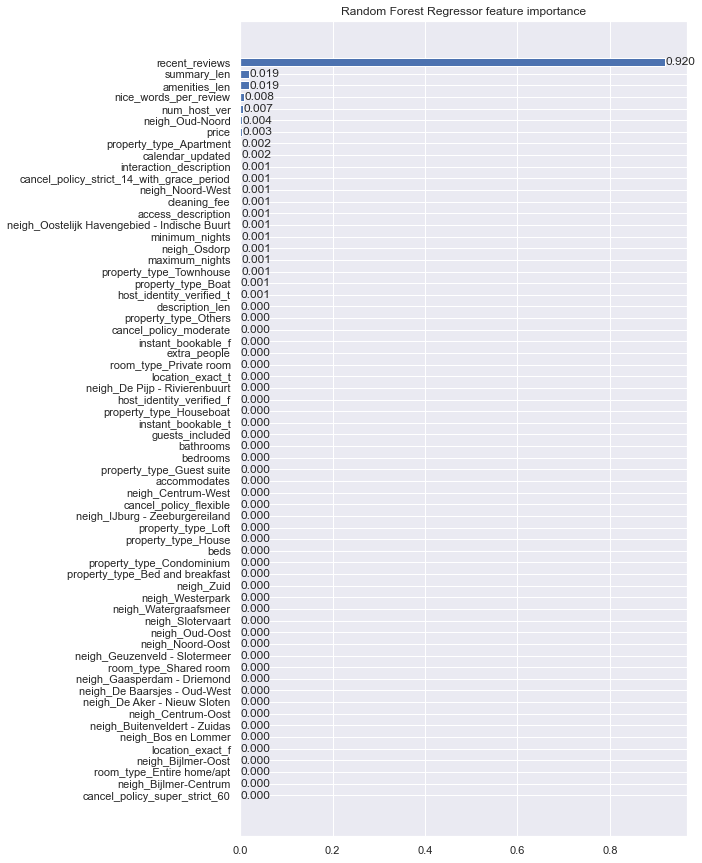

In [195]:
plt.rcParams["figure.figsize"] = (8,15)
sorted_index = regressor.feature_importances_.argsort()
parameters = list(X_train.columns)
plt.barh([parameters[i] for i in sorted_index], regressor.feature_importances_[sorted_index], height=.7)
plt.title('Random Forest Regressor feature importance')
for x, y_ in zip(regressor.feature_importances_[sorted_index], np.arange(len(parameters))):
    plt.text(x + .001, y_, f'{x:.3f}', va='center')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

The most important feature is `recent_reviews` (0.920), followed by `summary_len` (0.019), `amenities_len`  (0.019), `nice_words_per_review` (0.008) and `num_host_ver` (0.007). This is telling us that:

- The number of recent reviews is very important.
- The length of the summary of the experience is important.
- The number of amenities is important.
- Many nice words per review are related to success.
- The number of host verifications is important.

Also, we notice that the neighbourhood Oud-Noord is the highest in feature importance.

Again, let's assume that we don't have the information corresponding to `recent_reviews`. Let's fit the model again without this attribute.

In [196]:
regressor = RandomForestRegressor(n_estimators=100, max_depth = 4, random_state=123)
regressor.fit(X_train.drop(['recent_reviews'],axis=1), y_train)

# Calculem les metriques d'error
y_pred = regressor.predict(X_test.drop(['recent_reviews'],axis=1))
y_pred_train = regressor.predict(X_train.drop(['recent_reviews'],axis=1))
R2_train_R2R = r2_score(y_train, y_pred_train)
R2_test_R2R = r2_score(y_test, y_pred)

print('R2 score (on train):', R2_train_R2R)
print('R2 score (on test):', R2_test_R2R)

R2 score (on train): 0.31553036612935204
R2 score (on test): 0.27354922897087


Again, the $R^2$ decreases, but less than the decrease we saw with the linear regression model. This is probably because the relations are not linear.

Again, let's check the feature importance.

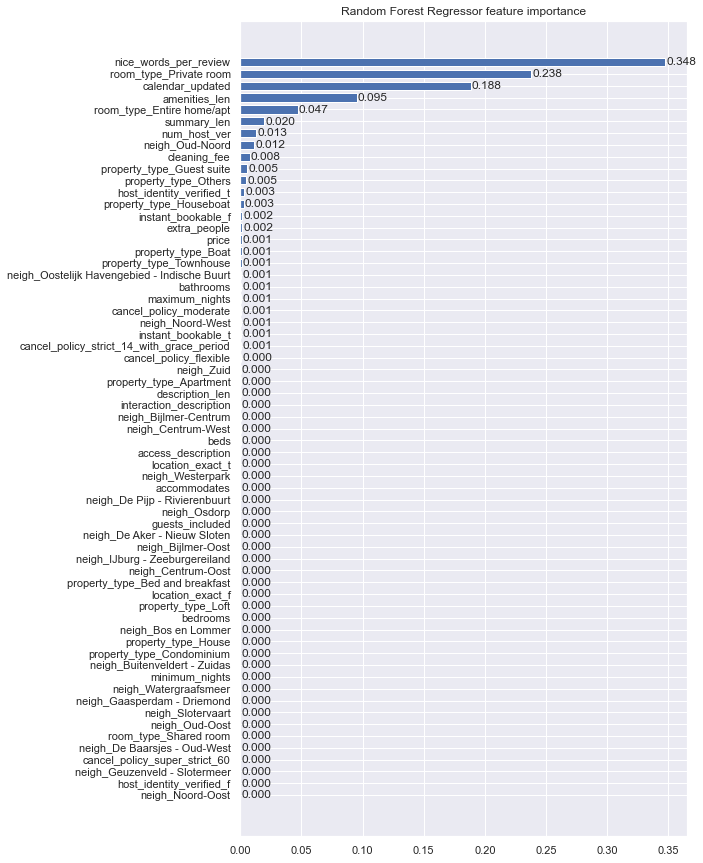

In [197]:
plt.rcParams["figure.figsize"] = (8,15)
sorted_index = regressor.feature_importances_.argsort()
parameters = list(X_train.drop(['recent_reviews'],axis=1).columns)
plt.barh([parameters[i] for i in sorted_index], regressor.feature_importances_[sorted_index], height=.7)
plt.title('Random Forest Regressor feature importance')
for x, y_ in zip(regressor.feature_importances_[sorted_index], np.arange(len(parameters))):
    plt.text(x + .001, y_, f'{x:.3f}', va='center')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

We see a different scenario now as per the feature importance. The **ratio of nice words per review is, as we saw with the Linear Regression, the most important feature**. Then, a **feature that we didn't see before appears, namely the room type "private room"**, which also seems to be very important. We also see some other features we saw before.

Now let's train an **Extreme Gradient Boosting for Regression**.

In [198]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'nthread': 4,
    'max_depth': 3,
    'min_child_weight': 5,
    'colsample_bytree': 0.5,
    'objective': 'reg:linear'
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]

num_round = 25
xgb_model = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 25)

y_pred = xgb_model.predict(xgb.DMatrix(X_test))
y_pred_train = xgb_model.predict(xgb.DMatrix(X_train))
R2_train_R3 = r2_score(y_train, y_pred_train)
R2_test_R3 = r2_score(y_test, y_pred)
print('R2 score (on train):', R2_train_R3)
print('R2 score (on test):', R2_test_R3)

[15:51:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:1.04394	train-rmse:1.03360
[24]	eval-rmse:0.68799	train-rmse:0.61023
R2 score (on train): 0.6244086726468395
R2 score (on test): 0.5420028854021501


The $R^2$ score is similar to other models, however, there seems to be more overfitting.

Let's the the feature importance.

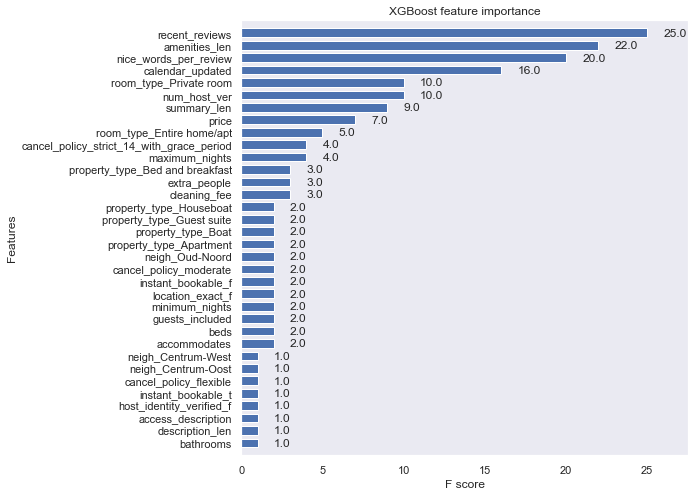

In [199]:
plt.rcParams["figure.figsize"] = (8,8)
plot_importance(xgb_model, height=0.7, grid=False, title="XGBoost feature importance")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

We see a similar set of important parameters. Let's see how they change if we fit the same model without the attribute `recent_reviews`.

In [200]:
dtrain = xgb.DMatrix(X_train.drop(['recent_reviews'],axis=1), label=y_train)
dvalid = xgb.DMatrix(X_test.drop(['recent_reviews'],axis=1), label=y_test)

param = {
    'eta': 0.3, 
    'nthread': 4,
    'max_depth': 3,
    'min_child_weight': 5,
    'colsample_bytree': 0.5,
    'objective': 'reg:linear'
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]

num_round = 25
xgb_model = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 25)

y_pred = xgb_model.predict(xgb.DMatrix(X_test.drop(['recent_reviews'],axis=1)))
y_pred_train = xgb_model.predict(xgb.DMatrix(X_train.drop(['recent_reviews'],axis=1)))
R2_train_R3R = r2_score(y_train, y_pred_train)
R2_test_R3R = r2_score(y_test, y_pred)
print('R2 score (on train):', R2_train_R3R)
print('R2 score (on test):', R2_test_R3R)

[15:51:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:1.01543	train-rmse:1.00325
[24]	eval-rmse:0.83366	train-rmse:0.77872
R2 score (on train): 0.38836452132962584
R2 score (on test): 0.32751703279456634


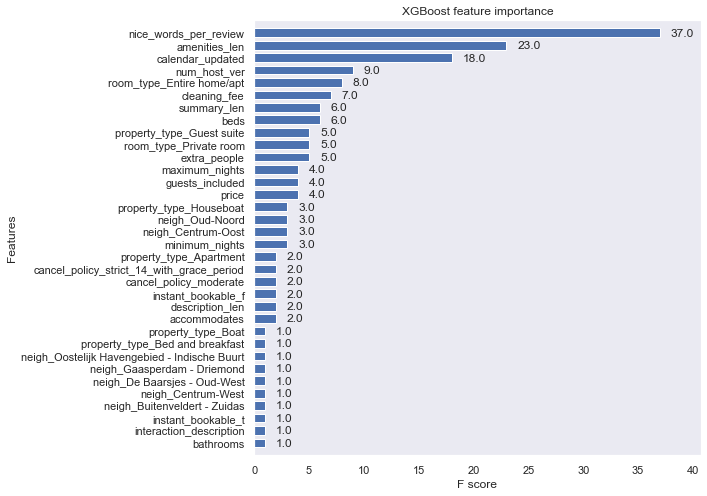

In [201]:
plt.rcParams["figure.figsize"] = (8,8)
plot_importance(xgb_model, height=0.7, grid=False, title="XGBoost feature importance")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

And the changes in the top important features are similar to those observed in previous fits.

Finally, let's train another **XGB model**. This time we will also **search for the best hyperparameters** using a Randomized Search and, at the same time, we will do **Corss Validation**. We do this mainly in order to verify that the results we obtained with previous XGB models are reliable.

In [202]:
params = {
    'n_estimators':[500],
    'min_child_weight':[2,3,4,5,6,7,8], 
    'gamma':[i/10.0 for i in range(2,8)],  
    'subsample':[i/10.0 for i in range(5,15)],
    'colsample_bytree':[i/10.0 for i in range(5,15)], 
    'max_depth': [2,3,4,5,6,7,8],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(5,15)],
}

reg = xgb.XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error',verbose=0)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

[15:51:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:18] WARNING: C:/Users/administrat

[15:51:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:29] WARNING: C:/Users/administrat

[15:51:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:37] WARNING: C:/Users/administrat

[15:51:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:46] WARNING: C:/Users/administrat

[15:51:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:58] WARNING: C:/Users/administrat

[15:52:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:05] WARNING: C:/Users/administrat

[15:52:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:25] WARNING: C:/Users/administrat

[15:52:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:43] WARNING: C:/Users/administrat

[15:52:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:57] WARNING: C:/Users/administrat

[15:53:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:02] WARNING: C:/Users/administrat

[15:53:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:13] WARNING: C:/Users/administrat

[15:53:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:46] WARNING: C:/Users/administrat

[15:54:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:54:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:54:55] WARNING: C:/Users/administrat

[15:55:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:20] WARNING: C:/Users/administrat

[15:55:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:55] WARNING: C:/Users/administrat

[15:57:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:57:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:57:05] WARNING: C:/Users/administrat

[15:57:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:57:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:57:57] WARNING: C:/Users/administrat

[15:58:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:05] WARNING: C:/Users/administrat

[15:58:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:38] WARNING: C:/Users/administrat

[15:58:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:54] WARNING: C:/Users/administrat

[15:59:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:59:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:59:33] WARNING: C:/Users/administrat

[16:00:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:12] WARNING: C:/Users/administrat

[16:00:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:31] WARNING: C:/Users/administrat

[16:01:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:14] WARNING: C:/Users/administrat

[16:01:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:40] WARNING: C:/Users/administrat

[16:02:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:02:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:02:33] WARNING: C:/Users/administrat

And the best hyperparameters that the Randdomized Search has been able to find in 200 combinations are the following ones:

In [203]:
best_regressor = random_search.best_estimator_

In [204]:
best_regressor

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eta=0.5, eval_metric='rmse', gamma=0.4,
             gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=-1, nthread=-1,
             num_parallel_tree=None, predictor=None, random_state=0, ...)

We can also calculate the $R^2$ score for the train and test sets.

In [205]:
y_pred = best_regressor.predict(X_test)
y_pred_train = best_regressor.predict(X_train)
R2_train_R4 = r2_score(y_train, y_pred_train)
R2_test_R4 = r2_score(y_test, y_pred)
print('R2 score (on train):', R2_train_R4)
print('R2 score (on test):', R2_test_R4)

R2 score (on train): 0.5455812245816769
R2 score (on test): 0.5428620134234377


In order to **compare the models visually** and extract some final conclusions, we can compare their $R^2$ metrics for the train and tests sets constructing a bar plot.

<AxesSubplot:xlabel='Regressions', ylabel='Value'>

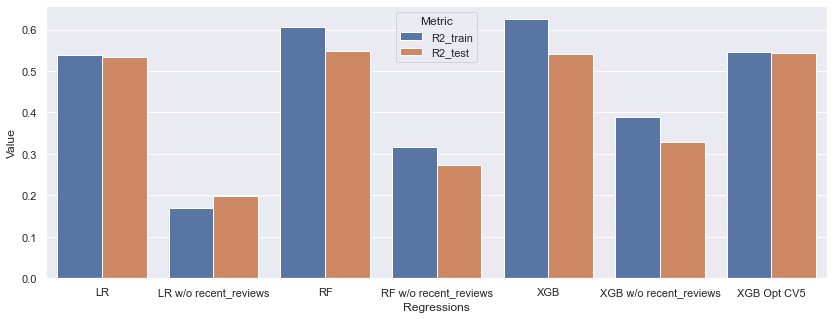

In [206]:
names_graph = ['LR', 'LR w/o recent_reviews', 'RF', 'RF w/o recent_reviews', 'XGB', 'XGB w/o recent_reviews', 'XGB Opt CV5']
valors = [R2_train_R1, R2_train_R1R, R2_train_R2, R2_train_R2R, R2_train_R3, R2_train_R3R, R2_train_R4,\
          R2_test_R1, R2_test_R1R, R2_test_R2, R2_test_R2R, R2_test_R3, R2_test_R3R, R2_test_R4]
metrics_names = 7*['R2_train']+7*['R2_test']
scores_df = pd.DataFrame({'Regressions': 2*names_graph,
                          'Value': valors,
                          'Metric': metrics_names})
sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x='Regressions', y='Value', hue='Metric', data=scores_df) 

From this plot, we see that:

- XGB is the most robust model to the delition of the attribute `recent_reviews`: it has got the highest train and test $R^2$ scores compared to the other models trained without the attribute `recent_reviews`.


- The CV version of XGB not the LR model don't suffer from overfitting, as opposed to other models whose difference between the scores for the train and test sets are considerable.

In order to make the final suggestions and recommendations, then, **we will mainly (but not only) take into account the results from the XGB models** (as well as, of course, the rest of the relevant plots and caluclations made throughout this section).

### <span style="color:#32CAEC"> 7.3 Suggestions and recommendations for the hosts </span>

We can summarize the **main findings** made in this seventh section **in the form suggestions and recommendations** for the hosts.

Whether you want to become a host or are already a host, **the following advice should be relevant to you if your goal is to do well as a host and be successful overall in Airbnb**. In particular, by successful we roughly mean "to recieve a large number of positive reviews".

We will rank in order of importance 10 pieces of advice extracted from the in-depth analysis of the dataset:


- **Good reviews matter**: how nice your reviews are, in average, is linked to more success. This is why it is advisable to encourage your guests to leave a review underlining the positive aspects of the experience you host.


- **The more amenities, the better**: Include more features that add to the comfort, convenience, or enjoyment of the experience you are hosting. This includes things like WiFi or TV, for example. But there are many more and different things. 


- **Update your calendar frequently:** It has been shown that the longer ago you last updated your calendar, the more less likekly it is to have success.


- **Make sure you have the highest number of verifications**: Showing that your personal information is verified, helps guests to trust you and the reliability of yout experience.


- **For success, hosting an entire home/apartment is better than a private room**: There seems to be a certain link between hosting an entire home/apartment to success, unlike with other types of room.


- **Don't put a high cleaning fee**: It is probably not a nice feeling for a guest to see a huge cleaning fee, and the data seems to support this intuition.


- **Write a good (long) summary**: To be specific about your experience probably adds trust to the whole interaction host-guest.


- **Host an experience for a small number of people**: The number of beds and the number of bedrooms are negatively correlated with success. This is probably because experiences for small groups of people (2 or 3), are probably more likely to be booked and enjoyed than experiences for large groups of people.


- **If you don't know where to host an experience, do it in Oud-Noord**: The data analysis has shown that, of all the neighbourhoods, Oud-Noord seems to be the most linked to success, although the reasons are not clear and the link is not very strong.

*Note (technical): since the attribute `recent_reviews` is somewhat controversial due to its close relationship with the target, it has not been added as a recommendation nor suggestion.* 

## <span style="color:navy"> 8. Conclusion </span>

In conclusion, the analysis of the Airbnb Amsterdam dataset has been successful in providing valuable advice to guests, hosts, and Airbnb. Along the way, many other insights have been gained through the use of illustrative graphics and other techniques. Many different methods of treating the data have been explored and demonstrated. While the results of the analysis are useful, there is still room for improvement and further work can be done to make the results more robust.